<h1>Table of Contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#import_libraries">Import Libraries</a></li>
        <li><a href="#import_dataset">Import "Online Retail" Dataset</a></li>
        <li><a href="#information">Information about the Dataset</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#eda">Exploratory Data Analysis (EDA)</a></li> 
        <li><a href="#feature_engineering">Feature Engineering</a></li>
        <li><a href="#segmentation_clustering">Segmentation and Clustering</a></li>  
        <li><a href="#ml">Machine Learning Models</a></li>              
    </ol>
</div>
<br>
<hr>

<div id="import_libraries"> 
    <h2>Import Libraries</h2>    
</div>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from scipy.stats import anderson
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import max_error
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

import warnings
warnings.filterwarnings("ignore")

<hr>
<div id="import_dataset"> 
    <h2>Import "Online Retail" Dataset</h2>         
</div>

### Overview of the Online Retail Dataset  

The **"Online Retail"** dataset is commonly used for data analysis in e-commerce, featuring the following attributes:  

- **InvoiceNo**: Unique transaction identifier, grouping items purchased together.  
- **StockCode**: Unique product identifier, useful for tracking sales and inventory.  
- **Description**: Textual description of products, aiding in understanding product types and preferences.  
- **Quantity**: Number of units sold in a transaction, important for analyzing sales volume.  
- **InvoiceDate**: Date and time of the transaction, crucial for time series and sales trend analysis.  
- **UnitPrice**: Price per unit, vital for revenue calculations and pricing strategies.  
- **CustomerID**: Unique customer identifier, valuable for customer behavior analysis and segmentation.  
- **Country**: Customer location, helping in geographic market analysis.  

### Uses of the Dataset  

1. **Sales Analysis**: Identifying bestsellers and trends.  
2. **Customer Segmentation**: Clustering based on buying behavior.  
3. **Inventory Management**: Optimizing stock levels and turnover.  
4. **Market Basket Analysis**: Understanding product bundling.  
5. **Predictive Modeling**: Forecasting future sales and behavior.  
6. **Time Series Analysis**: Modeling sales trends over time.  

With 541,909 observations, this dataset offers rich insights for informed decision-making in retail.

In [ ]:
# Load the dataset
or_df = pd.read_excel('Online_Retail.xlsx')

display(or_df.head())

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

<hr>
<div id="information"> 
    <h2>Information about the Dataset</h2>    
</div>

In [3]:
# Get the shape of the dataset, which returns the number of rows and columns
shape_of_the_dataset = or_df.shape
print("\nThe shape of the dataset -->", shape_of_the_dataset)


The shape of the dataset --> (541909, 8)


In [4]:
# Show summary statistics for the dataset
# This includes count, mean, standard deviation, minimum, 25%, 50%, 75%, and maximum values for numeric columns
# This includes count, unique(the number of unique values), top(the mode) and the frequency of the top value for object columns
print('\nThe dataset description:\n')

data_describe = or_df.describe(include = 'all')
display(data_describe)


The dataset description:



InvoiceNo StockCode                         Description  \
count    541909.0    541909                              540455   
unique    25900.0      4070                                4223   
top      573585.0    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq       1114.0      2313                                2369   
mean          NaN       NaN                                 NaN   
min           NaN       NaN                                 NaN   
25%           NaN       NaN                                 NaN   
50%           NaN       NaN                                 NaN   
75%           NaN       NaN                                 NaN   
max           NaN       NaN                                 NaN   
std           NaN       NaN                                 NaN   

             Quantity                    InvoiceDate      UnitPrice  \
count   541909.000000                         541909  541909.000000   
unique            NaN                            NaN            NaN   
top               NaN                            NaN            NaN   
freq              NaN                            NaN            NaN   
mean         9.552250  2011-07-04 13:34:57.156386048       4.611114   
min     -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%          1.000000            2011-03-28 11:34:00       1.250000   
50%          3.000000            2011-07-19 17:17:00       2.080000   
75%         10.000000            2011-10-19 11:27:00       4.130000   
max      80995.000000            2011-12-09 12:50:00   38970.000000   
std        218.081158                            NaN      96.759853   

           CustomerID         Country  
count   406829.000000          541909  
unique            NaN              38  
top               NaN  United Kingdom  
freq              NaN          495478  
mean     15287.690570             NaN  
min      12346.000000             NaN  
25%      13953.000000             NaN  
50%      15152.000000             NaN  
75%      16791.000000             NaN  
max      18287.000000             NaN  
std       1713.600303             NaN

In [5]:
# Display a concise summary of the dataset
# This summary includes the index dtype, column dtypes, non-null values, and memory usage 
print('\nMore information about the dataset:\n')

data_information = or_df.info()
display(data_information)


More information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


None

In [6]:
# Calculate the number of unique values in each column of the dataset
print('\nNumber of unique data in the dataset:\n')

unique_data = or_df.nunique()
print(unique_data)


Number of unique data in the dataset:

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


<hr>
<div id="pre-processing"> 
    <h2>Pre-processing</h2>    
</div>
<div>
    <ol>
        <li><a href="#convert_data_types">Convert Data Types</a></li>
        <li><a href="#duplicates">Duplicate Tuples</a></li>
        <li><a href="#missing_values">Handling Missing Values</a></li>
        <li><a href="#filter_out">Filter Out Unnecessary Data</a></li>        
        <li><a href="#outliers">Detecting Outliers (Noise)</a></li>                      
    </ol>
</div>
<br>

<hr>
<div id="convert_data_types"> 
    <h2>Convert Data Types</h2>    
</div>

In [7]:
# Convert 'StockCode' column to categorical
or_df['StockCode'] = or_df['StockCode'].astype('category')

# Convert 'Description' column to categorical   
or_df['Description'] = or_df['Description'].astype('category') 

# Convert 'Country' column to categorical
or_df['Country'] = or_df['Country'].astype('category')

# Convert 'CustomerID' column to string
or_df['CustomerID'] = or_df['CustomerID'].astype('category')

# Display the data types for each column after conversion
print("\nData types after conversion:")
display(or_df.dtypes)


Data types after conversion:


InvoiceNo              object
StockCode            category
Description          category
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID           category
Country              category
dtype: object

<hr>
<div id="duplicates"> 
    <h2>Duplicate Tuples</h2>    
</div>

In [8]:
# Calculate the number of duplicate rows in the dataframe
Num_of_duplicate_rows = or_df.duplicated().sum()
print("\nThe number of duplicate rows -->", Num_of_duplicate_rows)


The number of duplicate rows --> 5268


In [9]:
# Identify all duplicated rows in the dataframe  
# 'duplicated(keep=False)' marks all duplicates (including the first occurrence as True)
df_all_duplicate = or_df[or_df.duplicated(keep=False)]
print("\nAll the rows and their duplicates:\n")
display(df_all_duplicate)


All the rows and their duplicates:



InvoiceNo StockCode                       Description  Quantity  \
485       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521       536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
...          ...       ...                               ...       ...   
541675    581538     22068       BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992            REVOLVER WOODEN RULER          1   
541699    581538     22694                      WICKER STAR          1   
541701    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice CustomerID         Country  
485    2010-12-01 11:45:00       4.95    17908.0  United Kingdom  
489    2010-12-01 11:45:00       2.10    17908.0  United Kingdom  
494    2010-12-01 11:45:00       1.25    17908.0  United Kingdom  
517    2010-12-01 11:45:00       1.25    17908.0  United Kingdom  
521    2010-12-01 11:45:00       2.95    17908.0  United Kingdom  
...                    ...        ...        ...             ...  
541675 2011-12-09 11:34:00       0.39    14446.0  United Kingdom  
541689 2011-12-09 11:34:00       2.49    14446.0  United Kingdom  
541692 2011-12-09 11:34:00       1.95    14446.0  United Kingdom  
541699 2011-12-09 11:34:00       2.10    14446.0  United Kingdom  
541701 2011-12-09 11:34:00       2.08    14446.0  United Kingdom  

[10147 rows x 8 columns]

In [10]:
# Identify only the duplicated rows in the dataframe
# 'duplicated()' without any parameters, meaning its output only shows the rows that are duplicates and excludes the first occurrences
duplicate = or_df[or_df.duplicated()]
print("\nJust duplicate rows:\n")
display(duplicate)


Just duplicate rows:



InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice CustomerID         Country  
517    2010-12-01 11:45:00       1.25    17908.0  United Kingdom  
527    2010-12-01 11:45:00       2.10    17908.0  United Kingdom  
537    2010-12-01 11:45:00       2.95    17908.0  United Kingdom  
539    2010-12-01 11:45:00       4.95    17908.0  United Kingdom  
555    2010-12-01 11:49:00       2.95    17920.0  United Kingdom  
...                    ...        ...        ...             ...  
541675 2011-12-09 11:34:00       0.39    14446.0  United Kingdom  
541689 2011-12-09 11:34:00       2.49    14446.0  United Kingdom  
541692 2011-12-09 11:34:00       1.95    14446.0  United Kingdom  
541699 2011-12-09 11:34:00       2.10    14446.0  United Kingdom  
541701 2011-12-09 11:34:00       2.08    14446.0  United Kingdom  

[5268 rows x 8 columns]

In [11]:
# Drop all duplicate rows from the dataframe
# df_ADD --> df_after dropping duplicates
df_ADD = or_df.drop_duplicates()
print("\nThe dataset after dropping the duplicate tuples:\n")
display(df_ADD)


The dataset after dropping the duplicate tuples:



InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  
0      2010-12-01 08:26:00       2.55    17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75    17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
...                    ...        ...        ...             ...  
541904 2011-12-09 12:50:00       0.85    12680.0          France  
541905 2011-12-09 12:50:00       2.10    12680.0          France  
541906 2011-12-09 12:50:00       4.15    12680.0          France  
541907 2011-12-09 12:50:00       4.15    12680.0          France  
541908 2011-12-09 12:50:00       4.95    12680.0          France  

[536641 rows x 8 columns]

In [12]:
# Check the shape to see how many duplicate rows were removed  
print(f'Dataset shape before dropping rows: {or_df.shape}')
print(f'Dataset shape after dropping rows: {df_ADD.shape}')

Dataset shape before dropping rows: (541909, 8)
Dataset shape after dropping rows: (536641, 8)


<hr>
<div id="missing_values"> 
    <h2>Handling Missing Values</h2>    
</div>
<div>
    <ol>
        <li><a href="#bf_ff">Backward Fill (bfill) and Forward Fill (ffill) methods</a></li>
        <li><a href="#mode">The Mode Method</a></li>
        <li><a href="#combination">Combination of Both Methods</a></li>             
        <li><a href="#output">Output the results</a></li>    
    </ol>
</div>
<br>

In [13]:
# Check for missing values in the dataframe
isna = pd.DataFrame(df_ADD.isna().sum(axis=0))
print(isna)

                  0
InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID   135037
Country           0


In [14]:
# Find missing values ​​in other shapes
# Define unwanted values and consider them as null/missing  
unwanted_values = ['?', '!', '$', 'None', 'null', '', '*'] 

# Replace unwanted values with NaN   
for col in df_ADD.columns: 
    df_ADD.loc[:, col] = df_ADD[col].replace(unwanted_values, np.nan)

In [15]:
# Check for any NaN values now present in the dataframe  
missing_values_count = df_ADD.isna().sum() 

# Display the count of missing values for each column  
print("\nCount of missing values in each column:")  
print(missing_values_count[missing_values_count > 0])


Count of missing values in each column:
Description      1501
CustomerID     135037
dtype: int64


In [16]:
# Summary of missing data (percentage of missing values)
missing_summary = df_ADD.isnull().mean() * 100
print(f"\nPercentage of missing values in each column:\n{missing_summary}")


Percentage of missing values in each column:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.279703
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64


In [17]:
# Display rows with missing values  
rows_with_missing = df_ADD[df_ADD.isna().any(axis=1)]  
print("\nRows with missing values:")  
display(rows_with_missing)


Rows with missing values:


InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice CustomerID         Country  
622    2010-12-01 11:52:00       0.00        NaN  United Kingdom  
1443   2010-12-01 14:32:00       2.51        NaN  United Kingdom  
1444   2010-12-01 14:32:00       2.51        NaN  United Kingdom  
1445   2010-12-01 14:32:00       0.85        NaN  United Kingdom  
1446   2010-12-01 14:32:00       1.66        NaN  United Kingdom  
...                    ...        ...        ...             ...  
541536 2011-12-09 10:26:00       4.13        NaN  United Kingdom  
541537 2011-12-09 10:26:00       4.13        NaN  United Kingdom  
541538 2011-12-09 10:26:00       4.96        NaN  United Kingdom  
541539 2011-12-09 10:26:00      10.79        NaN  United Kingdom  
541540 2011-12-09 10:26:00    1714.17        NaN  United Kingdom  

[135037 rows x 8 columns]

<div id="bf_ff"> 
    <h2>Backward Fill (bfill) and Forward Fill (ffill) methods</h2>    
</div>

In [18]:
# Fill missing values in 'description' and 'customerID' using forward fill and backward fill
df_fill = df_ADD.copy()              # Create a copy of the dataframe
  
df_fill['Description'] = df_fill['Description'].fillna(method='ffill').fillna(method='bfill')  
df_fill['CustomerID'] = df_fill['CustomerID'].fillna(method='ffill').fillna(method='bfill')  

# Check if there are still any missing values  
print(df_fill[['Description', 'CustomerID']].isnull().sum())  

Description    0
CustomerID     0
dtype: int64


<div id="mode"> 
    <h2>The Mode Method</h2>    
</div>

In [19]:
# Create a copy of the dataframe
df_mode = df_ADD.copy()

# Impute missing values in 'Description' column with the mode
mode_description = df_mode['Description'].mode()[0]
df_mode['Description'].fillna(mode_description, inplace=True)

# Impute missing values in 'CustomerID' column with the mode
mode_customer_id = df_mode['CustomerID'].mode()[0]
df_mode['CustomerID'].fillna(mode_customer_id, inplace=True)

# Verify the imputation
print(df_mode[['Description', 'CustomerID']].isnull().sum())

Description    0
CustomerID     0
dtype: int64


<div id="combination"> 
    <h2>Combination of Both Methods</h2>    
</div>

### Rationale for Combining Mode and Forward/Backward Fill Methods

This project focuses on gaining insights into customer behavior, sales performance, and product trends. While imputation methods for missing values can impact data quality, the 'Description' and 'CustomerID' columns hold varying levels of importance relative to our primary analysis.
To ensure clarity and robustness in data preprocessing, the following approach was adopted:

1. **Mode Imputation for 'Description'**: Given that the 'Description' column had fewer missing values and is less critical for the primary analysis, the mode imputation method was used. This ensures consistency by replacing missing values with the most frequently occurring category.
2. **Forward/Backward Fill for 'CustomerID'**: The 'CustomerID' column had a significant number of missing values. Using the forward fill and backward fill methods helps avoid over-representation of a single customer ID, maintaining the temporal relevance and contextual accuracy of our data.

By documenting and comparing these methods, the goal is to provide a comprehensive view of the imputation techniques used, allowing for better decision-making and transparency in this analysis.

In [20]:
# Create a copy of the dataframe
df_combined = df_ADD.copy()

# Impute missing values in 'Description' column with the mode
mode_description = df_combined['Description'].mode()[0]
df_combined['Description'].fillna(mode_description, inplace=True)

# Impute missing values in 'CustomerID' column using forward fill, then backward fill
df_combined['CustomerID'].fillna(method='ffill', inplace=True)
df_combined['CustomerID'].fillna(method='bfill', inplace=True)

# Verify the imputation
print(df_combined[['Description', 'CustomerID']].isnull().sum())

Description    0
CustomerID     0
dtype: int64


<div id="output"> 
    <h2>Output the results</h2>    
</div>

In [21]:
# Descriptive Statistics: Check summary statistics for each dataset to see if there are significant differences
print('\nBaseline outcome: \n')  
display(df_ADD.describe())

print('\nForward Fill/Backward Fill method outcome: \n') 
display(df_fill.describe())
 
print('\nThe mode method outcome: \n')
display(df_mode.describe())

print('\nCombination of both methods outcome: \n')
display(df_combined.describe())


Baseline outcome: 



Quantity                    InvoiceDate      UnitPrice
count  536641.000000                         536641  536641.000000
mean        9.620029  2011-07-04 08:57:06.087421952       4.632656
min    -80995.000000            2010-12-01 08:26:00  -11062.060000
25%         1.000000            2011-03-28 10:52:00       1.250000
50%         3.000000            2011-07-19 14:04:00       2.080000
75%        10.000000            2011-10-18 17:05:00       4.130000
max     80995.000000            2011-12-09 12:50:00   38970.000000
std       219.130156                            NaN      97.233118


Forward Fill/Backward Fill method outcome: 



Quantity                    InvoiceDate      UnitPrice
count  536641.000000                         536641  536641.000000
mean        9.620029  2011-07-04 08:57:06.087421952       4.632656
min    -80995.000000            2010-12-01 08:26:00  -11062.060000
25%         1.000000            2011-03-28 10:52:00       1.250000
50%         3.000000            2011-07-19 14:04:00       2.080000
75%        10.000000            2011-10-18 17:05:00       4.130000
max     80995.000000            2011-12-09 12:50:00   38970.000000
std       219.130156                            NaN      97.233118


The mode method outcome: 



Quantity                    InvoiceDate      UnitPrice
count  536641.000000                         536641  536641.000000
mean        9.620029  2011-07-04 08:57:06.087421952       4.632656
min    -80995.000000            2010-12-01 08:26:00  -11062.060000
25%         1.000000            2011-03-28 10:52:00       1.250000
50%         3.000000            2011-07-19 14:04:00       2.080000
75%        10.000000            2011-10-18 17:05:00       4.130000
max     80995.000000            2011-12-09 12:50:00   38970.000000
std       219.130156                            NaN      97.233118


Combination of both methods outcome: 



Quantity                    InvoiceDate      UnitPrice
count  536641.000000                         536641  536641.000000
mean        9.620029  2011-07-04 08:57:06.087421952       4.632656
min    -80995.000000            2010-12-01 08:26:00  -11062.060000
25%         1.000000            2011-03-28 10:52:00       1.250000
50%         3.000000            2011-07-19 14:04:00       2.080000
75%        10.000000            2011-10-18 17:05:00       4.130000
max     80995.000000            2011-12-09 12:50:00   38970.000000
std       219.130156                            NaN      97.233118

In [22]:
print("\nContinue working with Combination of both methods after comparing different methods:\n")
display(df_combined.head())


Continue working with Combination of both methods after comparing different methods:



InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom

<hr>
<div id="filter_out"> 
    <h2>Filter Out Unnecessary Data</h2>    
</div>

In [23]:
# Filter out negative quantities
df_filter_out = df_combined.copy()              # Create a copy of the dataframe
df_filter_out = df_filter_out[df_filter_out['Quantity'] > 0]
df_filter_out = df_filter_out[df_filter_out['UnitPrice'] > 0]

In [24]:
# Check the shape to see how many rows were filtered out
print(f'Dataset shape before filter out: {df_combined.shape}')
print(f'Dataset shape after filter out: {df_filter_out.shape}')

Dataset shape before filter out: (536641, 8)
Dataset shape after filter out: (524878, 8)


<hr>
<div id="outliers"> 
    <h2>Detecting Outliers (Noise)</h2>    
</div>
<div>
    <ol>
        <li><a href="#plot_boxplot">Plot Boxplot</a></li>
        <li><a href="#z_score">Z-score method</a></li>          
    </ol>
</div>
<br>

<div id="plot-boxplot"> 
    <h2>Plot Boxplot</h2>    
</div>

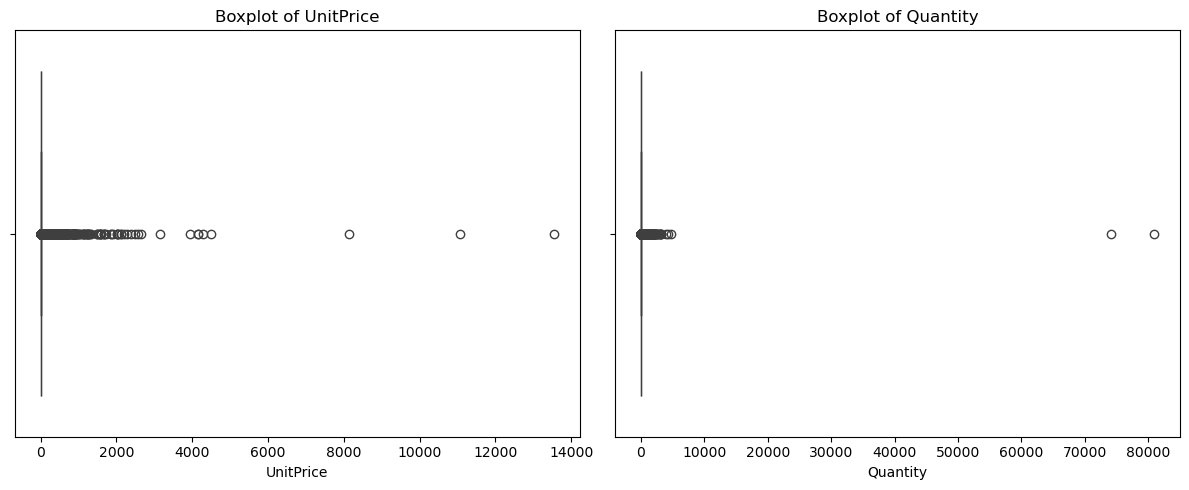

In [25]:
# Plot a boxplot to detect outliers in numerical features  
# Set up the figure with 1 row and 2 columns for boxplots, sharing the y-axis
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)        # Set the figure size (width, height)

# Create the first boxplot for 'UnitPrice'
sns.boxplot(x='UnitPrice', data=df_filter_out, ax=axes[0], 
            boxprops=dict(facecolor='#d62728', alpha=0.6))
axes[0].set_title('Boxplot of UnitPrice')

# Create the second boxplot for 'Quantity'
sns.boxplot(x='Quantity', data=df_filter_out, ax=axes[1], 
            boxprops=dict(facecolor='#1f77b4', alpha=0.6))
axes[1].set_title('Boxplot of Quantity')

plt.tight_layout()         # Adjust the spacing between plots
plt.show() 
  

<div id="z_score"> 
    <h2>Z-score method</h2>    
</div>

In [26]:
# Create a copy of the dataset
df_zscore = df_filter_out.copy()                    

# Calculate Z-scores for the specified columns  
# Z-score indicates how many standard deviations an element is from the mean
z_scores = stats.zscore(df_zscore[['Quantity', 'UnitPrice']])  

In [27]:
# Create a new column 'is_outlier' in the dataset  
# Set it to True if any Z-score for the row is greater than 3 or less than -3  
# This indicates that the row is an outlier in at least one of the two columns  
df_zscore['is_outlier'] = (abs(z_scores) > 3).any(axis=1) 

In [28]:
# Filter the dataset to show only the rows that are identified as outliers  
outliers_only = df_zscore[df_zscore['is_outlier']]   

# Output of the outliers  
display(outliers_only) 

InvoiceNo StockCode                         Description  Quantity  \
246       536392     22827  RUSTIC  SEVENTEEN DRAWER SIDEBOARD         1   
730       536437     17021              NAMASTE SWAGAT INCENSE       600   
870       536477     21137            BLACK RECORD COVER FRAME       480   
1814      536544       DOT                      DOTCOM POSTAGE         1   
3041      536592       DOT                      DOTCOM POSTAGE         1   
...          ...       ...                                 ...       ...   
540070    581458     22197                      POPCORN HOLDER      1500   
540071    581459     22197                      POPCORN HOLDER      1200   
540421    581483     23843         PAPER CRAFT , LITTLE BIRDIE     80995   
540908    581492       DOT                      DOTCOM POSTAGE         1   
541540    581498       DOT                      DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice CustomerID         Country  is_outlier  
246    2010-12-01 10:29:00     165.00    13705.0  United Kingdom        True  
730    2010-12-01 12:12:00       0.24    13694.0  United Kingdom        True  
870    2010-12-01 12:27:00       3.39    16210.0  United Kingdom        True  
1814   2010-12-01 14:32:00     569.77    17841.0  United Kingdom        True  
3041   2010-12-01 17:06:00     607.49    14606.0  United Kingdom        True  
...                    ...        ...        ...             ...         ...  
540070 2011-12-08 18:45:00       0.72    17949.0  United Kingdom        True  
540071 2011-12-08 18:46:00       0.72    17949.0  United Kingdom        True  
540421 2011-12-09 09:15:00       2.08    16446.0  United Kingdom        True  
540908 2011-12-09 10:03:00     933.17    12433.0  United Kingdom        True  
541540 2011-12-09 10:26:00    1714.17    16558.0  United Kingdom        True  

[1301 rows x 9 columns]

In [29]:
# Dataframe after removing outliers  
df_zscore = df_zscore[~df_zscore['is_outlier']]                # Use bitwise NOT to select non-outlier rows  

# Reset the index of the final dataset for cleaner indexing  
df_zscore.reset_index(drop=True, inplace=True)
df_zscore = df_zscore.drop('is_outlier', axis=1)               # Drop 'is_outlier' column

# Display the dataset after removing outliers 
display(df_zscore.head())

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom

In [30]:
# Output the shape of the dataset after outlier detection
print(f'Dataset shape before removing outliers: {df_filter_out.shape}')
print(f'Dataset shape after removing outliers: {df_zscore.shape}')

Dataset shape before removing outliers: (524878, 8)
Dataset shape after removing outliers: (523577, 8)


<hr>
<div id="eda"> 
    <h2>Exploratory Data Analysis (EDA)</h2>    
</div>
<div>
    <ol>
        <li><a href="#visualize_data_distributions">Visualize Data Distributions</a></li>
        <li><a href="#explore_relationships">Explore Relationships</a></li>       
        <li><a href="#analyze_trends">Analyze Trends</a></li>
        <li><a href="#cohort_analysis">Cohort Analysis</a></li>
        <li><a href="#time_based_heatmap">Time-based Heatmap</a></li>        
        <li><a href="#seasonal_holiday_trends_analysis">Seasonal & Holiday Trends Analysis</a></li>                          
    </ol>
</div>
<br>

<hr>
<div id="visualize_data_distributions"> 
    <h2>Visualize Data Distributions</h2>    
</div>

### Numerical Features 

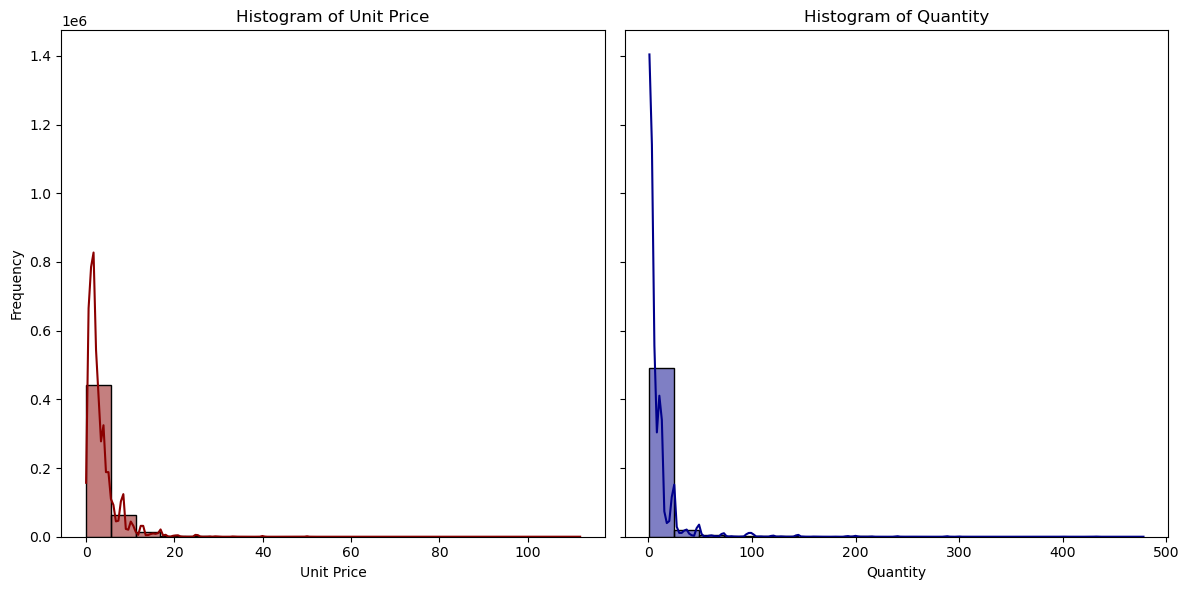

In [31]:
# Plot a histogram for numerical features
# Set up the figure with 1 row and 2 columns for histograms, sharing the y-axis  
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)                      # Set the figure size (width, height)

# Create the first histogram for 'UnitPrice'
sns.histplot(df_zscore['UnitPrice'], bins=20, kde=True, color='darkred', ax=axes[0])   # Create histogram for UnitPrice with KDE
axes[0].set_title('Histogram of Unit Price')
axes[0].set_xlabel('Unit Price')
axes[0].set_ylabel('Frequency')   

# Create the second histogram for 'Quantity' 
sns.histplot(df_zscore['Quantity'], bins=20, kde=True, color='darkblue', ax=axes[1])   # Create histogram for Quantity with KDE
axes[1].set_title('Histogram of Quantity')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Frequency')  
  
plt.tight_layout()           # Adjust the spacing between plots 
plt.show()   

### Categorical Features

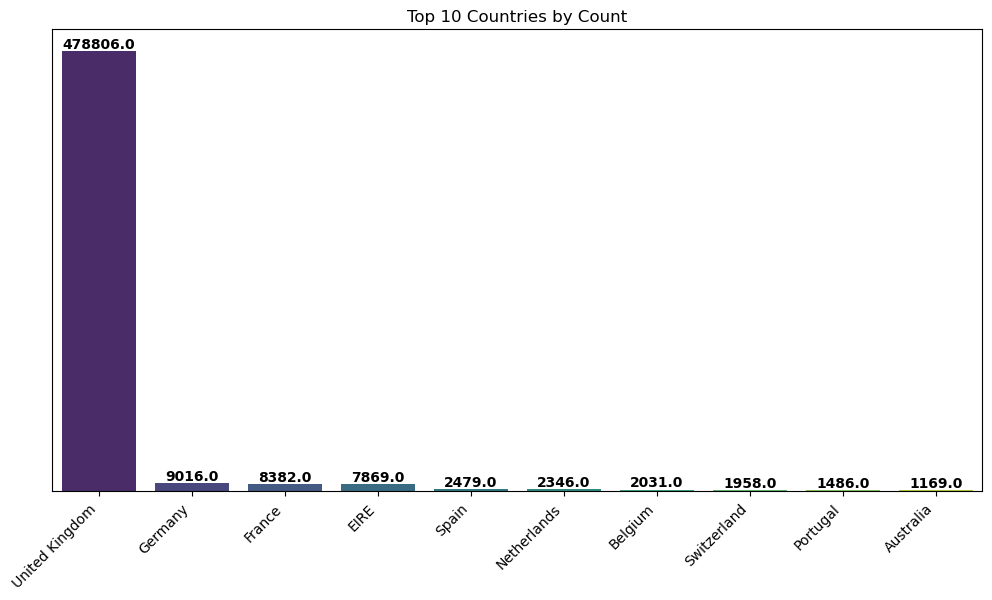

In [32]:
# Plot a bar chart for categorical features --> Country
# Count occurrences of each country and sort in descending order  
country_counts = df_zscore['Country'].value_counts().reset_index()  
country_counts.columns = ['Country', 'Count']                             # Rename columns  
country_counts = country_counts.sort_values(by='Count', ascending=False)  # Sort by count

# Number of top countries to display (top 10)
top_n = 10  
country_counts = country_counts.head(top_n)

# Set the figure size (width, height)  
plt.figure(figsize=(12, 6)) 
# Create a bar plot for 'Country' counts
ax = sns.barplot(data=country_counts, x='Country', y='Count', palette='viridis', order=country_counts['Country'])   

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')    

# Set title and labels  
plt.title(f'Top {top_n} Countries by Count')    
plt.xlabel('')
plt.ylabel('')
ax.set_yticks([]) 
plt.xticks(rotation=45, ha='right')         # Rotate x-axis labels for better readability   
plt.show()   

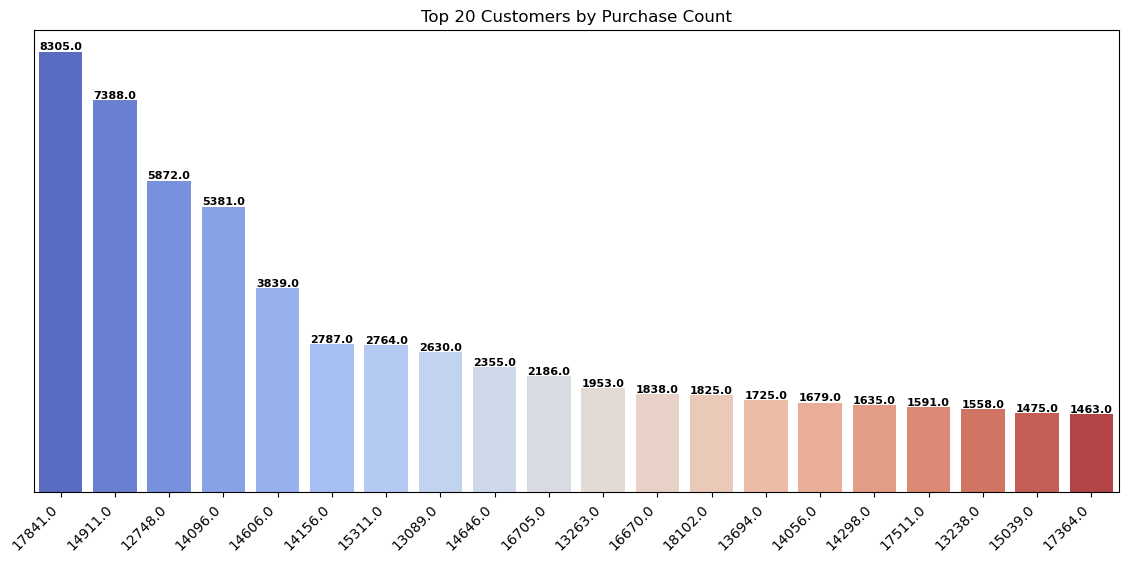

In [33]:
# Plot a bar chart for categorical features --> CustomerID
# Count occurrences of each CustomerID and sort in descending order
customer_counts = df_zscore['CustomerID'].value_counts().reset_index()
customer_counts.columns = ['CustomerID', 'Count']           # Rename columns
customer_counts = customer_counts.sort_values(by='Count', ascending=False).head(20)    # Keep top 20 customers

# Set the figure size
plt.figure(figsize=(14, 6))
# Create a bar plot for 'CustomerID' counts
ax = sns.barplot(data=customer_counts, x='CustomerID', y='Count', palette='coolwarm', order=customer_counts['CustomerID'])

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', fontweight='bold')  

# Set title and labels
plt.title('Top 20 Customers by Purchase Count')  
plt.xlabel('')
plt.ylabel('')
ax.set_yticks([])
plt.xticks(rotation=45, ha='right')       # Rotate x-axis labels for better readability
plt.show()

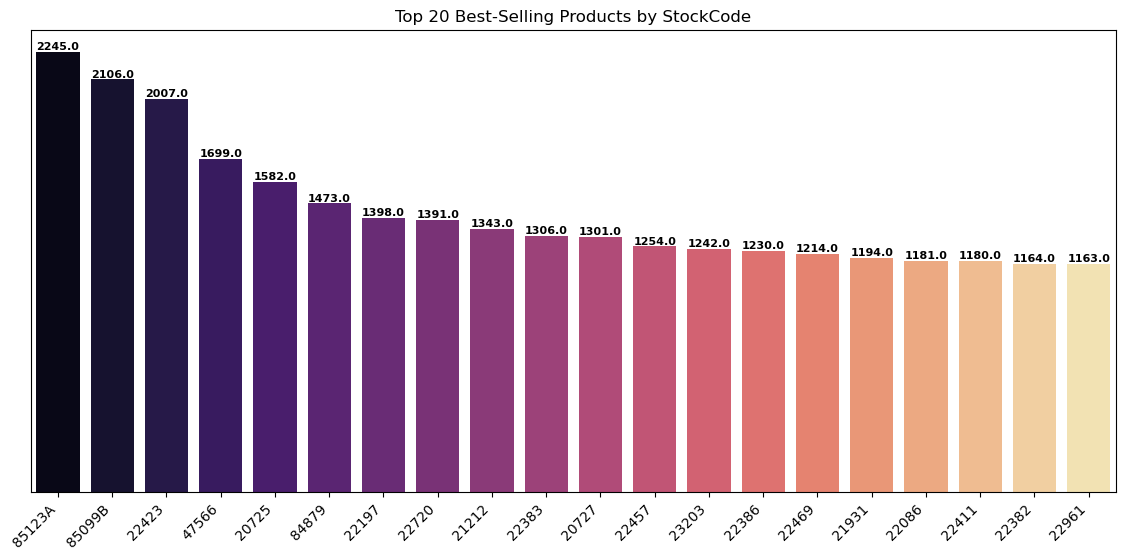

In [34]:
# Plot a bar chart for categorical features --> StockCode
# Count occurrences of each StockCode and sort in descending order
stock_counts = df_zscore['StockCode'].value_counts().reset_index()
stock_counts.columns = ['StockCode', 'Count']         # Rename columns
stock_counts = stock_counts.sort_values(by='Count', ascending=False).head(20)    # Keep top 20 best-selling products

# Set the figure size
plt.figure(figsize=(14, 6))
# Create a bar plot for 'StockCode' counts
ax = sns.barplot(data=stock_counts, x='StockCode', y='Count', palette='magma', order=stock_counts['StockCode'])

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', fontweight='bold')

# Set title and labels
plt.title('Top 20 Best-Selling Products by StockCode')  
plt.xlabel('')
plt.ylabel('')
ax.set_yticks([])
plt.xticks(rotation=45, ha='right')       # Rotate x-axis labels for better readability
plt.show()

<hr>
<div id="explore_relationships"> 
    <h2>Explore Relationships</h2>    
</div>

### Numerical Features

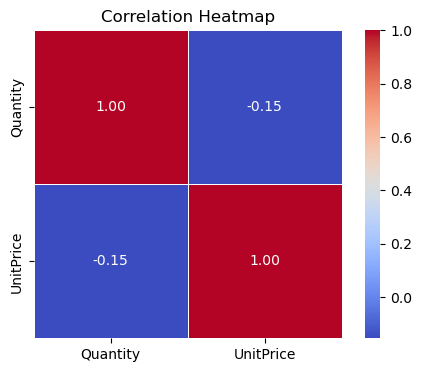

In [35]:
# Plot a heatmap to explore relationships between variables --> Quantity & UnitPrice
# Compute the correlation matrix
correlation_matrix = df_zscore[['Quantity', 'UnitPrice']].corr()

# Set the figure size
plt.figure(figsize=(6, 4))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)

# Set title
plt.title('Correlation Heatmap')
plt.show()

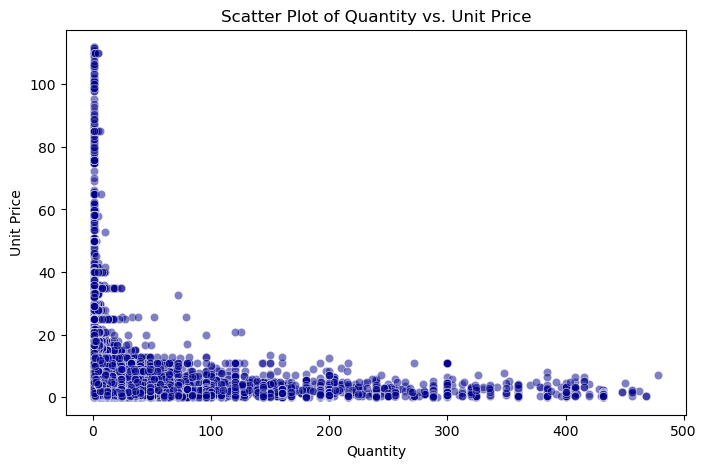

In [36]:
# Plot a scatterplot to Check how variables interact --> Quantity & UnitPrice
# Set figure size
plt.figure(figsize=(8, 5))

# Create scatter plot
sns.scatterplot(x=df_zscore['Quantity'], y=df_zscore['UnitPrice'], alpha=0.5, color='darkblue')

# Set titles and labels
plt.title('Scatter Plot of Quantity vs. Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

### Numerical & Categorical Features

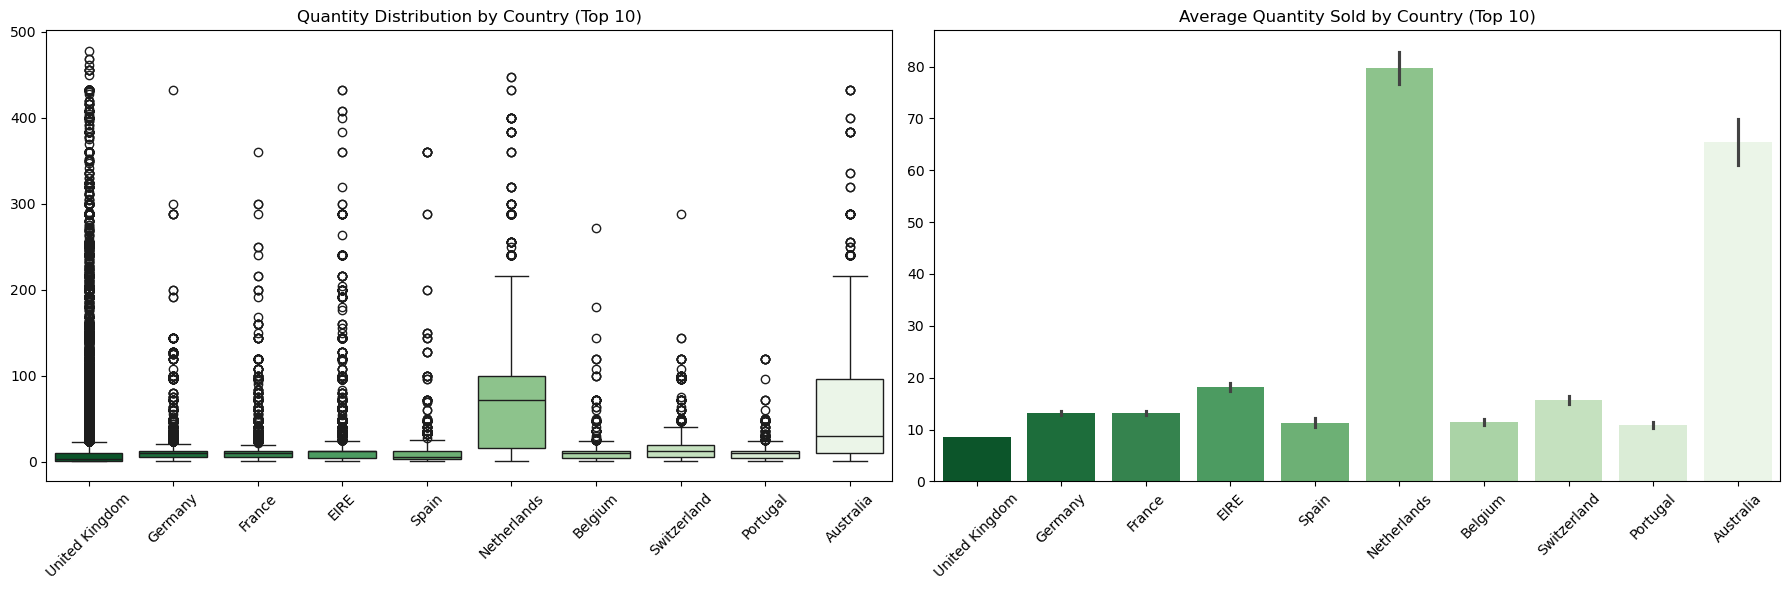

In [37]:
# Plot box and bar plots to view relationships between numerical and categorical variables --> Quantity & Country
# Count occurrences of each country and sort in descending order  
country_counts = df_zscore['Country'].value_counts().reset_index()  
country_counts.columns = ['Country', 'Count']                             # Rename columns  
country_counts = country_counts.sort_values(by='Count', ascending=False).head(10)    # Keep top 10 countries   

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))         # 1 row, 2 columns

# Boxplot: Distribution of Quantity by Country
sns.boxplot(x='Country', y='Quantity', data=df_zscore, palette='Greens_r', 
            order=country_counts['Country'], ax=axes[0])
# Set titles and labels
axes[0].set_title(f'Quantity Distribution by Country (Top {10})')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

# Barplot: Average Quantity Sold per Country
sns.barplot(x='Country', y='Quantity', data=df_zscore, palette='Greens_r', 
            order=country_counts['Country'], estimator=np.mean, ax=axes[1])
# Set titles and labels
axes[1].set_title(f'Average Quantity Sold by Country (Top {10})')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

plt.tight_layout()               # Adjust the spacing between plots
plt.show()

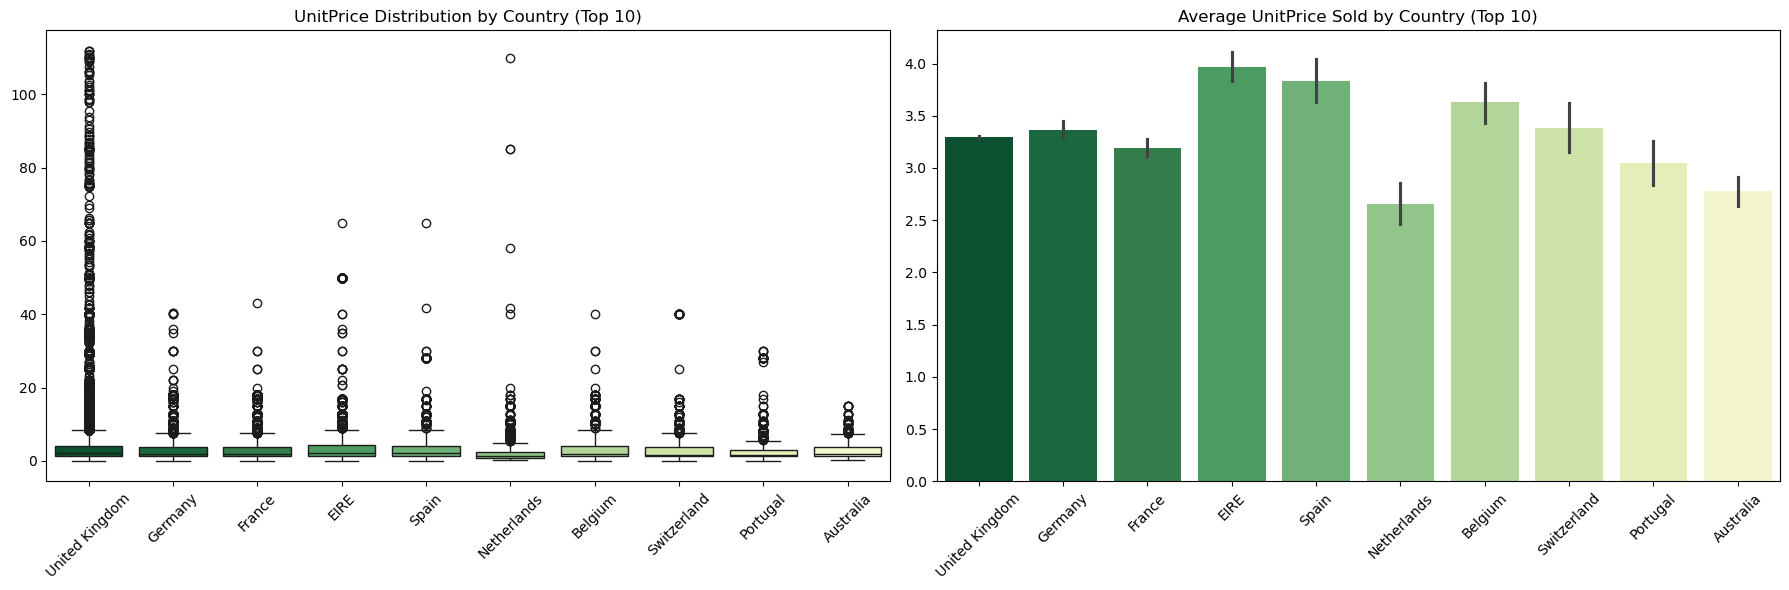

In [38]:
# Plot box and bar plots to view relationships between numerical and categorical variables --> UnitPrice & Country
# Count occurrences of each country and sort in descending order  
country_counts = df_zscore['Country'].value_counts().reset_index()  
country_counts.columns = ['Country', 'Count']                             # Rename columns  
country_counts = country_counts.sort_values(by='Count', ascending=False).head(10)    # Keep top 10 countries

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))         # 1 row, 2 columns

# Boxplot: Distribution of UnitPrice by Country
sns.boxplot(x='Country', y='UnitPrice', data=df_zscore, palette='YlGn_r', 
            order=country_counts['Country'], ax=axes[0])
# Set titles and labels
axes[0].set_title(f'UnitPrice Distribution by Country (Top {10})')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

# Barplot: Average UnitPrice Sold per Country
sns.barplot(x='Country', y='UnitPrice', data=df_zscore, palette='YlGn_r', 
            order=country_counts['Country'], estimator=np.mean, ax=axes[1])
# Set titles and labels
axes[1].set_title(f'Average UnitPrice Sold by Country (Top {10})')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

plt.tight_layout()               # Adjust the spacing between plots
plt.show()

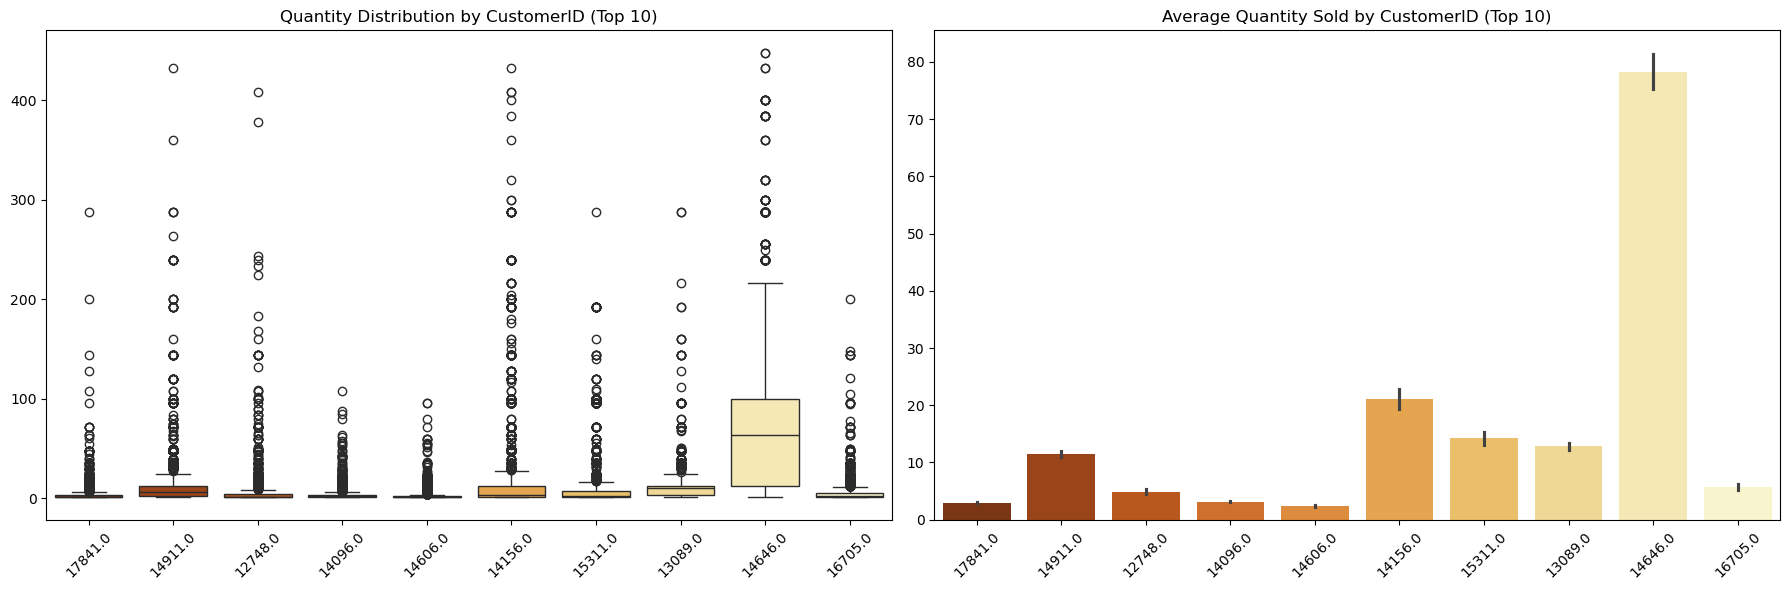

In [39]:
# Plot box and bar plots to view relationships between numerical and categorical variables --> Quantity & CustomerID
# Count occurrences of each CustomerID and sort in descending order
customer_counts = df_zscore['CustomerID'].value_counts().reset_index()
customer_counts.columns = ['CustomerID', 'Count']           # Rename columns
customer_counts = customer_counts.sort_values(by='Count', ascending=False).head(10)    # Keep top 10 customers   

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))         # 1 row, 2 columns

# Boxplot: Distribution of Quantity by CustomerID
sns.boxplot(x='CustomerID', y='Quantity', data=df_zscore, palette='YlOrBr_r', 
            order=customer_counts['CustomerID'], ax=axes[0])
# Set titles and labels
axes[0].set_title(f'Quantity Distribution by CustomerID (Top {10})')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

# Barplot: Average Quantity Sold per CustomerID
sns.barplot(x='CustomerID', y='Quantity', data=df_zscore, palette='YlOrBr_r', 
            order=customer_counts['CustomerID'], estimator=np.mean, ax=axes[1])
# Set titles and labels
axes[1].set_title(f'Average Quantity Sold by CustomerID (Top {10})')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

plt.tight_layout()               # Adjust the spacing between plots
plt.show()

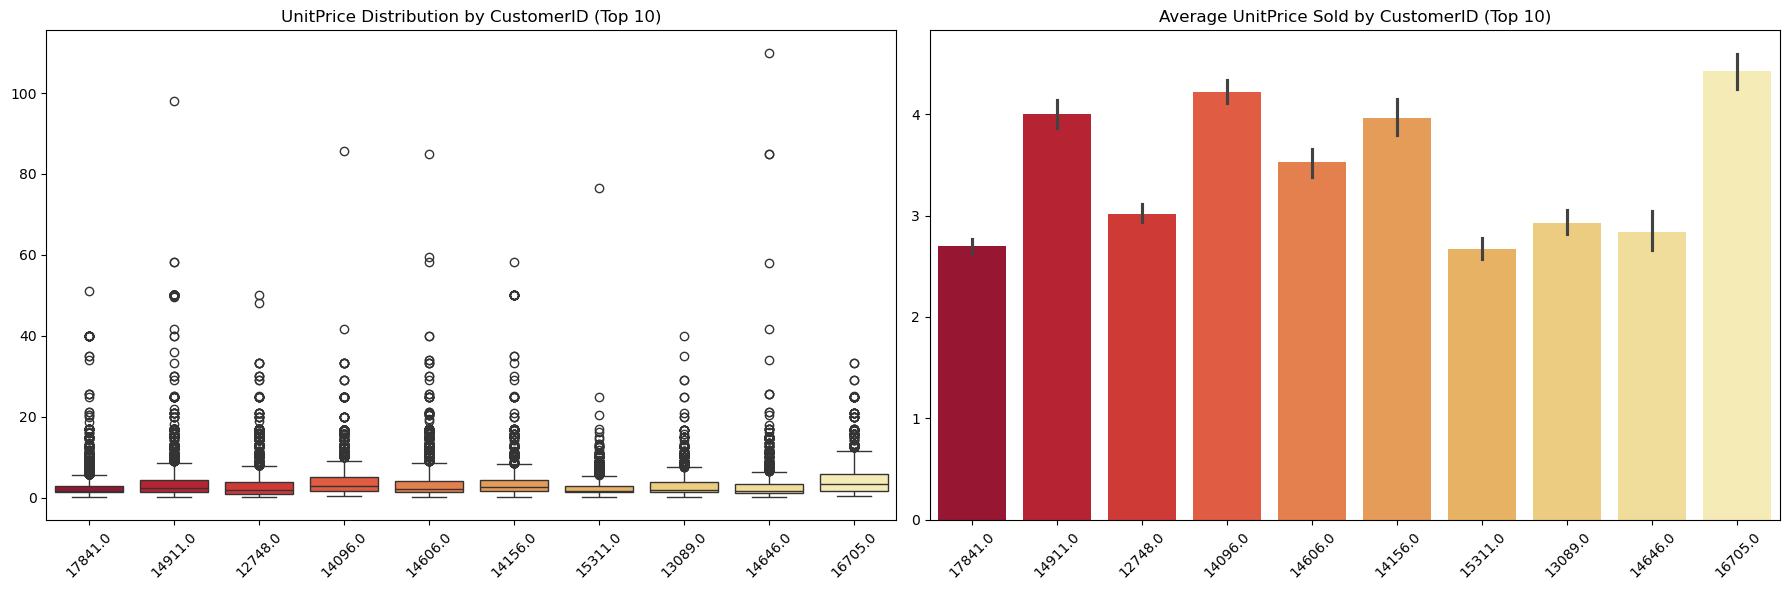

In [40]:
# Plot box and bar plots to view relationships between numerical and categorical variables --> UnitPrice & CustomerID
# Count occurrences of each CustomerID and sort in descending order
customer_counts = df_zscore['CustomerID'].value_counts().reset_index()
customer_counts.columns = ['CustomerID', 'Count']           # Rename columns
customer_counts = customer_counts.sort_values(by='Count', ascending=False).head(10)    # Keep top 10 customers   

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))         # 1 row, 2 columns

# Boxplot: Distribution of UnitPrice by CustomerID
sns.boxplot(x='CustomerID', y='UnitPrice', data=df_zscore, palette='YlOrRd_r', 
            order=customer_counts['CustomerID'], ax=axes[0])
# Set titles and labels
axes[0].set_title(f'UnitPrice Distribution by CustomerID (Top {10})')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

# Barplot: Average UnitPrice Sold per CustomerID
sns.barplot(x='CustomerID', y='UnitPrice', data=df_zscore, palette='YlOrRd_r', 
            order=customer_counts['CustomerID'], estimator=np.mean, ax=axes[1])
# Set titles and labels
axes[1].set_title(f'Average UnitPrice Sold by CustomerID (Top {10})')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

plt.tight_layout()               # Adjust the spacing between plots
plt.show()

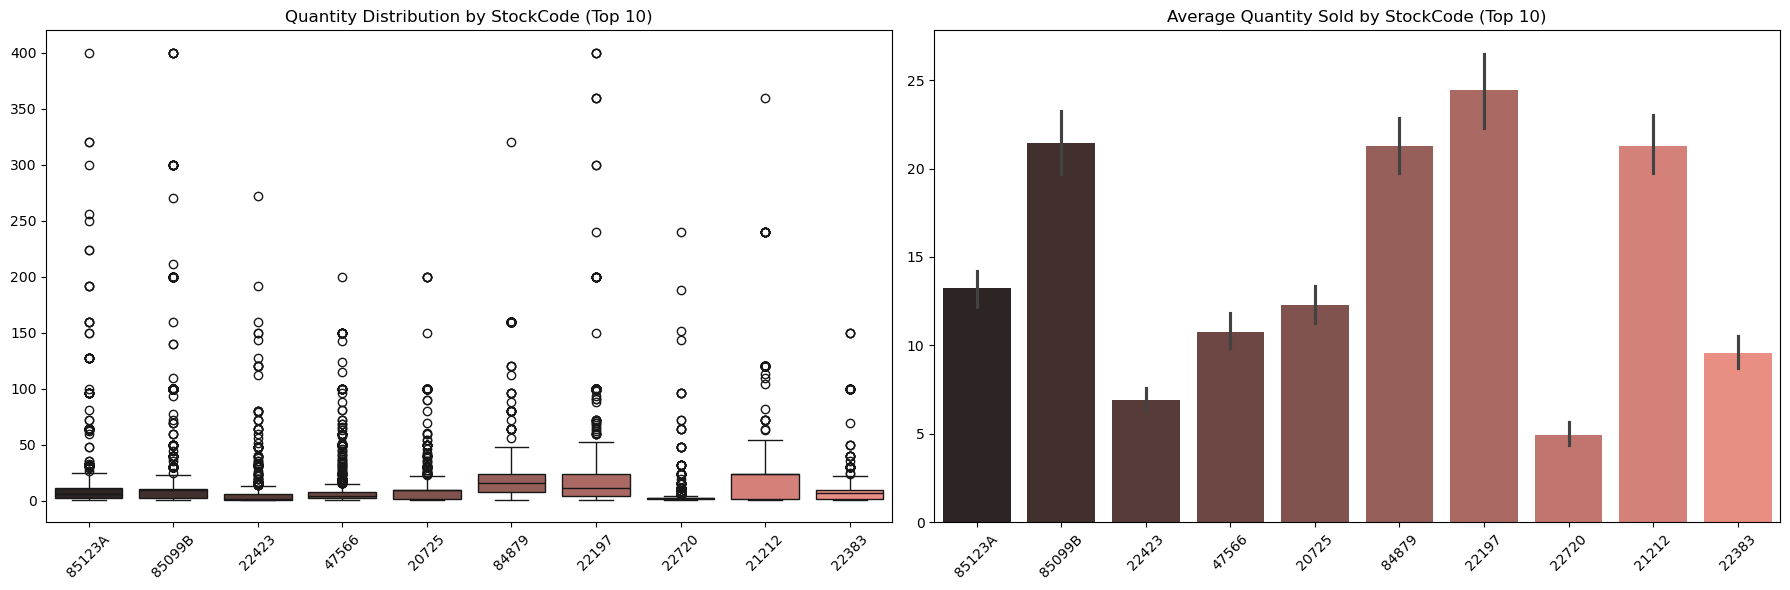

In [41]:
# Plot box and bar plots to view relationships between numerical and categorical variables --> Quantity & StockCode
# Count occurrences of each StockCode and sort in descending order
stock_counts = df_zscore['StockCode'].value_counts().reset_index()
stock_counts.columns = ['StockCode', 'Count']         # Rename columns
stock_counts = stock_counts.sort_values(by='Count', ascending=False).head(10)    # Keep top 10 best-selling products

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))         # 1 row, 2 columns

# Boxplot: Distribution of Quantity by StockCode
sns.boxplot(x='StockCode', y='Quantity', data=df_zscore, palette='dark:salmon', 
            order=stock_counts['StockCode'], ax=axes[0])
# Set titles and labels
axes[0].set_title(f'Quantity Distribution by StockCode (Top {10})')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

# Barplot: Average Quantity Sold per StockCode
sns.barplot(x='StockCode', y='Quantity', data=df_zscore, palette='dark:salmon', 
            order=stock_counts['StockCode'], estimator=np.mean, ax=axes[1])
# Set titles and labels
axes[1].set_title(f'Average Quantity Sold by StockCode (Top {10})')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

plt.tight_layout()               # Adjust the spacing between plots
plt.show()

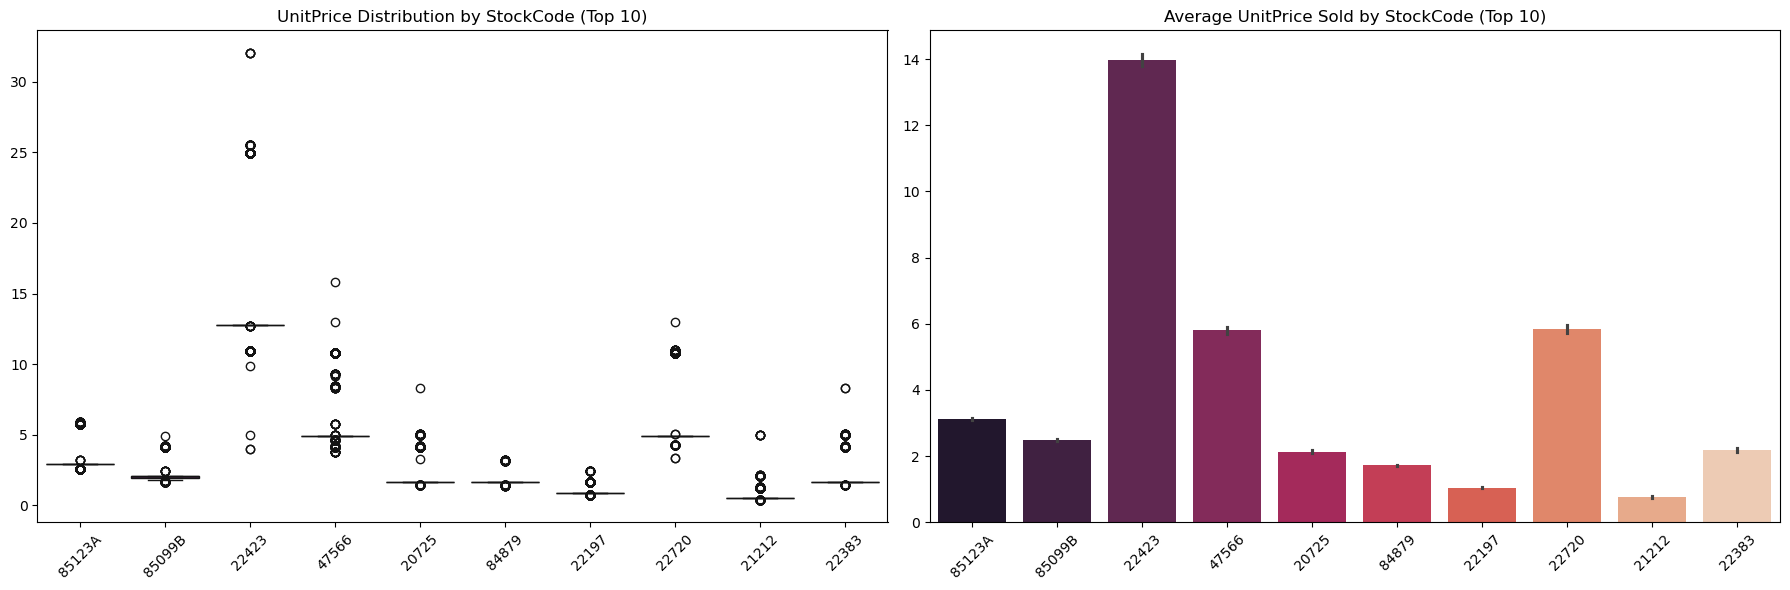

In [42]:
# Plot box and bar plots to view relationships between numerical and categorical variables --> UnitPrice & StockCode
# Count occurrences of each StockCode and sort in descending order
stock_counts = df_zscore['StockCode'].value_counts().reset_index()
stock_counts.columns = ['StockCode', 'Count']         # Rename columns
stock_counts = stock_counts.sort_values(by='Count', ascending=False).head(10)    # Keep top 10 best-selling products

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(18, 6))         # 1 row, 2 columns

# Boxplot: Distribution of UnitPrice by StockCode
sns.boxplot(x='StockCode', y='UnitPrice', data=df_zscore, palette='rocket', 
            order=stock_counts['StockCode'], ax=axes[0])
# Set titles and labels
axes[0].set_title(f'UnitPrice Distribution by StockCode (Top {10})')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

# Barplot: Average UnitPrice Sold per StockCode
sns.barplot(x='StockCode', y='UnitPrice', data=df_zscore, palette='rocket', 
            order=stock_counts['StockCode'], estimator=np.mean, ax=axes[1])
# Set titles and labels
axes[1].set_title(f'Average UnitPrice Sold by StockCode (Top {10})')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)        # Rotate x-axis labels for better readability

plt.tight_layout()               # Adjust the spacing between plots
plt.show()

### Categorical Features

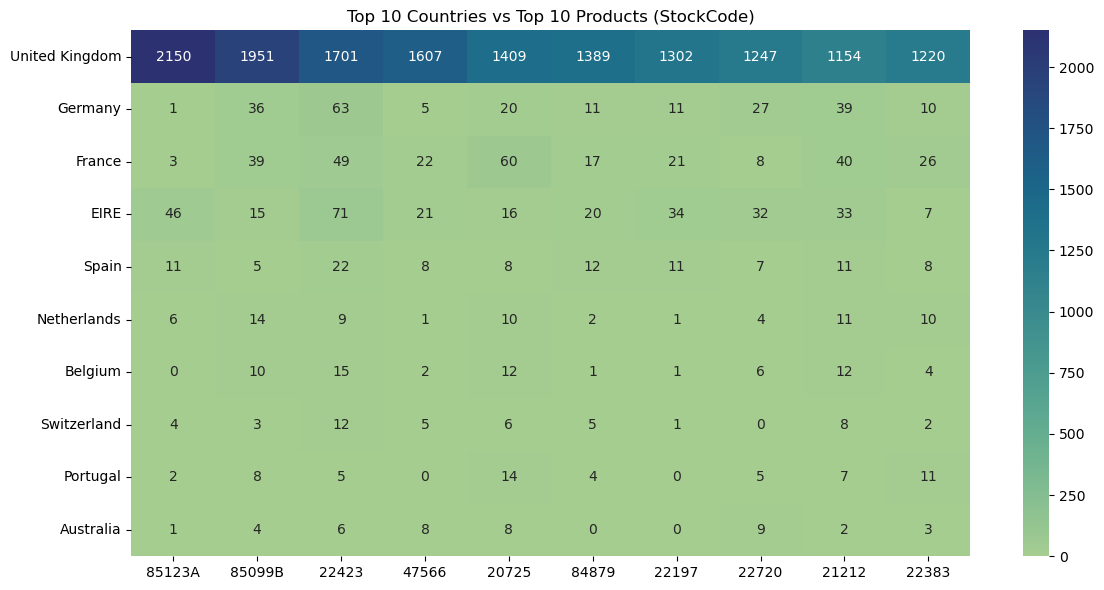

In [43]:
# Plot a heatmap to view relationships between variables --> Country & StockCode
# Create a cross-tabulation between Country and StockCode
country_stock = pd.crosstab(df_zscore['Country'], df_zscore['StockCode'])

# Filter top 10 countries and top 10 stock codes for better readability
top_countries = df_zscore['Country'].value_counts().head(10).index
top_stocks = df_zscore['StockCode'].value_counts().head(10).index
filtered_data = country_stock.loc[top_countries, top_stocks]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_data, annot=True, fmt='d', cmap='crest')

# Set titles and labels
plt.title('Top 10 Countries vs Top 10 Products (StockCode)')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

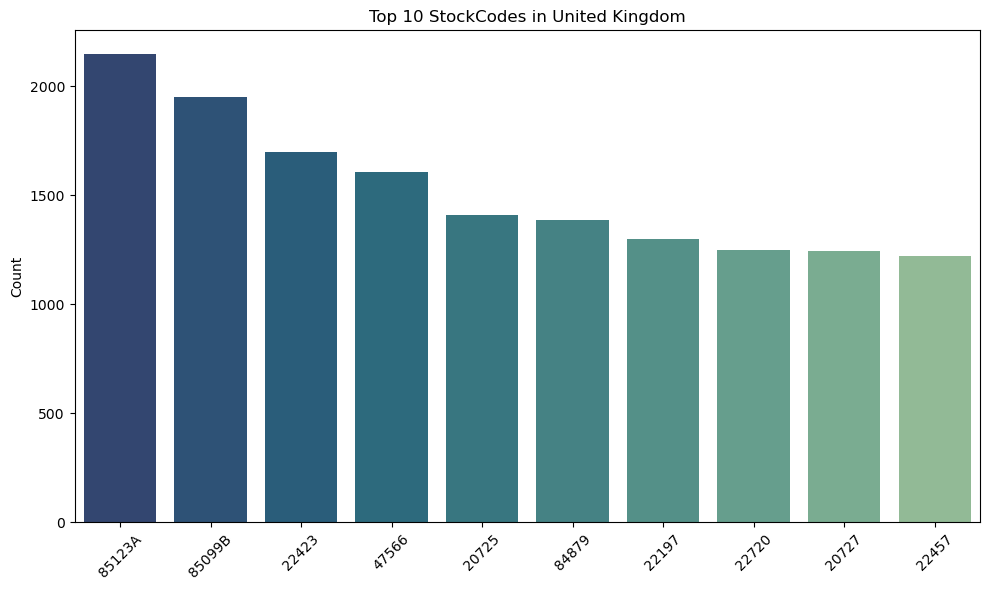

In [44]:
# Plot a bar chart to view relationships between variables --> Country & StockCode
# Select a country (e.g. UK)
selected_country = 'United Kingdom'

# Filter for that country
df_country = df_zscore[df_zscore['Country'] == selected_country]

# Group by StockCode and Count
stockcode_counts = df_country['StockCode'].value_counts().head(10).reset_index()           # Keep top 10
stockcode_counts.columns = ['StockCode', 'Count']

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=stockcode_counts, x='StockCode', y='Count', palette='crest_r',
            order=stockcode_counts['StockCode'])

# Set titles and labels
plt.title(f'Top 10 StockCodes in {selected_country}')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

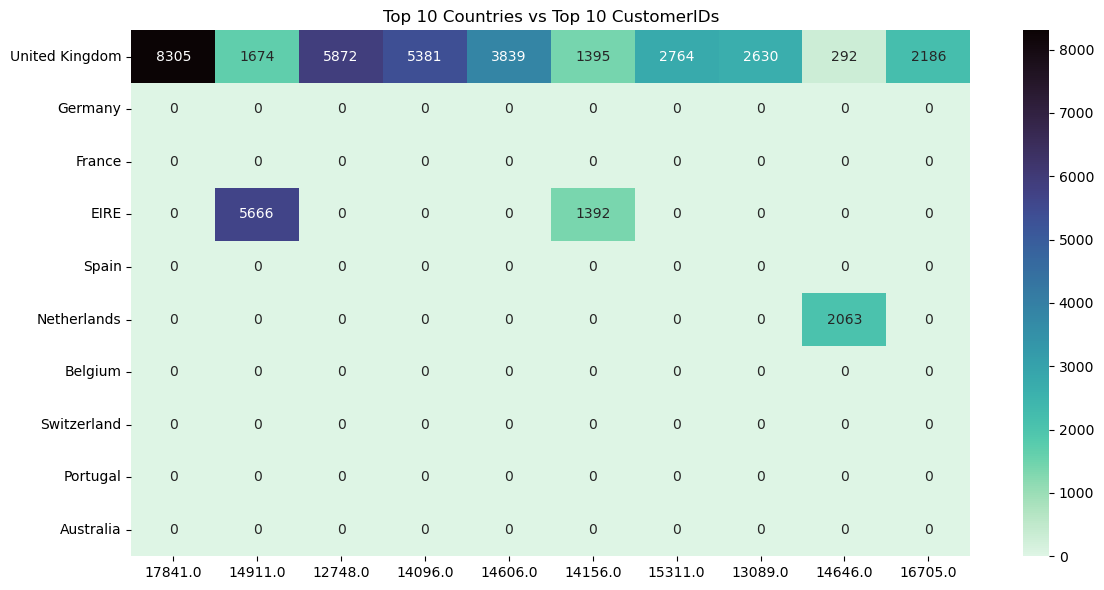

In [45]:
# Plot a heatmap to view relationships between variables --> Country & CustomerID
# Create a cross-tabulation between Country and CustomerID
country_customer = pd.crosstab(df_zscore['Country'], df_zscore['CustomerID'])

# Filter top 10 countries and top 10 customerIDs for better readability
top_countries = df_zscore['Country'].value_counts().head(10).index
top_CustomerIDs = df_zscore['CustomerID'].value_counts().head(10).index
filtered_data = country_customer.loc[top_countries, top_CustomerIDs]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_data, annot=True, fmt='d', cmap='mako_r')

# Set titles and labels
plt.title('Top 10 Countries vs Top 10 CustomerIDs')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

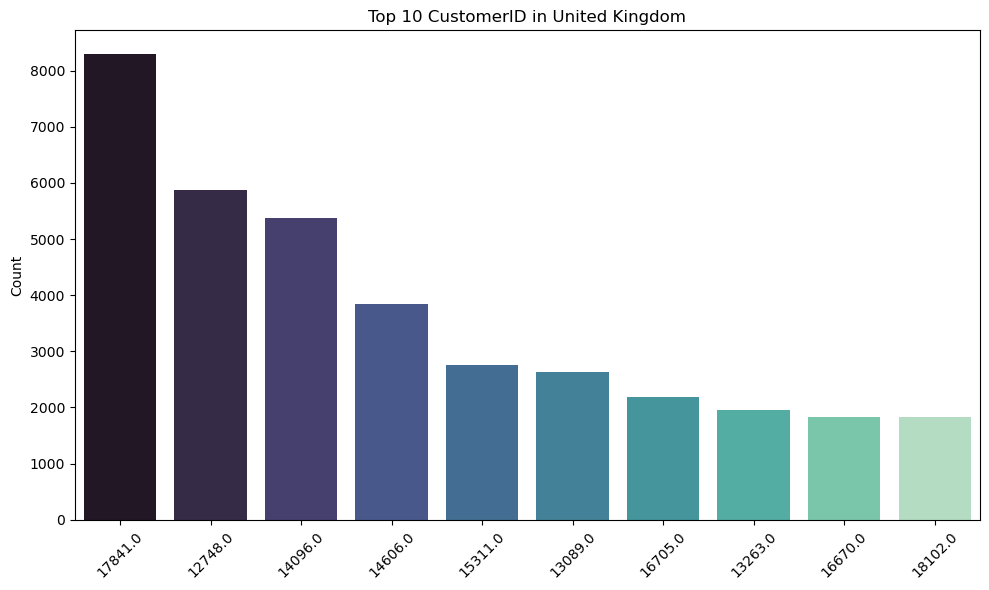

In [46]:
# Plot a bar chart to view relationships between variables --> Country & CustomerID
# Select a country (e.g. UK)
selected_country = 'United Kingdom'

# Filter for that country
df_country = df_zscore[df_zscore['Country'] == selected_country]

# Group by CustomerID and Count
customerID_counts = df_country['CustomerID'].value_counts().head(10).reset_index()           # Keep top 10
customerID_counts.columns = ['CustomerID', 'Count']

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=customerID_counts, x='CustomerID', y='Count', palette='mako',
            order=customerID_counts['CustomerID'])

# Set titles and labels
plt.title(f'Top 10 CustomerID in {selected_country}')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

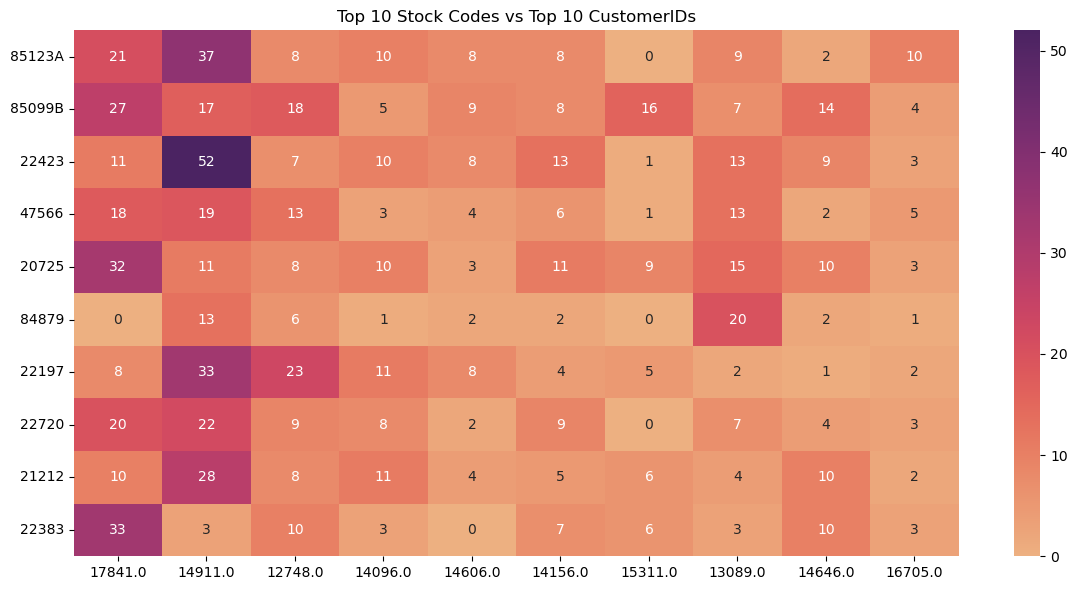

In [47]:
# Plot a heatmap to view relationships between variables --> StockCode & CustomerID
# Create a cross-tabulation between StockCode and CustomerID
stock_customer = pd.crosstab(df_zscore['StockCode'], df_zscore['CustomerID'])

# Filter top 10 stock codes and top 10 customerIDs for better readability
top_stocks = df_zscore['StockCode'].value_counts().head(10).index
top_CustomerIDs = df_zscore['CustomerID'].value_counts().head(10).index
filtered_data = stock_customer.loc[top_stocks, top_CustomerIDs]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_data, annot=True, fmt='d', cmap='flare')

# Set titles and labels
plt.title('Top 10 Stock Codes vs Top 10 CustomerIDs')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

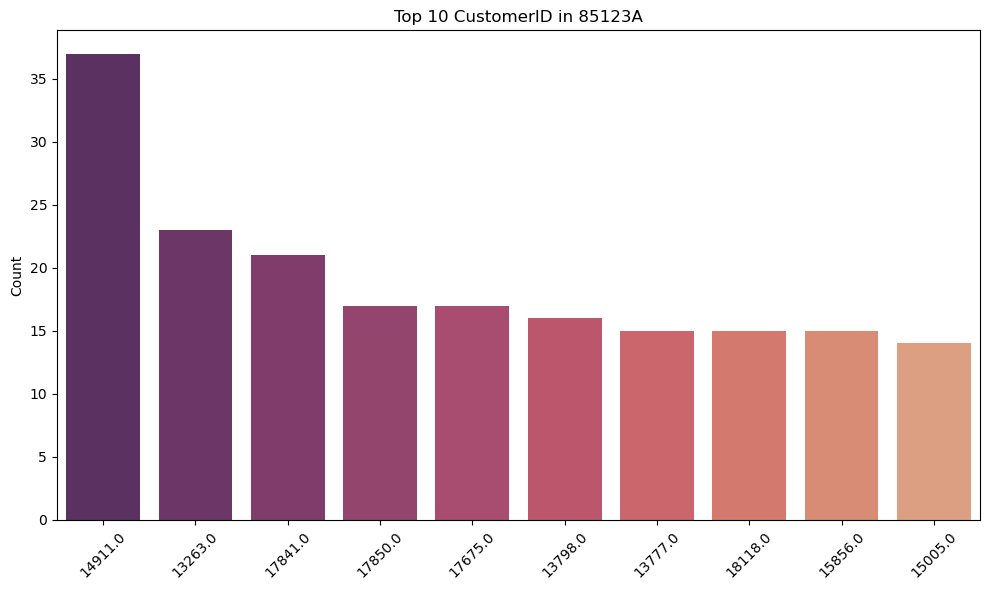

In [48]:
# Plot a bar chart to view relationships between variables --> StockCode & CustomerID
# Select a StockCode (e.g. 85123A)
selected_stockcode = '85123A'

# Filter for that stockcode
df_stockcode = df_zscore[df_zscore['StockCode'] == selected_stockcode]

# Group by CustomerID and Count
customerID_counts = df_stockcode['CustomerID'].value_counts().head(10).reset_index()           # Keep top 10
customerID_counts.columns = ['CustomerID', 'Count']

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=customerID_counts, x='CustomerID', y='Count', palette='flare_r',
            order=customerID_counts['CustomerID'])

# Set titles and labels
plt.title(f'Top 10 CustomerID in {selected_stockcode}')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<hr>
<div id="analyze_trends"> 
    <h2>Analyze Trends</h2>    
</div>

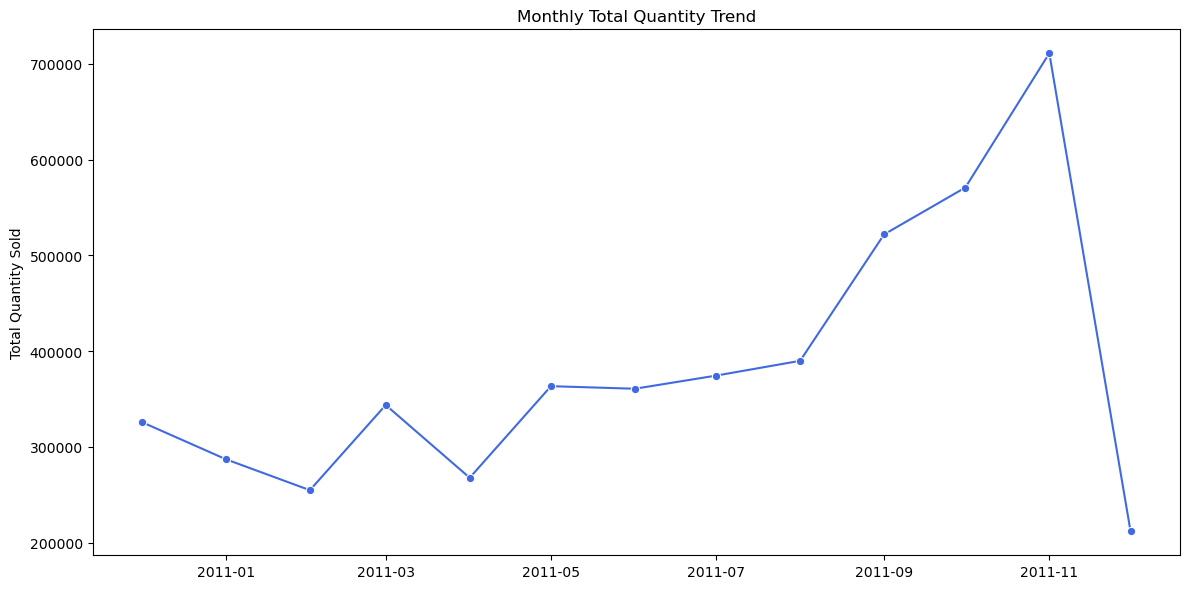

In [49]:
# Plot a time series plot to analyze trends over time --> Monthly 'Quantity' trend 
# Create a 'InvoiceMonth' column for monthly trend
df_zscore['InvoiceMonth'] = df_zscore['InvoiceDate'].dt.to_period('M').dt.to_timestamp()

# Group by month and calculate total quantity sold
monthly_trend = df_zscore.groupby('InvoiceMonth')['Quantity'].sum().reset_index()

# Plot the monthly trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='InvoiceMonth', y='Quantity', marker='o', color='royalblue')

# Set titles and labels
plt.title('Monthly Total Quantity Trend')
plt.xlabel('')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

#### 🧮 Total Price Calculation <a id="total_price"></a>

In [50]:
# Create 'TotalPrice' feature 
df_zscore['TotalPrice'] = df_zscore['Quantity'] * df_zscore['UnitPrice']

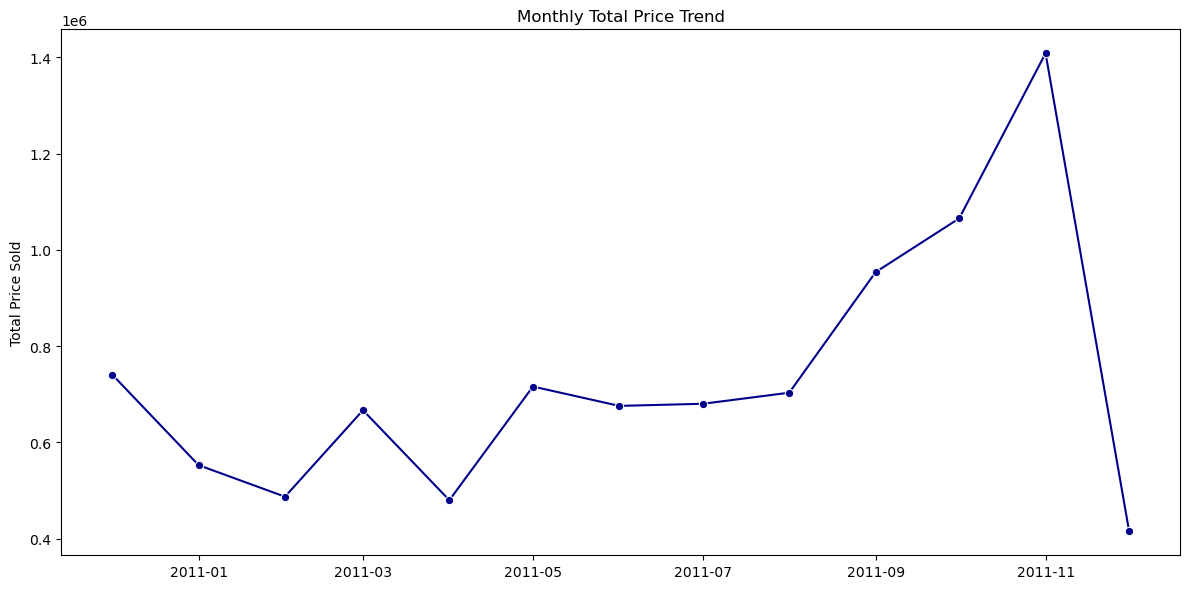

In [51]:
# Plot a time series plot to analyze trends over time --> Monthly 'TotalPrice' trend 
# Group by month and calculate total price sold
monthly_trend = df_zscore.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()

# Plot the monthly trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='InvoiceMonth', y='TotalPrice', marker='o', color='darkblue')

# Set titles and labels
plt.title('Monthly Total Price Trend')
plt.xlabel('')
plt.ylabel('Total Price Sold')
plt.tight_layout()
plt.show()

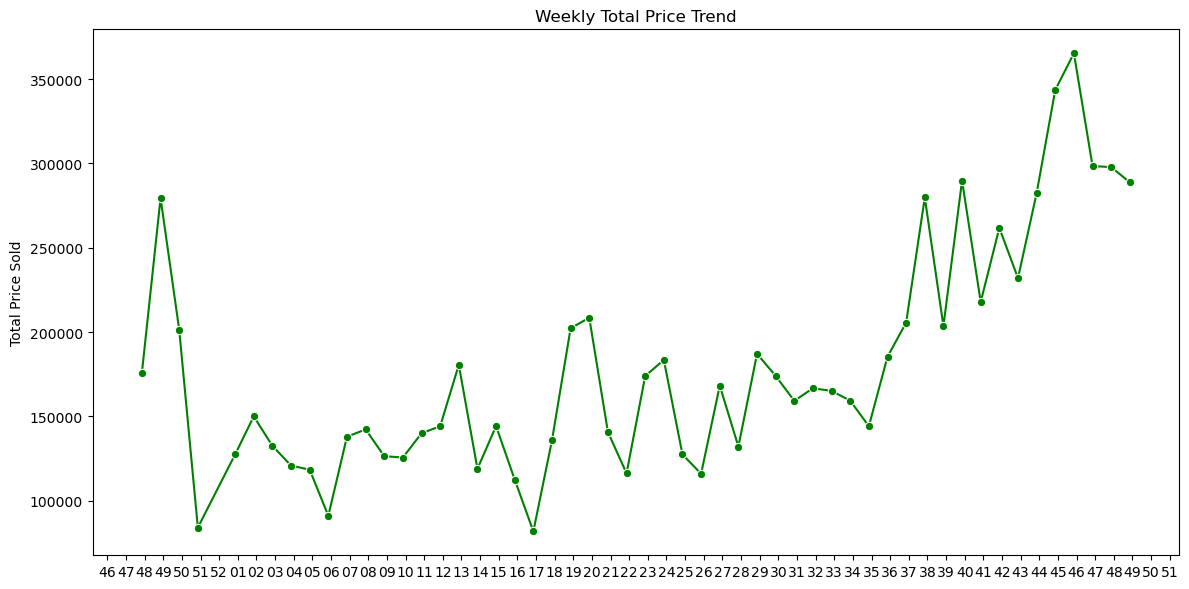

In [52]:
# Plot a time series plot to analyze trends over time --> Weekly 'TotalPrice' trend
# Create a 'InvoiceWeek' column for weekly trend
df_zscore['InvoiceWeek'] = df_zscore['InvoiceDate'].dt.to_period('W').dt.to_timestamp()

# Group by week and calculate total price sold
weekly_trend = weekly_trend = df_zscore.groupby('InvoiceWeek')['TotalPrice'].sum().reset_index()

# Plot the weekly trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_trend, x='InvoiceWeek', y='TotalPrice', marker='o', color='green')

# Set the date format for x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%W'))        # Format: Year-Week
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))   # Adjust the interval for weekly ticks

# Set titles and labels
plt.title('Weekly Total Price Trend')
plt.xlabel('')
plt.ylabel('Total Price Sold')
plt.tight_layout()
plt.show()

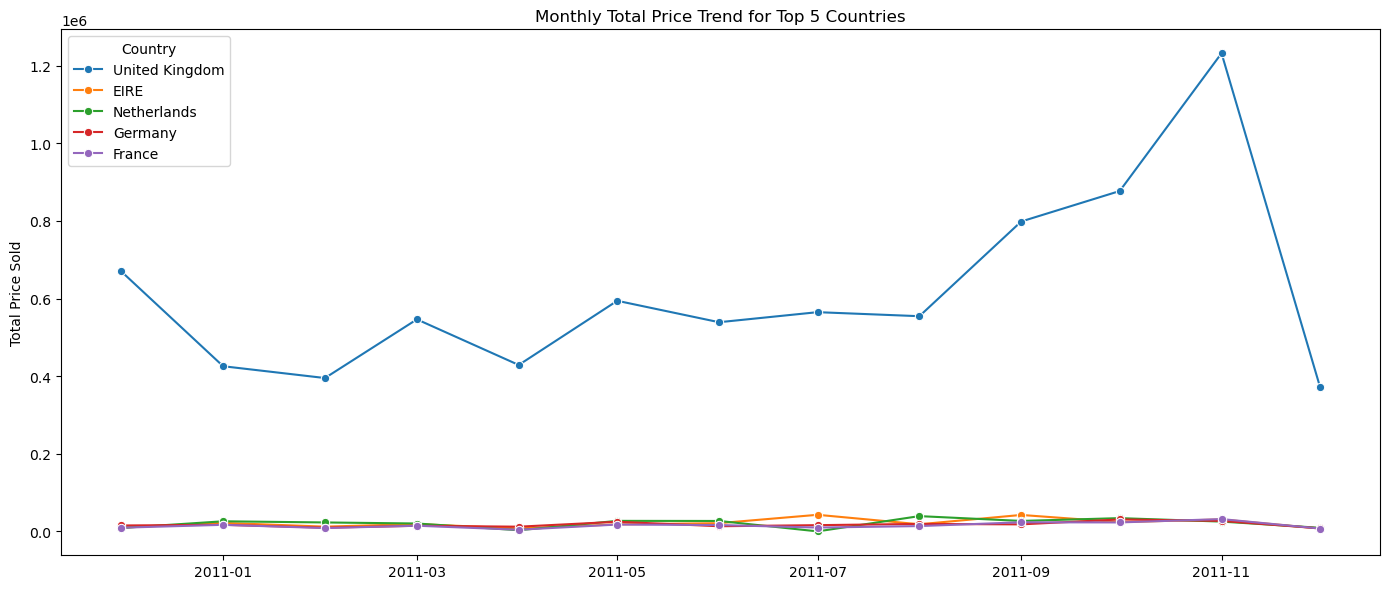

In [53]:
# Plot a time series plot to analyze trends over time --> Monthly 'TotalPrice' trend based on 'Country'
# Get top 5 countries by total price
top_countries = df_zscore.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5).index.tolist()     # Top 5 countries

# Filter data for only top countries
df_top_countries = df_zscore[df_zscore['Country'].isin(top_countries)].copy()

# Group by month and country, then sum total price
monthly_country_trend = df_top_countries.groupby(['InvoiceMonth', 'Country'])['TotalPrice'].sum().reset_index()

# Plot the monthly trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_country_trend, x='InvoiceMonth', y='TotalPrice', hue='Country', marker='o',
             hue_order=top_countries)       

# Set titles and labels
plt.title('Monthly Total Price Trend for Top 5 Countries')
plt.xlabel('')
plt.ylabel('Total Price Sold')
plt.tight_layout()
plt.show()

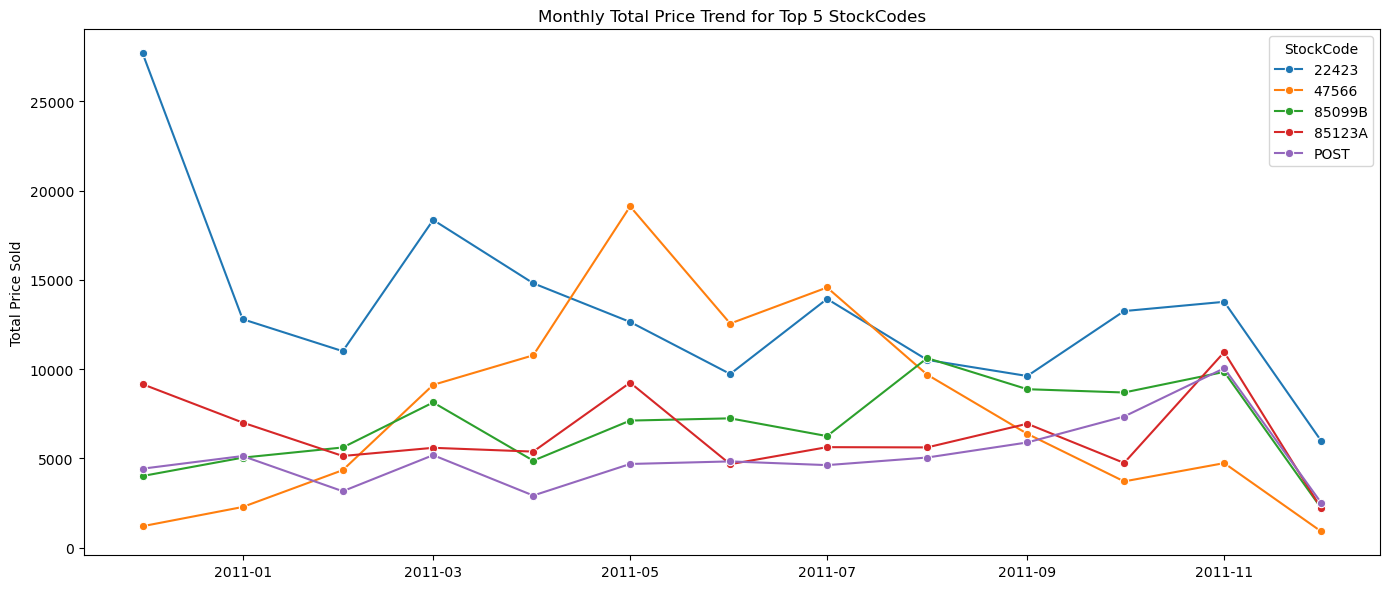

In [54]:
# Plot a time series plot to analyze trends over time --> Monthly 'TotalPrice' trend based on 'StockCode'
# Get top 5 most sold products by total price
top_stockcodes = df_zscore.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False).head(5).index.tolist()     # Top 5 stockcodes

# Filter data for only top products (stockcodes)
df_top_stockcodes = df_zscore[df_zscore['StockCode'].isin(top_stockcodes)].copy()

# Group by month and stockcode, then sum total price
monthly_stockcode_trend = df_top_stockcodes.groupby(['InvoiceMonth', 'StockCode'])['TotalPrice'].sum().reset_index()

# Plot the monthly trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_stockcode_trend, x='InvoiceMonth', y='TotalPrice', hue='StockCode', marker='o',
             hue_order=top_stockcodes)

# Set titles and labels
plt.title('Monthly Total Price Trend for Top 5 StockCodes')
plt.xlabel('')
plt.ylabel('Total Price Sold')
plt.tight_layout()
plt.show()

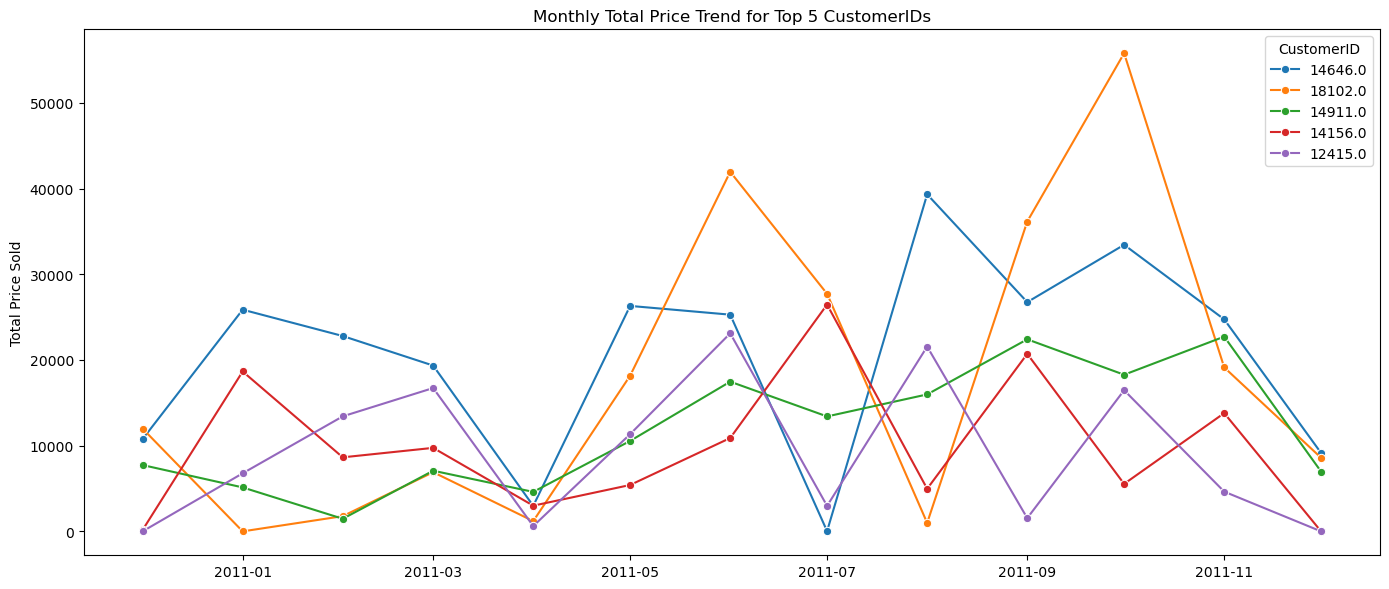

In [55]:
# Plot a time series plot to analyze trends over time --> Monthly 'TotalPrice' trend based on 'CustomerID'
# Get top 5 customerIDs by total price
top_customerIDs = df_zscore.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(5).index.tolist()     # Top 5 customerIDs

# Filter data for only top customerIDs
df_top_customerIDs = df_zscore[df_zscore['CustomerID'].isin(top_customerIDs)].copy()

# Group by month and customerID, then sum total price
monthly_customerIDs_trend = df_top_customerIDs.groupby(['InvoiceMonth', 'CustomerID'])['TotalPrice'].sum().reset_index()

# Plot the monthly trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_customerIDs_trend, x='InvoiceMonth', y='TotalPrice', hue='CustomerID', marker='o',
             hue_order=top_customerIDs)

# Set titles and labels
plt.title('Monthly Total Price Trend for Top 5 CustomerIDs')
plt.xlabel('')
plt.ylabel('Total Price Sold')
plt.tight_layout()
plt.show()

<hr>
<div id="cohort_analysis"> 
    <h2>Cohort Analysis</h2>    
</div>
In this analysis, customers are grouped based on when they first purchased (e.g., the month they first purchased), then it is examined how active they remain and return to purchase in subsequent months.

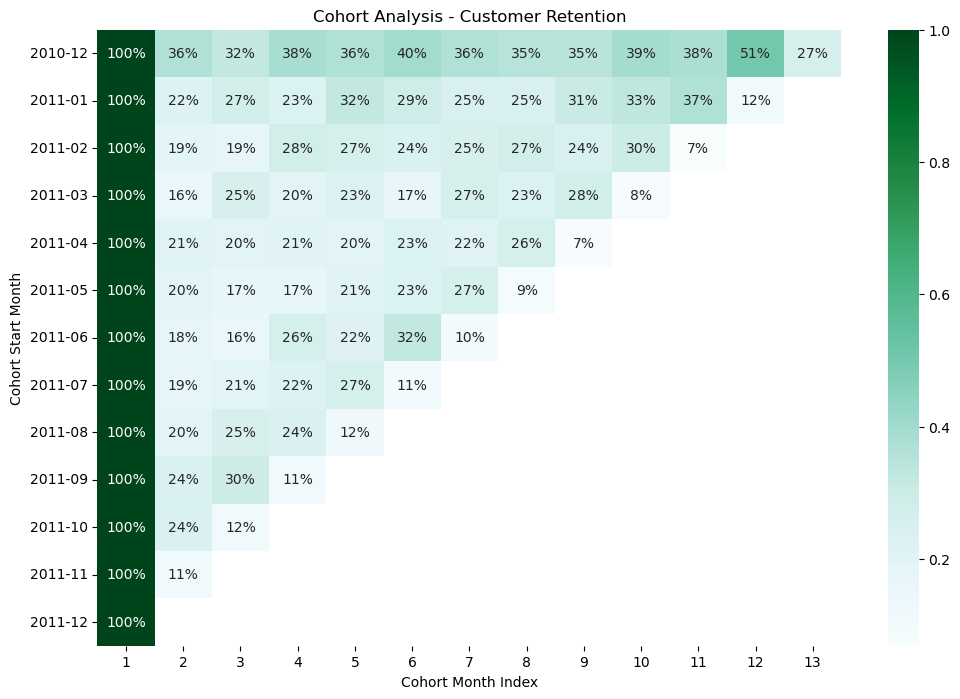

In [56]:
# Cohort analysis to identify customer behaviors at different times 
# Create the 'CohortMonth': the month of the customer's first purchase
df_zscore['CohortMonth'] = df_zscore.groupby('CustomerID')['InvoiceMonth'].transform('min')

# Calculate the number of months between the invoice date and the cohort month
def get_month_diff(df):
    return (df_zscore['InvoiceMonth'].dt.year - df_zscore['CohortMonth'].dt.year) * 12 + \
           (df_zscore['InvoiceMonth'].dt.month - df_zscore['CohortMonth'].dt.month)

df_zscore['CohortIndex'] = get_month_diff(df_zscore) + 1      # Month index starts at 1

# Count unique customers in each CohortMonth and CohortIndex
cohort_data = df_zscore.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Pivot the data to create a retention matrix
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Get cohort sizes (number of customers in the first month)
cohort_sizes = cohort_counts.iloc[:, 0]

# Calculate retention rates
retention = cohort_counts.divide(cohort_sizes, axis=0).round(3)

# Format CohortMonth to show only YYYY-MM
retention.index = retention.index.to_series().dt.strftime('%Y-%m')

# Plot the retention matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='BuGn', cbar=True)

# Set titles and labels
plt.title('Cohort Analysis - Customer Retention')
plt.xlabel('Cohort Month Index')
plt.ylabel('Cohort Start Month')
plt.show()

<hr>
<div id="time_based_heatmap"> 
    <h2>Time-based Heatmap</h2>    
</div>

#### 🧮 Hour & DayOfWeek Extraction <a id="hourdayofweek_extraction"></a>

In [57]:
# Extract Hour and Day of Week
df_zscore['Hour'] = df_zscore['InvoiceDate'].dt.hour
df_zscore['DayOfWeek'] = df_zscore['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6

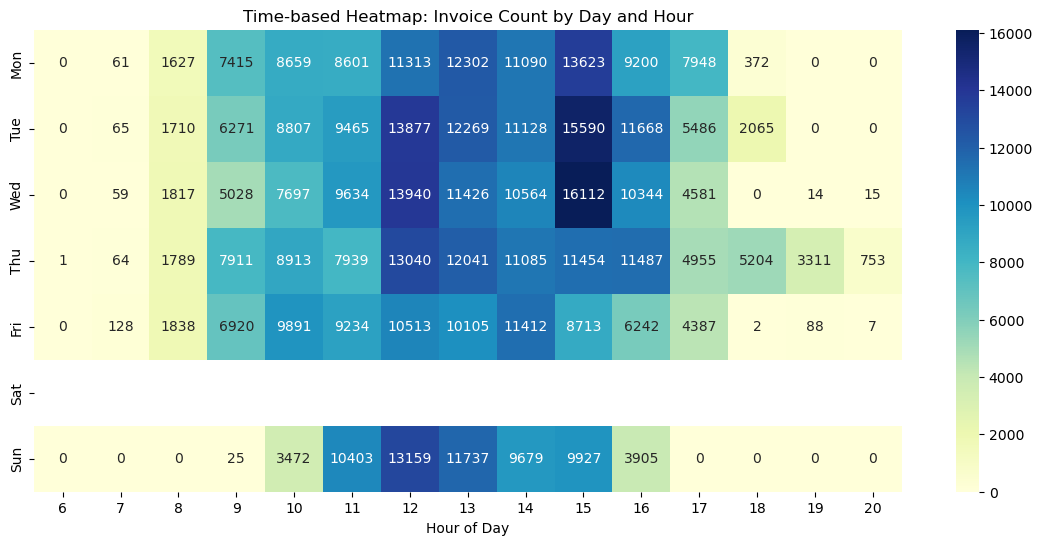

In [58]:
# Plot a heatmap to show what times of the week customers had the most interaction
# Map day numbers to names
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_zscore['DayOfWeek'] = df_zscore['DayOfWeek'].apply(lambda x: day_labels[x])

# Create pivot table: count of invoices per DayOfWeek and Hour
time_heatmap = df_zscore.pivot_table(index='DayOfWeek', columns='Hour', 
                                     values='InvoiceNo', aggfunc='count').fillna(0)

# Reorder days for visual clarity
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
time_heatmap = time_heatmap.reindex(day_order)

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(time_heatmap, cmap='YlGnBu', annot=True, fmt='.0f')

# Set titles and labels
plt.title('Time-based Heatmap: Invoice Count by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('')
plt.show()

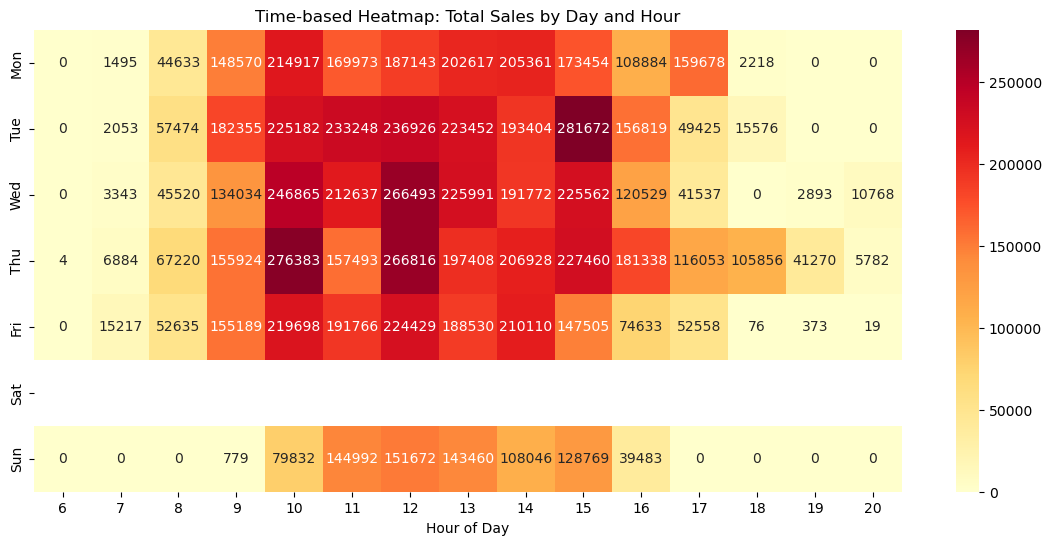

In [59]:
# Plot a heatmap to show what times of the week the highest amount of sales occurred
# Create pivot table: total sales per DayOfWeek and Hour
sales_heatmap = df_zscore.pivot_table(index='DayOfWeek', columns='Hour',
                                      values='TotalPrice', aggfunc='sum').fillna(0)

# Reorder days for visual clarity
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sales_heatmap = sales_heatmap.reindex(day_order)

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(sales_heatmap, cmap='YlOrRd', annot=True, fmt='.0f')

# Set titles and labels
plt.title('Time-based Heatmap: Total Sales by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('')
plt.show()

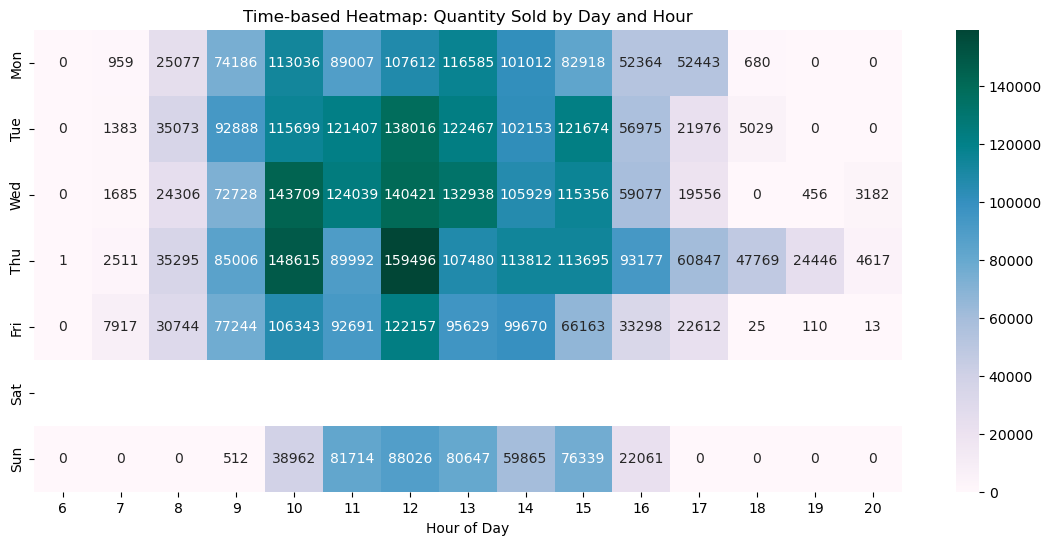

In [60]:
# Plot a heatmap to show what times of the week the number of products sold
#Create pivot table: total quantity sold per DayOfWeek and Hour
quantity_heatmap = df_zscore.pivot_table(index='DayOfWeek', columns='Hour',
                                         values='Quantity', aggfunc='sum').fillna(0)

# Reorder days for visual clarity
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
quantity_heatmap = quantity_heatmap.reindex(day_order)

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(quantity_heatmap, cmap='PuBuGn', annot=True, fmt='.0f')

# Set titles and labels
plt.title('Time-based Heatmap: Quantity Sold by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('')
plt.show()

<hr>
<div id="seasonal_holiday_trends_analysis"> 
    <h2>Seasonal & Holiday Trends Analysis</h2>    
</div>

#### 🧮 Season Extraction <a id="season_extraction"></a>

In [61]:
# Extract season (1=Winter, 2=Spring, etc.)
df_zscore['Season'] = df_zscore['InvoiceDate'].dt.month % 12 // 3 + 1

# Map numeric seasons to names
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
df_zscore['Season'] = df_zscore['Season'].map(season_map)

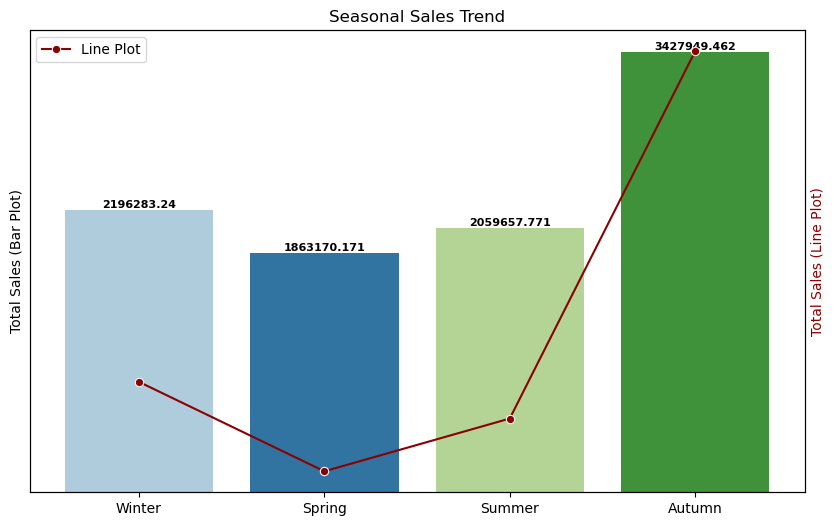

In [62]:
# Plot bar & line plots to find seasonal sales trend
# Calculate total sales for each season
season_sales = df_zscore.groupby('Season')['TotalPrice'].sum().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

# Plot combined barplot and lineplot
plt.figure(figsize=(10, 6))

# Plot the barplot
ax = sns.barplot(x=season_sales.index, y=season_sales.values, palette='Paired', label='Bar Plot')

# Plot the lineplot
ax2 = ax.twinx()
sns.lineplot(x=season_sales.index, y=season_sales.values, color='darkred', marker='o', ax=ax2, label='Line Plot')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', fontweight='bold')

# Set title and labels
ax.set_title('Seasonal Sales Trend')
ax.set_ylabel('Total Sales (Bar Plot)')
ax2.set_ylabel('Total Sales (Line Plot)', color='darkred')
ax.set_xlabel('')
ax.set_yticks([])
ax2.set_yticks([])
plt.show()

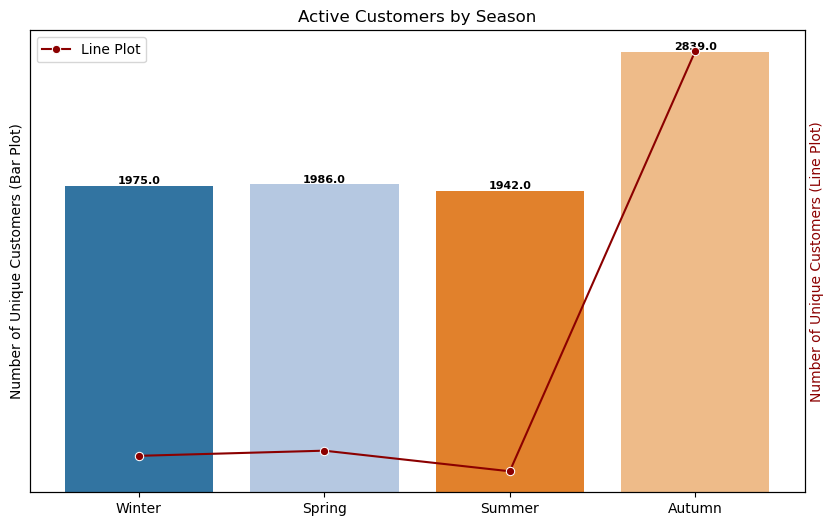

In [63]:
# Plot bar & line plots to find seasonal customer activity
# Count unique customers per season
active_customers = df_zscore.groupby('Season')['CustomerID'].nunique().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

# Plot combined barplot and lineplot
plt.figure(figsize=(10, 6))

# Plot the barplot
ax = sns.barplot(x=active_customers.index, y=active_customers.values, palette='tab20', label='Bar Plot')

# Plot the lineplot
ax2 = ax.twinx()
sns.lineplot(x=active_customers.index, y=active_customers.values, color='darkred', marker='o', ax=ax2, label='Line Plot')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', fontweight='bold')

# Set title and labels
ax.set_title('Active Customers by Season')
ax.set_ylabel('Number of Unique Customers (Bar Plot)')
ax2.set_ylabel('Number of Unique Customers (Line Plot)', color='darkred')
ax.set_xlabel('')
ax.set_yticks([])
ax2.set_yticks([])
plt.show()

#### 🧮 DayType Extraction <a id="daytype_extraction"></a>

In [64]:
# Extract date-only column for InvoiceDate
df_zscore['Date'] = df_zscore['InvoiceDate'].dt.date

# Identify weekends and weekdays
df_zscore['DayType'] = df_zscore['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Sat', 'Sun'] else 'Weekday')

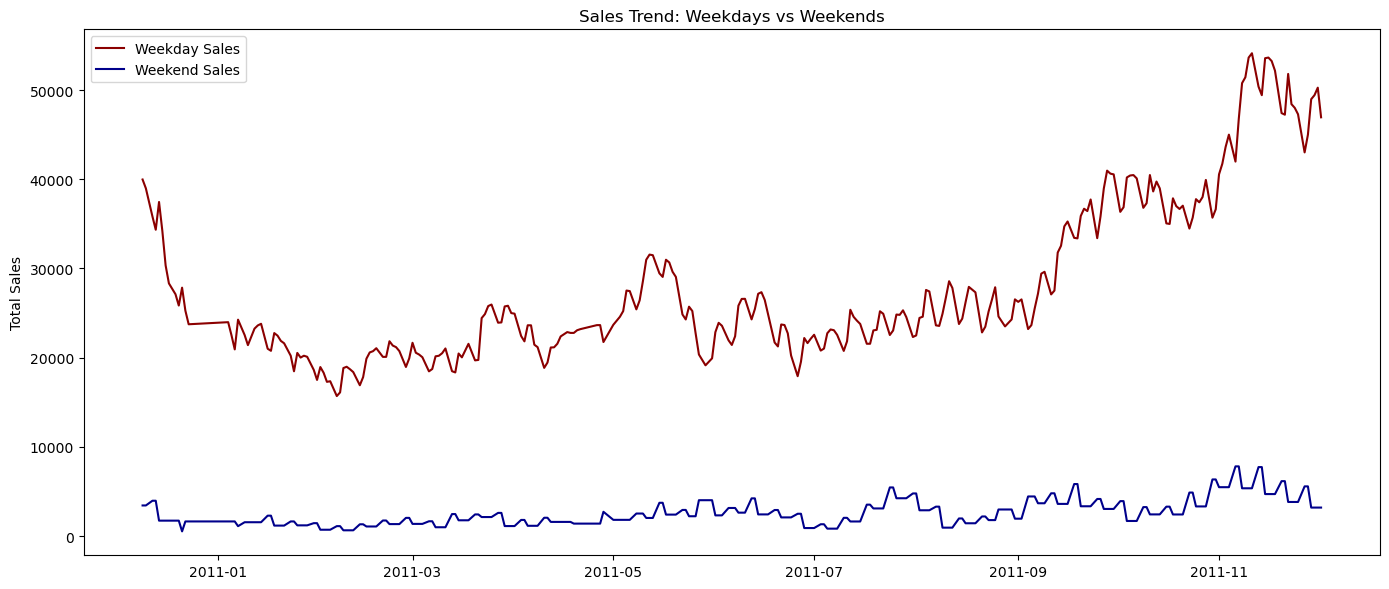

In [65]:
# Plot lines to compare between sales on weekends (Saturday, Sunday) and normal days (Weekdays)
# Aggregate daily sales by DayType
daily_sales = df_zscore.groupby(['Date', 'DayType'])['TotalPrice'].sum().reset_index()

# Create pivot table for easier plotting
pivot_df = daily_sales.pivot(index='Date', columns='DayType', values='TotalPrice')
pivot_df = pivot_df.fillna(0)

# Apply rolling average for smoothing
pivot_df['Weekday_Smoothed'] = pivot_df['Weekday'].rolling(window=14, center=True).mean()
pivot_df['Weekend_Smoothed'] = pivot_df['Weekend'].rolling(window=14, center=True).mean()

# Plot smoothed lines
plt.figure(figsize=(14,6))
plt.plot(pivot_df.index, pivot_df['Weekday_Smoothed'], label='Weekday Sales', color='darkred')
plt.plot(pivot_df.index, pivot_df['Weekend_Smoothed'], label='Weekend Sales', color='darkblue')

# Set title and labels
plt.title('Sales Trend: Weekdays vs Weekends')
plt.xlabel('')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()

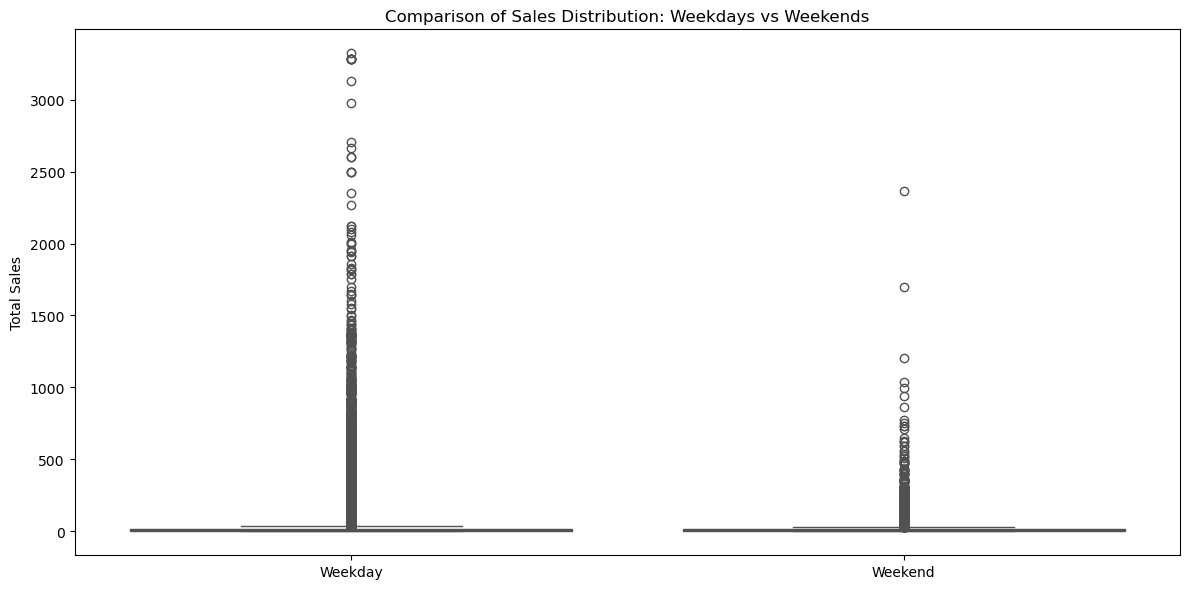

In [66]:
# Plot a boxplot to compare the sales distribution between weekdays and weekends
# Extract DayType and TotalPrice for boxplot
boxplot_data = df_zscore[['DayType', 'TotalPrice']]

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=boxplot_data, x='DayType', y='TotalPrice', palette=['#3498db', '#e74c3c'])

# Set title and labels
plt.title('Comparison of Sales Distribution: Weekdays vs Weekends')
plt.xlabel('')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

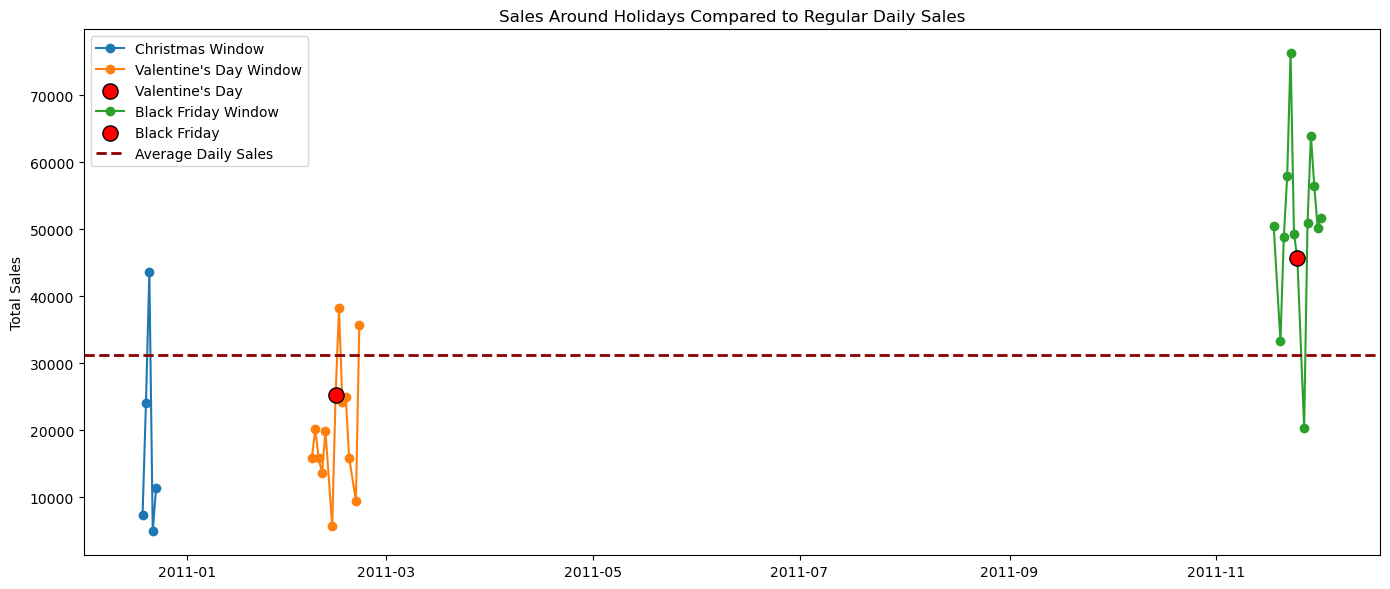

In [67]:
# Plot sales trends to find the effect of holidays on sales
# Define holiday dates
holiday_dates = {
    'Christmas': pd.to_datetime('2010-12-25'),
    'Valentine\'s Day': pd.to_datetime('2011-02-14'),
    'Black Friday': pd.to_datetime('2011-11-25')
}

# Group total sales by day
daily_sales = df_zscore.groupby('Date')['TotalPrice'].sum().reset_index()
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

# Calculate average daily sales (for all regular days)
avg_daily_sales = daily_sales['TotalPrice'].mean()

# Plot sales trends around holidays and compare with average
plt.figure(figsize=(14, 6))
for holiday_name, holiday_date in holiday_dates.items():
    window_start = holiday_date - pd.Timedelta(days=7)
    window_end = holiday_date + pd.Timedelta(days=7)

    sales_window = daily_sales[
        (daily_sales['Date'] >= window_start) &
        (daily_sales['Date'] <= window_end)
    ]

    plt.plot(sales_window['Date'],
             sales_window['TotalPrice'],
             marker='o',
             label=f"{holiday_name} Window")

    # Highlight the exact holiday point
    exact_point = sales_window[daily_sales['Date'] == holiday_date]
    if not exact_point.empty:
        plt.scatter(holiday_date,
                    exact_point['TotalPrice'].values[0],
                    color='red',
                    s=120,
                    edgecolors='black',
                    zorder=5,
                    label=f"{holiday_name}")

# Plot average daily sales as a horizontal line
plt.axhline(y=avg_daily_sales, color='darkred', linestyle='--', linewidth=2, label='Average Daily Sales')

# Set title and labels
plt.title('Sales Around Holidays Compared to Regular Daily Sales')
plt.xlabel('')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()

<hr>
<div id="feature_engineering"> 
    <h2>Feature Engineering</h2>    
</div>
<div>
    <ol>
        <li><a href="#create_features">Create New Features</a></li>
        <li><a href="#feature_encoding">Feature Encoding</a></li>          
        <li><a href="#feature_scaling">Feature Scaling</a></li>
    </ol>
</div>
<br>

<hr>
<div id="create_features"> 
    <h2>Create New Features</h2>    
</div>
<div>
    <ol>
        <li><a href="#total_price">Total Price Calculation</a></li>  
        <li><a href="#customer_behavior">Customer Behavior Analysis</a></li> 
        <li><a href="#product_popularity">Product Popularity Analysis</a></li>
        <li><a href="#time_based">Time-based Analysis</a></li>
        <li><a href="#locationbased_features">Location-Based Features</a></li>
        <li><a href="#lag_features">Lag Features</a></li>       
    </ol>
</div>
<br>

<div id="total_price"> 
    <h2>Total Price Calculation</h2>    
</div>

[Go to Total Price Calculation](#total_price)

<div id="customer_behavior"> 
    <h2>Customer Behavior Analysis</h2>    
</div>

In [68]:
# Customer-Level Features
# Aggregating customer data to extract relevant features
customer_features = df_zscore.groupby('CustomerID').agg(
    total_purchases=('InvoiceNo', 'nunique'),       # Number of unique purchases
    total_spent=('TotalPrice', 'sum'),              # Total money spent
    avg_spent_per_purchase=('TotalPrice', 'mean'),  # Average amount spent per purchase
    first_purchase_date=('InvoiceDate', 'min'),     # First purchase date
    last_purchase_date=('InvoiceDate', 'max'),      # Last purchase date
    unique_items_bought=('StockCode', 'nunique'),   # Number of unique items purchased
    avg_items_per_invoice=('Quantity', 'mean')      # Average number of items per invoice
).reset_index()

# Create purchase span (days between first and last purchase)
customer_features['purchase_span'] = (customer_features['last_purchase_date'] - customer_features['first_purchase_date']).dt.days

# Drop the first and last purchase date columns 
customer_features.drop(columns=['first_purchase_date', 'last_purchase_date'], inplace=True)

# Display the result
print("\nEnhanced Customer-Level Features:\n")
display(customer_features.head())


Enhanced Customer-Level Features:



CustomerID  total_purchases  total_spent  avg_spent_per_purchase  \
0    12346.0                0         0.00                     NaN   
1    12347.0                7      4310.00               23.681319   
2    12348.0                5      3150.16               15.366634   
3    12349.0                1      1457.55               20.243750   
4    12350.0                1       334.40               19.670588   

   unique_items_bought  avg_items_per_invoice  purchase_span  
0                    0                    NaN            NaN  
1                  103              13.505495          365.0  
2                  193              13.385366          282.0  
3                   72               8.750000            0.0  
4                   17              11.588235            0.0

<div id="product_popularity"> 
    <h2>Product Popularity Analysis</h2>    
</div>

In [69]:
# Product-Level Features
# Aggregating product data to extract sales-related insights
product_features = df_zscore.groupby('StockCode').agg(
    total_sales=('Quantity', 'sum'),                # Total quantity sold
    avg_price=('UnitPrice', 'mean'),                # Average price of product    
    revenue_generated=('TotalPrice', 'sum'),        # Total revenue generated by product
    avg_quantity_per_invoice=('Quantity', 'mean'),  # Average quantity sold per invoice
    purchase_count=('InvoiceNo', 'nunique'),        # Number of unique purchases
    unique_buyers=('CustomerID', 'nunique')         # Number of unique customers who bought the product
).reset_index()

# Display the output 
print("\nProduct-Level Features:\n")
display(product_features.head())


Product-Level Features:



StockCode  total_sales  avg_price  revenue_generated  \
0     10002          860   1.086620             759.89   
1     10080          303   0.410909             119.09   
2     10120          192   0.210000              40.32   
3     10125         1295   0.859785             993.99   
4     10133         2856   0.652551            1539.60   

   avg_quantity_per_invoice  purchase_count  unique_buyers  
0                 12.112676              71             59  
1                 13.772727              22             20  
2                  6.620690              29             25  
3                 13.924731              91             76  
4                 14.571429             196            159

<div id="time_based"> 
    <h2>Time-based Analysis</h2>    
</div>

[Go to Hour & DayOfWeek Extraction](#hourdayofweek_extraction)

[Go to Season Extraction](#season_extraction)

[Go to DayType (Weekdays and Weekends) Extraction](#daytype_extraction)

In [70]:
# Time-Based Features
# Aggregating time-based sales insights
time_features = df_zscore.groupby('DayOfWeek').agg(
    total_sales=('Quantity', 'sum'),              # Total quantity sold per day
    total_revenue=('TotalPrice', 'sum'),          # Total revenue per day
    transaction_count=('InvoiceNo', 'nunique'),   # Number of unique transactions per day
    avg_sales=('Quantity', 'mean'),               # Average quantity sold per invoice
    avg_revenue=('TotalPrice', 'mean'),           # Average revenue per transaction
    avg_price_per_item=('UnitPrice', 'mean')      # Average unit price per item sold
).reset_index()

# Display the output
print("\nTime-Based Features:\n")
display(time_features.head())


Time-Based Features:



DayOfWeek  total_sales  total_revenue  transaction_count  avg_sales  \
0       Fri       754616    1532737.741               3105   9.494414   
1       Mon       815879    1618942.111               3080   8.847957   
2       Sun       448126     797032.291               2201   7.192226   
3       Thu      1086759    2012818.540               4208  10.873353   
4       Tue       934740    1857585.291               3514   9.499294   

   avg_revenue  avg_price_per_item  
0    19.284571            3.459475  
1    17.556930            3.422698  
2    12.792018            2.805289  
3    20.138859            3.260589  
4    18.877707            3.470255

<div id="locationbased_features"> 
    <h2>Location-Based Features</h2>    
</div>

In [71]:
# Country-Level Aggregates
# Aggregating customer activity and sales metrics by country
location_features = df_zscore.groupby('Country').agg(
    total_orders=('InvoiceNo', 'nunique'),            # Number of unique orders from the country
    total_customers=('CustomerID', 'nunique'),        # Number of unique customers in the country
    total_quantity=('Quantity', 'sum'),               # Total number of items sold
    total_revenue=('TotalPrice', 'sum'),              # Total revenue from the country
    avg_order_value=('TotalPrice', 'mean'),           # Average value per order
    avg_items_per_order=('Quantity', 'mean')          # Average number of items per order
).reset_index()

# Display the output
print("\nLocation-Based Features:\n")
display(location_features.sort_values(by='total_revenue', ascending=False).head())


Location-Based Features:



Country  total_orders  total_customers  total_quantity  \
36  United Kingdom         17862             3991         4105975   
10            EIRE           284               22          143461   
24     Netherlands            90                9          187225   
14         Germany           452               94          118546   
13          France           386               90          110562   

    total_revenue  avg_order_value  avg_items_per_order  
36    7998822.104        16.705768             8.575446  
10     274810.660        34.923200            18.231160  
24     269869.380       115.033836            79.806053  
14     225100.070        24.966734            13.148403  
13     196690.270        23.465792            13.190408

<div id="lag_features"> 
    <h2>Lag Features</h2>    
</div>

In [72]:
# Create lag features for 'TotalPrice' to capture purchase patterns over time
df_zscore['TotalPrice_Lag1'] = df_zscore['TotalPrice'].shift(1)         # 1-day lag (moves the values down by 1 row)
df_zscore['TotalPrice_Lag7'] = df_zscore['TotalPrice'].shift(7)         # 1-week lag

* Handling Missing Values for Lag Features

In [73]:
# Since .shift() creates NaN values, must handle them:
df_zscore[['TotalPrice_Lag1', 'TotalPrice_Lag7']] = df_zscore[['TotalPrice_Lag1', 'TotalPrice_Lag7']].fillna(0)

In [74]:
# Display the output
display(df_zscore.head())

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country InvoiceMonth  \
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom   2010-12-01   
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom   2010-12-01   
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom   2010-12-01   
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom   2010-12-01   
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom   2010-12-01   

   TotalPrice InvoiceWeek CohortMonth  CohortIndex  Hour DayOfWeek  Season  \
0       15.30  2010-11-29  2010-12-01            1     8       Wed  Winter   
1       20.34  2010-11-29  2010-12-01            1     8       Wed  Winter   
2       22.00  2010-11-29  2010-12-01            1     8       Wed  Winter   
3       20.34  2010-11-29  2010-12-01            1     8       Wed  Winter   
4       20.34  2010-11-29  2010-12-01            1     8       Wed  Winter   

         Date  DayType  TotalPrice_Lag1  TotalPrice_Lag7  
0  2010-12-01  Weekday             0.00              0.0  
1  2010-12-01  Weekday            15.30              0.0  
2  2010-12-01  Weekday            20.34              0.0  
3  2010-12-01  Weekday            22.00              0.0  
4  2010-12-01  Weekday            20.34              0.0

<hr>
<div id="feature_encoding"> 
    <h2>Feature Encoding</h2>    
</div>
<div>
    <ol>
        <li><a href="#one_hot">One-hot Encoding</a></li>                      
    </ol>
</div>
<br>

<div id="one_hot"> 
    <h2>One-hot Encoding</h2>    
</div>

In [75]:
# Convert (encode) categorical features into numerical representations
# Create a copy of the original dataset for encoding
df_encoded = df_zscore.copy()

# Display the types of categorical columns to be encoded
print("Categorical columns to be encoded:")
print(df_encoded.select_dtypes(include=['category']).columns)

Categorical columns to be encoded:
Index(['StockCode', 'Description', 'CustomerID', 'Country'], dtype='object')


In [76]:
# Apply one-hot encoding to categorical columns
# Select low-cardinality categorical columns to one-hot encode
columns_to_encode = ['Country']

""" drop_first=True removes one dummy variable (binary 0/1 column) per categorical feature to
    avoid multicollinearity in linear models (e.g., Logistic Regression)"""  
# Perform one-hot encoding 
encoded_cols = pd.get_dummies(df_encoded[columns_to_encode], drop_first=True)

In [77]:
# Concatenate encoded columns with original dataset
df_encoded = pd.concat([df_encoded.drop(columns=columns_to_encode), encoded_cols], axis=1)

# Display the shape and first few rows of the encoded dataset
print(f"Encoded dataset shape: {df_encoded.shape}")
display(df_encoded.head())

Encoded dataset shape: (523577, 56)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID InvoiceMonth  TotalPrice  \
0 2010-12-01 08:26:00       2.55    17850.0   2010-12-01       15.30   
1 2010-12-01 08:26:00       3.39    17850.0   2010-12-01       20.34   
2 2010-12-01 08:26:00       2.75    17850.0   2010-12-01       22.00   
3 2010-12-01 08:26:00       3.39    17850.0   2010-12-01       20.34   
4 2010-12-01 08:26:00       3.39    17850.0   2010-12-01       20.34   

  InvoiceWeek  ... Country_RSA  Country_Saudi Arabia  Country_Singapore  \
0  2010-11-29  ...       False                 False              False   
1  2010-11-29  ...       False                 False              False   
2  2010-11-29  ...       False                 False              False   
3  2010-11-29  ...       False                 False              False   
4  2010-11-29  ...       False                 False              False   

  Country_Spain Country_Sweden Country_Switzerland Country_USA  \
0         False          False               False       False   
1         False          False               False       False   
2         False          False               False       False   
3         False          False               False       False   
4         False          False               False       False   

   Country_United Arab Emirates  Country_United Kingdom  Country_Unspecified  
0                         False                    True                False  
1                         False                    True                False  
2                         False                    True                False  
3                         False                    True                False  
4                         False                    True                False  

[5 rows x 56 columns]

<hr>
<div id="feature_scaling"> 
    <h2>Feature Scaling</h2>    
</div>
<div>
    <ol>
        <li><a href="#standard_scaling">Standard Scaling</a></li>                      
    </ol>
</div>
<br>

<div id="standard_scaling"> 
    <h2>Standard Scaling</h2>    
</div>

In [78]:
# Select only the numeric columns to scale
cols_to_scale = ['Quantity', 'UnitPrice', 'TotalPrice']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the selected numeric features (mean=0, std=1)
df_scaled_numeric = scaler.fit_transform(df_encoded[cols_to_scale])

In [79]:
# Convert back to DataFrame to keep column names
df_scaled_numeric = pd.DataFrame(df_scaled_numeric, columns=cols_to_scale, index=df_encoded.index)
display(df_scaled_numeric.head())

Quantity  UnitPrice  TotalPrice
0 -0.159691  -0.194779   -0.061114
1 -0.159691   0.020732    0.043857
2 -0.068911  -0.143467    0.078430
3 -0.159691   0.020732    0.043857
4 -0.159691   0.020732    0.043857

In [80]:
# Drop original unscaled columns and replace them with scaled versions
df_encoded_scaled = df_encoded.drop(columns=cols_to_scale).copy()
df_encoded_scaled[cols_to_scale] = df_scaled_numeric

# Display final shape and a preview of the scaled dataset
print(f"Final dataset shape after scaling: {df_encoded_scaled.shape}\n")
print("Preview of the final dataset:\n")
display(df_encoded_scaled.head())

Final dataset shape after scaling: (523577, 56)

Preview of the final dataset:



InvoiceNo StockCode                          Description  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1    536365     71053                  WHITE METAL LANTERN   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   

          InvoiceDate CustomerID InvoiceMonth InvoiceWeek CohortMonth  \
0 2010-12-01 08:26:00    17850.0   2010-12-01  2010-11-29  2010-12-01   
1 2010-12-01 08:26:00    17850.0   2010-12-01  2010-11-29  2010-12-01   
2 2010-12-01 08:26:00    17850.0   2010-12-01  2010-11-29  2010-12-01   
3 2010-12-01 08:26:00    17850.0   2010-12-01  2010-11-29  2010-12-01   
4 2010-12-01 08:26:00    17850.0   2010-12-01  2010-11-29  2010-12-01   

   CohortIndex  Hour  ... Country_Spain Country_Sweden Country_Switzerland  \
0            1     8  ...         False          False               False   
1            1     8  ...         False          False               False   
2            1     8  ...         False          False               False   
3            1     8  ...         False          False               False   
4            1     8  ...         False          False               False   

  Country_USA  Country_United Arab Emirates  Country_United Kingdom  \
0       False                         False                    True   
1       False                         False                    True   
2       False                         False                    True   
3       False                         False                    True   
4       False                         False                    True   

   Country_Unspecified  Quantity  UnitPrice  TotalPrice  
0                False -0.159691  -0.194779   -0.061114  
1                False -0.159691   0.020732    0.043857  
2                False -0.068911  -0.143467    0.078430  
3                False -0.159691   0.020732    0.043857  
4                False -0.159691   0.020732    0.043857  

[5 rows x 56 columns]

<hr>
<div id="segmentation_clustering"> 
    <h2>Segmentation and Clustering</h2>    
</div>
<div>
    <ol>
        <li><a href="#rfm">RFM Analysis</a></li>
        <li><a href="#rulebased_segmentation">Rule-Based Segmentation</a></li>
        <li><a href="#clustering">Clustering</a></li>           
    </ol>
</div>
<br>

<hr>
<div id="rfm"> 
    <h2>RFM Analysis</h2>    
</div>

In [81]:
# Create RFM metrics for customer segmentation:
# Set analysis reference date to one day after the latest transaction (e.g., max invoice date + 1 day)
analysis_date = df_zscore['InvoiceDate'].max() + pd.Timedelta(days=1)

# Filter only valid transactions:
df_valid = df_zscore[
    df_zscore['CustomerID'].notnull() &
    (df_zscore['Quantity'] > 0) &
    (df_zscore['UnitPrice'] > 0)
]

# Group by CustomerID to compute RFM metrics
rfm_data = df_valid.groupby('CustomerID').agg(    
    Recency=('InvoiceDate', lambda x: (analysis_date - x.max()).days),    # Recency: time since last purchase (in days)     
    Frequency=('InvoiceNo', 'nunique'),      # Frequency: total number of purchases    
    Monetary=('TotalPrice', 'sum')           # Monetary: total spent
).reset_index()

# Drop customers with no transactions (in case any remain with NaN values)
rfm_data = rfm_data.dropna().reset_index(drop=True)

# Display the final shape and a preview of the RFM table
print(f"Shape of RFM table: {rfm_data.shape}\n")
print("RFM Table (Recency, Frequency, Monetary):\n")
display(rfm_data.head())

Shape of RFM table: (4323, 4)

RFM Table (Recency, Frequency, Monetary):



CustomerID  Recency  Frequency  Monetary
0    12347.0      2.0          7   4310.00
1    12348.0     75.0          5   3150.16
2    12349.0     19.0          1   1457.55
3    12350.0    310.0          1    334.40
4    12352.0     36.0          8   3244.95

---

> **Anderson-Darling Test**

  - **Purpose:**
    - To test whether a given feature follows a specific distribution (commonly normal).

  - **How it works:**
    - It compares the empirical cumulative distribution of the data to the expected cumulative distribution. 
      - Null Hypothesis (H0): The data follows a normal distribution.
      - Alternative Hypothesis (H1): The data does not follow a normal distribution.


  - **Interpretation:**
    - If the **test statistic is small** and **critical values are not exceeded**, the data **follows** the tested distribution.  
    - If the **test statistic is larger** than the critical value at a significance level (e.g., 5%), the null hypothesis is rejected → the data **does not follow** the distribution.
>> - p-value < 0.05 → Not normal
>> - p-value ≥ 0.05 → Normal


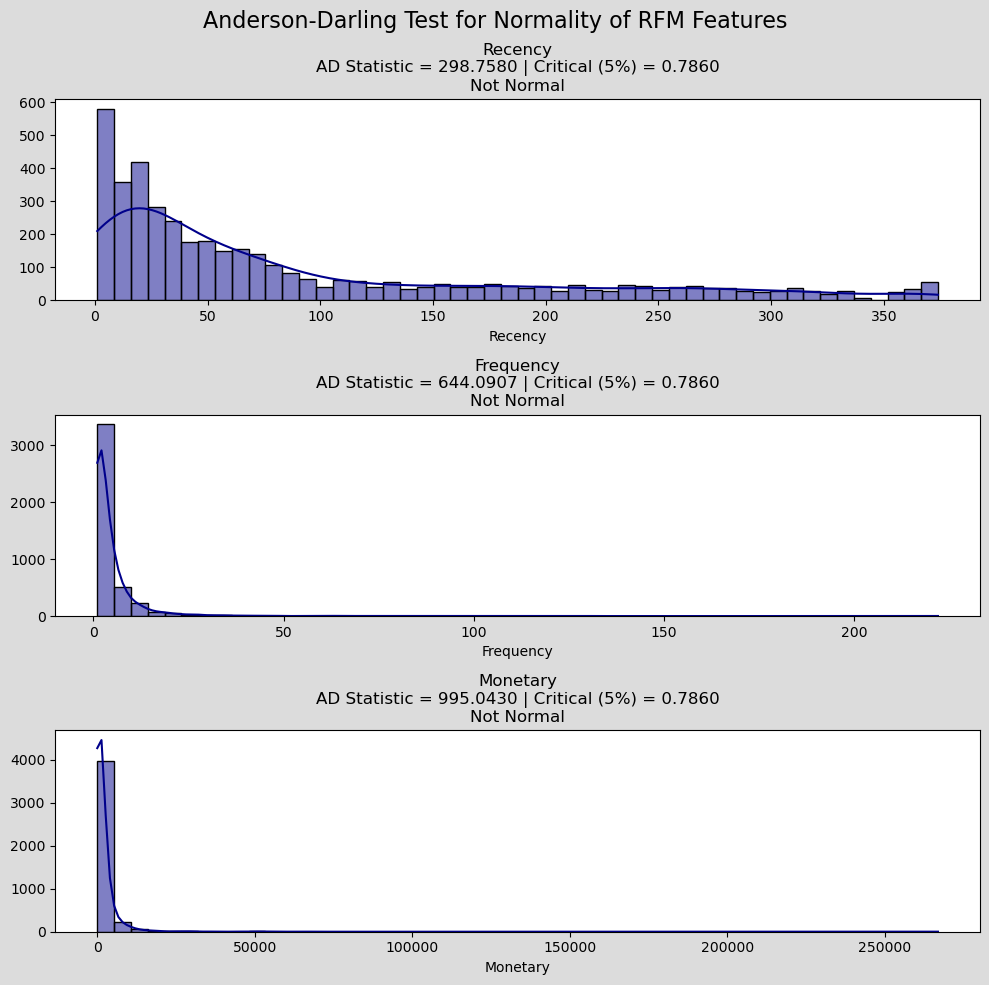

In [82]:
# Plot distribution charts to check for skewness using Anderson-Darling test
# Set figure size and style
plt.figure(figsize=(10, 10), facecolor='gainsboro')
plt.suptitle('Anderson-Darling Test for Normality of RFM Features', fontsize=16)

rfm_features = ['Recency', 'Frequency', 'Monetary']

for i, feature in enumerate(rfm_features):
    plt.subplot(3, 1, i + 1)
    
    # Plot Histogram + KDE
    sns.histplot(rfm_data[feature], kde=True, bins=50, color='darkblue')
    
    # Anderson-Darling test
    result = anderson(rfm_data[feature], dist='norm')
    
    # Display test statistic and critical value for 5% significance
    ad_stat = result.statistic
    crit_val_5 = result.critical_values[result.significance_level.tolist().index(5.0)]
    
    # Set title and labels
    plt.title(
        f"{feature.capitalize()}\n"
        f"AD Statistic = {ad_stat:.4f} | Critical (5%) = {crit_val_5:.4f}\n"
        f"{'Not Normal' if ad_stat > crit_val_5 else 'Probably Normal'}"
    )
    plt.xlabel(feature.capitalize())
    plt.ylabel("")
    plt.grid(False)
plt.tight_layout()
plt.show()

<hr>
<div id="rulebased_segmentation"> 
    <h2>Rule-Based Segmentation</h2>    
</div>
<div>
    <ol>
        <li><a href="#rank_recency">Rank Recency</a></li>
        <li><a href="#rank_frequency">Rank Frequency</a></li>
        <li><a href="#rank_monetary">Rank Monetary</a></li> 
        <li><a href="#customer_segmentation">Customer Segmentation</h2> 
        <li><a href="#esa">Exploratory Segment Analysis</h2>   
</a></li>                    
    </ol>
</div>
<br>

<div id="rank_recency"> 
    <h2>Rank Recency</h2>    
</div>

In [83]:
# Rank Recency (lower is better)
rfm_data['recency_rank'] = rfm_data['Recency'].rank(method='min', ascending=False, pct=True)
rfm_data['recency_score'] = pd.cut(rfm_data['recency_rank'],
                                     bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                                     labels=['1','2','3','4','5'],
                                     right = True)

<div id="rank_frequency"> 
    <h2>Rank Frequency</h2>    
</div>

In [84]:
# Rank Frequency (higher is better)
rfm_data['frequency_rank'] = rfm_data['Frequency'].rank(method='min', ascending=True, pct=True)
rfm_data['frequency_score'] = pd.cut(rfm_data['frequency_rank'],
                                       bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                                       labels=['1', '2', '3', '4', '5'],
                                       right = True)

<div id="rank_monetary"> 
    <h2>Rank Monetary</h2>    
</div>

In [85]:
# Rank Monetary (higher is better)
rfm_data['monetary_rank'] = rfm_data['Monetary'].rank(method='min', ascending=True, pct=True)
rfm_data['monetary_score'] = pd.cut(rfm_data['monetary_rank'],
                                      bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                                      labels=['1', '2', '3', '4', '5'],
                                      right = True)

In [86]:
# Convert to string for later concatenation
score_columns = ['recency_score', 'frequency_score', 'monetary_score']
rfm_data[score_columns] = rfm_data[score_columns].astype(str)

# Create a combined score 
rfm_data['rfm_score'] = rfm_data['recency_score'] + rfm_data['frequency_score'] + rfm_data['monetary_score']
                          
# Display preview
display(rfm_data.head())

CustomerID  Recency  Frequency  Monetary  recency_rank recency_score  \
0    12347.0      2.0          7   4310.00      0.959288             5   
1    12348.0     75.0          5   3150.16      0.378672             2   
2    12349.0     19.0          1   1457.55      0.726116             4   
3    12350.0    310.0          1    334.40      0.052047             1   
4    12352.0     36.0          8   3244.95      0.575758             3   

   frequency_rank frequency_score  monetary_rank monetary_score rfm_score  
0        0.818644               5       0.895906              5       555  
1        0.718714               4       0.849410              5       245  
2        0.000231               1       0.689799              4       414  
3        0.000231               1       0.285219              2       112  
4        0.853805               5       0.853343              5       355

<div id="customer_segmentation"> 
    <h2>Customer Segmentation</h2>    
</div>

> **Classify customers based on the individual recency, frequency and monetary scores**.

| Segment            | Description                                                 |  
|--------------------|-------------------------------------------------------------|  
| Champions          | Bought recently, buy often and spend the most               |  
| Loyal Customers     | Spend good money. Responsive to promotions                  |  
| Potential Loyalist | Recent customers, spent good amount, bought more than once  |  
| New Customers      | Bought more recently, but not often                         |  
| Promising          | Recent shoppers, but haven’t spent much                     |  
| Need Attention     | Above average recency, frequency & monetary values           |  
| About To Sleep     | Below average recency, frequency & monetary values           |  
| At Risk            | Spent big money, purchased often but long time ago          |  
| Can’t Lose Them    | Made big purchases and often, but long time ago             |  
| Hibernating        | Low spenders, low frequency, purchased long time ago        |  

In [87]:
# Create segmentation function using RFM scores
seg_map = {
    r'[4-5][4-5][4-5]': 'Champions',
    r'[4-5][3-5][3-5]': 'Loyal Customers',
    r'[3-5][3-5][1-5]': 'Potential Loyalist',
    r'[4-5][1-2][1-3]': 'New Customers', 
    r'[3-5][1-2][4-5]': 'Promising',
    r'[3-4][1-3][1-3]': 'Need Attention',
    r'[1-2][1-3][1-3]': 'About To Sleep',
    r'[1-2][1-5][1-5]': 'At Risk', 
    r'[1-3][4-5][4-5]': 'Can\'t Lose Them',
    r'[1-2][1-2][1-2]': 'Hibernating'  
}

# Assign each customer to a segment
rfm_data['Segment'] = rfm_data['rfm_score'].replace(seg_map, regex=True)

In [88]:
# View segments
rfm_final = rfm_data[['CustomerID','Recency','Frequency','Monetary','rfm_score', 'Segment']].copy()
display(rfm_final.head())

CustomerID  Recency  Frequency  Monetary rfm_score             Segment
0    12347.0      2.0          7   4310.00       555           Champions
1    12348.0     75.0          5   3150.16       245             At Risk
2    12349.0     19.0          1   1457.55       414           Promising
3    12350.0    310.0          1    334.40       112      About To Sleep
4    12352.0     36.0          8   3244.95       355  Potential Loyalist

<div id="esa"> 
    <h2>Exploratory Segment Analysis</h2>    
</div>

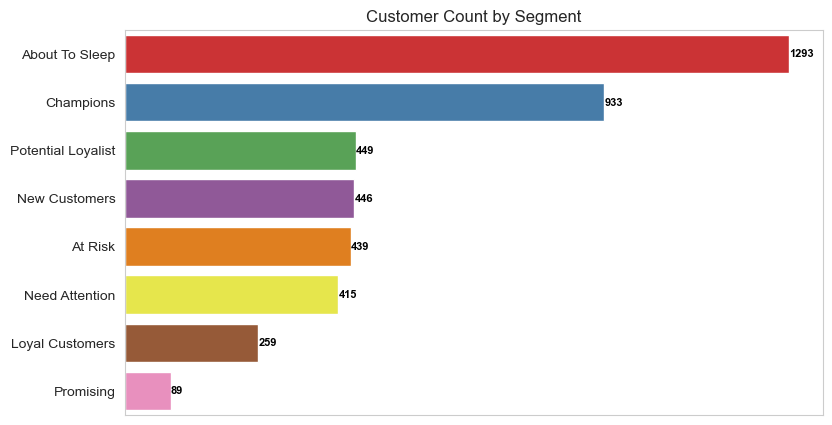

In [89]:
# Plot a countplot to show the number of customers in each segment
# Set figure size and style
plt.figure(figsize=(9, 5))
sns.set_style('whitegrid')

# Create countplot
ax = sns.countplot(data=rfm_final, y='Segment',
              order=rfm_final['Segment'].value_counts(ascending=False).index,
              palette='Set1')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=8, color='black', fontweight='bold')

# Set title and labels
plt.title('Customer Count by Segment')  
plt.xlabel('')
plt.ylabel('')
ax.set_xticks([])
plt.show()

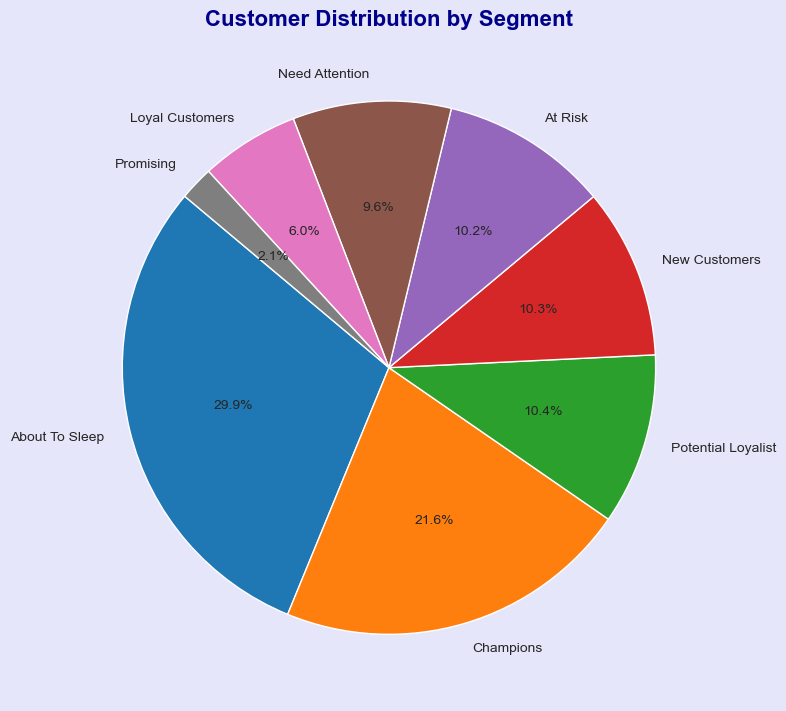

In [90]:
# Plot a pie chart to show the customer share per segment
# Pie chart of segment share 
segment_counts = rfm_final['Segment'].value_counts()
plt.figure(figsize=(8, 8), facecolor='lavender')
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('tab10'))

# Add labels and title
plt.title('Customer Distribution by Segment', color='darkblue', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

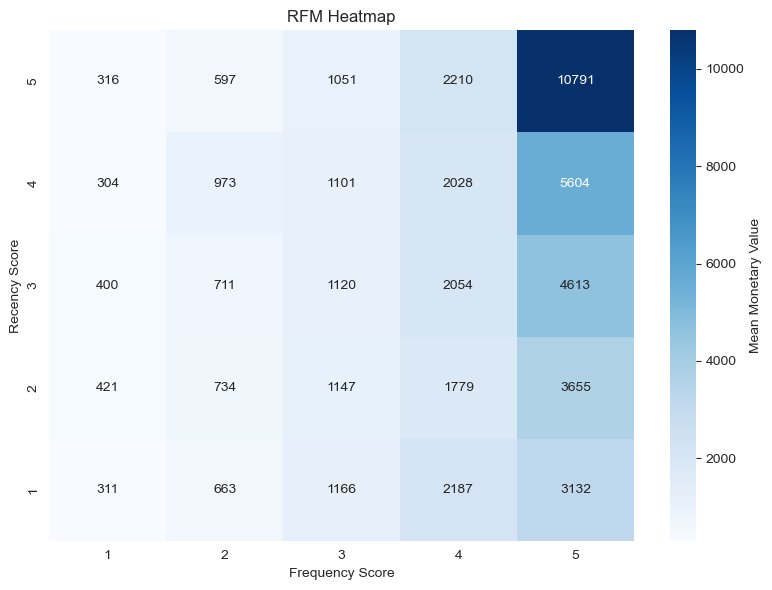

In [91]:
# Plot a heatmap to show the average monetary value for different categories of recency and frequency scores
# Create a pivot table
rfm_heatmap = rfm_data.pivot_table(
    index='recency_score',
    columns='frequency_score',
    values='Monetary',
    aggfunc='mean'
)

# Sort index to reverse the y-axis order
rfm_heatmap = rfm_heatmap.sort_index(ascending=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    rfm_heatmap,
    cmap="Blues",
    annot=True,
    fmt=".0f",
    cbar_kws={'label': 'Mean Monetary Value'}         # Label for the colorbar
)

# Set title and labels
plt.title("RFM Heatmap")
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")
ax.invert_yaxis()                # Reverse the y-axis so Recency goes from 1 to 5
plt.tight_layout()
plt.show()


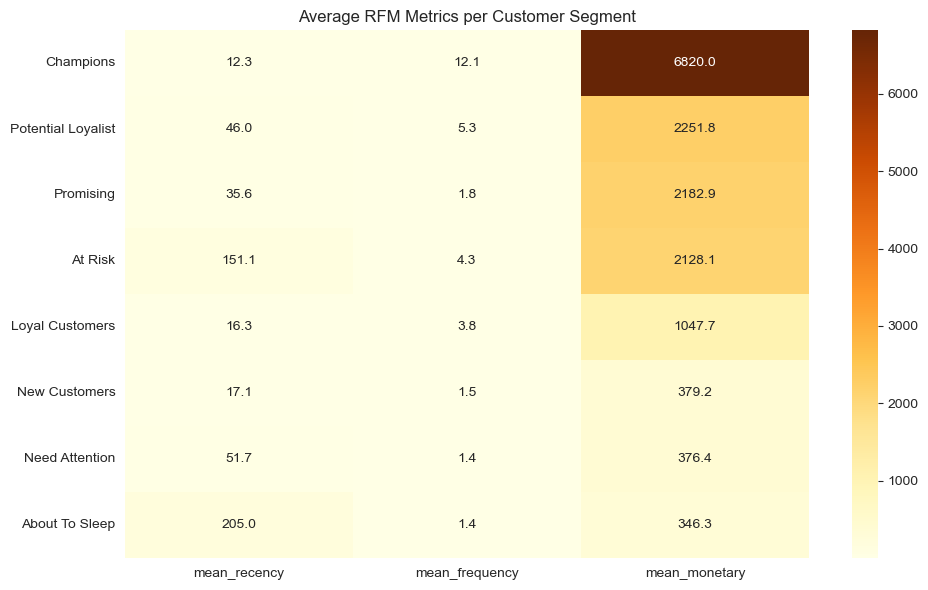

In [92]:
# plot a heatmap with recency, frequency, and monetary 
# Group by segment and compute average of R, F, M 
rfm_heatmap_data = rfm_final.groupby('Segment').agg(
    mean_recency=('Recency', 'mean'),         # Average number of days since last purchase
    mean_frequency=('Frequency', 'mean'),     # Average number of purchases per customer
    mean_monetary=('Monetary', 'mean')        # Average spending per customer in the segment    
).round(1)

# Sort segments by monetary descending
rfm_heatmap_data = rfm_heatmap_data.sort_values(by='mean_monetary', ascending=False)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(rfm_heatmap_data, annot=True, fmt=".1f", cmap="YlOrBr")

# Set titles and labels
plt.title("Average RFM Metrics per Customer Segment")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

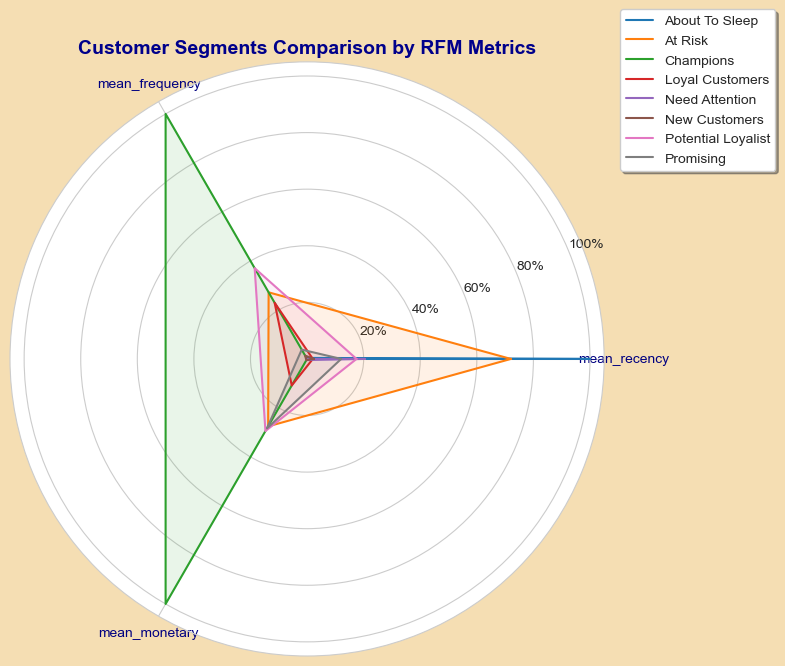

In [93]:
# Plot a radar chart for RFM per segment
# Group by segment and compute average of R, F, M
rfm_radar_data = rfm_final.groupby('Segment').agg(
    mean_recency=('Recency', 'mean'),         # Average number of days since last purchase
    mean_frequency=('Frequency', 'mean'),     # Average number of purchases per customer
    mean_monetary=('Monetary', 'mean')        # Average spending per customer in the segment
)

# Normalize data (min-max normalization)
rfm_normalized = (rfm_radar_data - rfm_radar_data.min()) / (rfm_radar_data.max() - rfm_radar_data.min())

# Setup radar chart
labels = rfm_normalized.columns.tolist()
num_vars = len(labels)

# Compute angles for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]            # Complete the loop

# Plot for each segment
plt.figure(figsize=(8, 8), facecolor='wheat')
for idx, row in rfm_normalized.iterrows():
    values = row.tolist()
    values += values[:1]        # Close the loop
    plt.polar(angles, values, label=idx, linewidth=1.5)
    plt.fill(angles, values, alpha=0.1)

# Set titles and labels
plt.title('Customer Segments Comparison by RFM Metrics', color='darkblue', fontsize=14, fontweight='bold')
plt.xticks(angles[:-1], labels, color='navy', fontsize=10)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["20%", "40%", "60%", "80%", "100%"])
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), frameon=True, shadow=True)
plt.tight_layout()
plt.show()

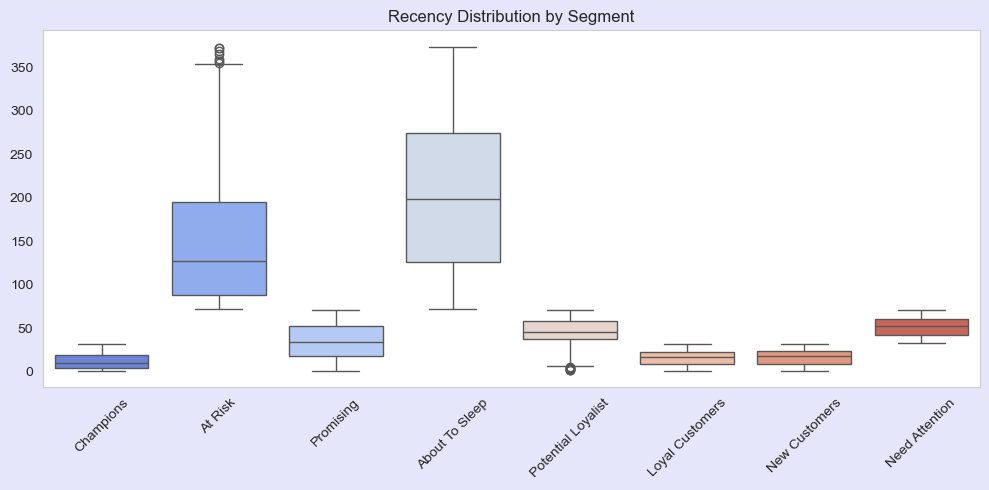

In [94]:
# Plot a boxplot to show the recency distribution by segment
# Boxplot: Recency by Segment
plt.figure(figsize=(10, 5), facecolor='lavender')
sns.boxplot(data=rfm_final, x='Segment', y='Recency', palette='coolwarm')

# Set titles and labels
plt.title('Recency Distribution by Segment')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

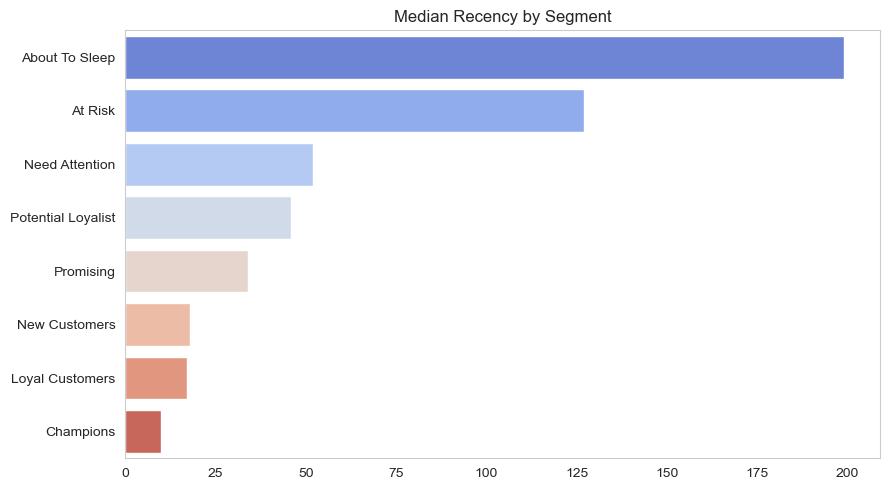

In [95]:
# Plot a barplot to show the median recency for different customer segments
# Calculate the median recency for each segment
median_recency = rfm_final.groupby('Segment')['Recency'].median().reset_index()

# Order segments from highest to lowest median
ordered_segments = median_recency.sort_values(by='Recency', ascending=False)['Segment']

# Plot horizontal barplot
plt.figure(figsize=(9, 5))
sns.barplot(data=median_recency, x='Recency', y='Segment', order=ordered_segments, palette='coolwarm')

# Set titles and labels
plt.title('Median Recency by Segment')
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
plt.tight_layout()
plt.show()

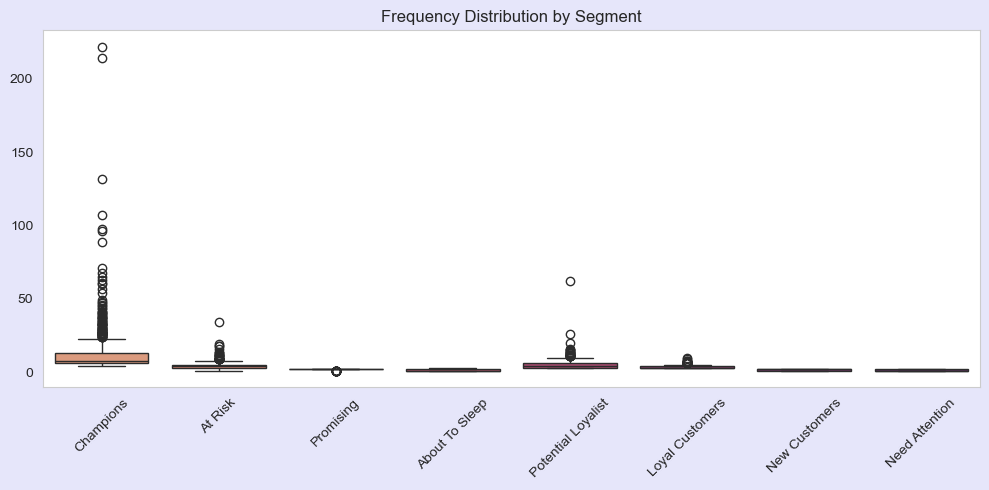

In [96]:
# Plot a boxplot to show the frequency distribution by segment
# Boxplot: Frequency by Segment
plt.figure(figsize=(10, 5), facecolor='lavender')
sns.boxplot(data=rfm_final, x='Segment', y='Frequency', palette='flare')

# Set titles and labels
plt.title('Frequency Distribution by Segment')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

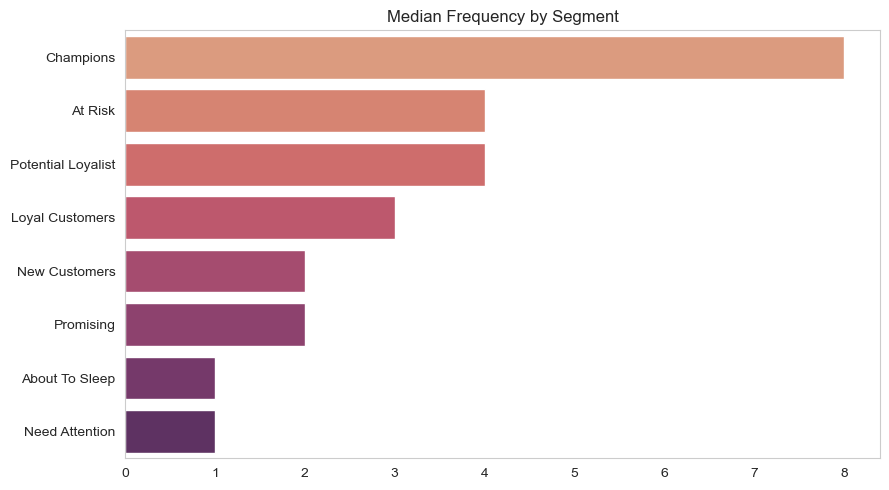

In [97]:
# Plot a barplot to show the median frequency for different customer segments
# Calculate the median frequency for each segment
median_frequency = rfm_final.groupby('Segment')['Frequency'].median().reset_index()

# Order segments from highest to lowest median
ordered_segments = median_frequency.sort_values(by='Frequency', ascending=False)['Segment']

# Plot horizontal barplot
plt.figure(figsize=(9, 5))
sns.barplot(data=median_frequency, x='Frequency', y='Segment', order=ordered_segments, palette='flare')

# Set titles and labels
plt.title('Median Frequency by Segment')
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
plt.tight_layout()
plt.show()

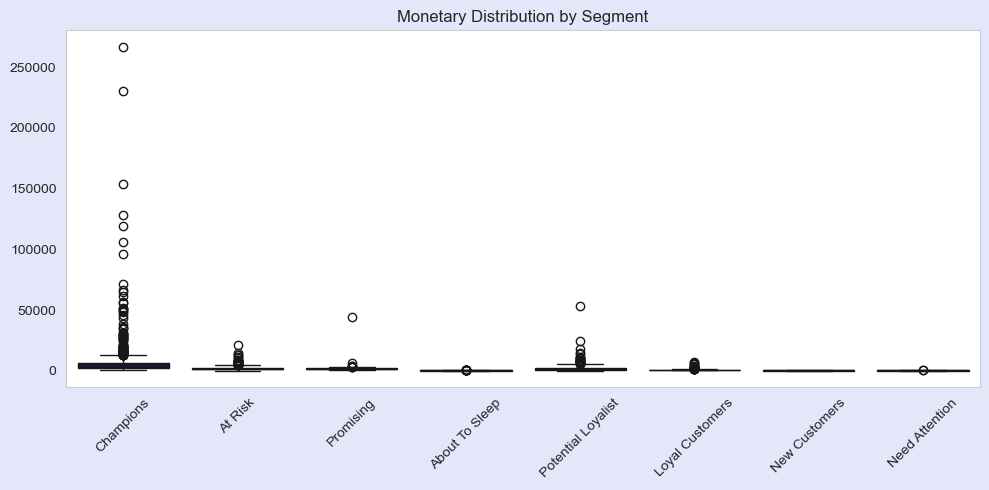

In [98]:
# Plot a boxplot to show the distribution of monetary value by segment
# Boxplot: Monetary by Segment
plt.figure(figsize=(10, 5), facecolor='lavender')
sns.boxplot(data=rfm_final, x='Segment', y='Monetary', palette='magma')

# Set titles and labels
plt.title('Monetary Distribution by Segment')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

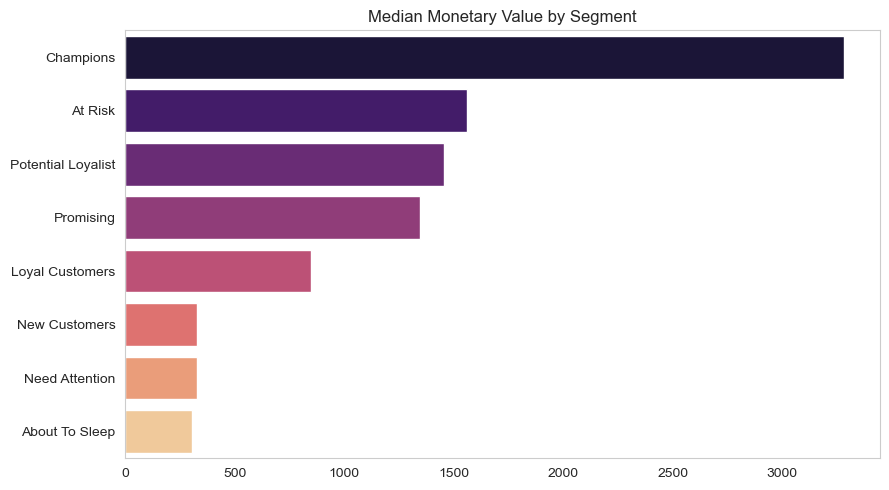

In [99]:
# Plot a barplot to show the median amount of customer spending in each segment
# Calculate the median monetary value for each segment
median_monetary = rfm_final.groupby('Segment')['Monetary'].median().reset_index()

# Order segments from highest to lowest median
ordered_segments = median_monetary.sort_values(by='Monetary', ascending=False)['Segment']

# Plot horizontal barplot
plt.figure(figsize=(9, 5))
sns.barplot(data=median_monetary, x='Monetary', y='Segment', order=ordered_segments, palette='magma')

# Set titles and labels
plt.title('Median Monetary Value by Segment')
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
plt.tight_layout()
plt.show()

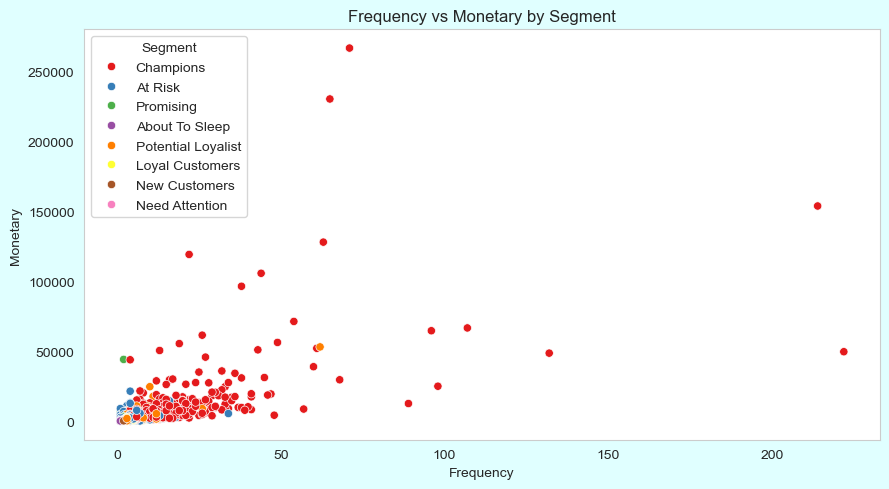

In [100]:
# Plot a scatterplot to show the relationship between frequency & monetary by segment
# Scatter plot: Frequency vs Monetary by Segment
plt.figure(figsize=(9, 5), facecolor='lightcyan')
sns.scatterplot(data=rfm_final, x='Frequency', y='Monetary', hue='Segment', palette='Set1')

# Set titles and labels
plt.title('Frequency vs Monetary by Segment')
plt.grid(False)
plt.tight_layout()
plt.show()

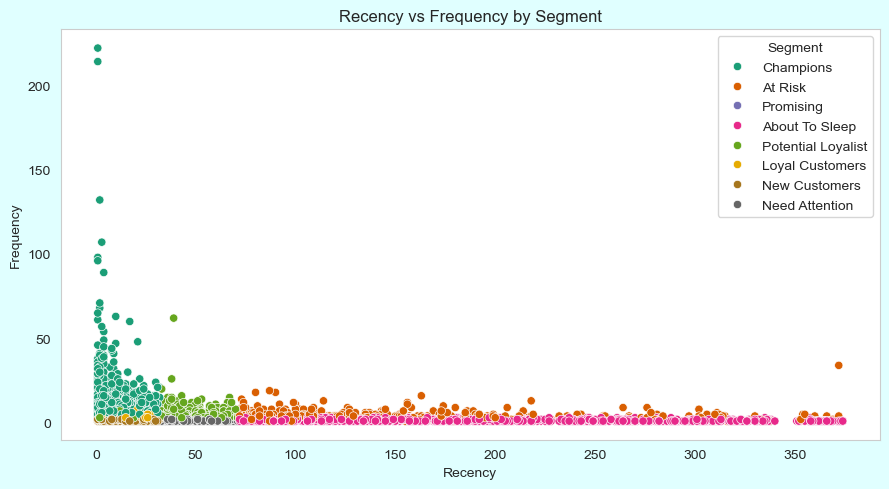

In [101]:
# Plot a scatterplot to show the relationship between recency & frequency by segment
# Scatter plot: Recency vs Frequency by Segment
plt.figure(figsize=(9, 5), facecolor='lightcyan')
sns.scatterplot(data=rfm_final, x='Recency', y='Frequency', hue= 'Segment', palette='Dark2')

# Set titles and labels
plt.title('Recency vs Frequency by Segment')
plt.grid(False)
plt.tight_layout()
plt.show()

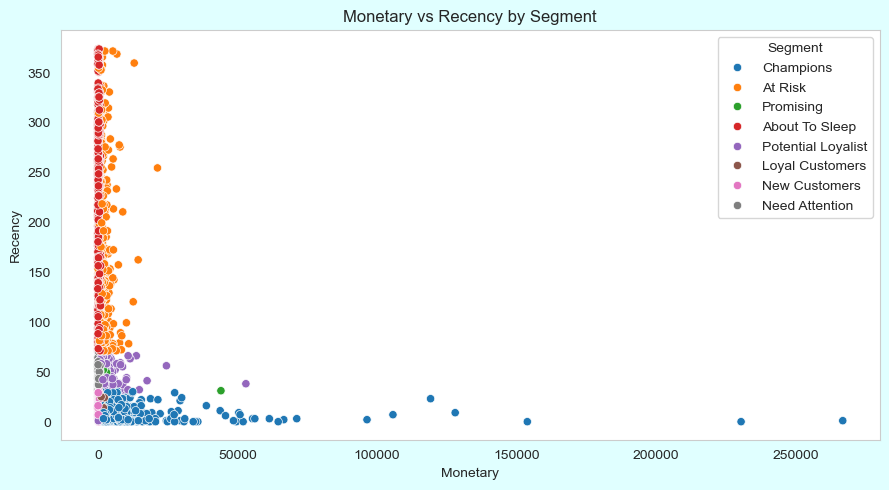

In [102]:
# Plot a scatterplot to show the relationship between monetary & recency by segment
# Scatter plot: Monetary vs Recency by Segment
plt.figure(figsize=(9, 5), facecolor='lightcyan')
sns.scatterplot(data=rfm_final, x='Monetary', y='Recency', hue= 'Segment', palette='tab10')

# Set titles and labels
plt.title('Monetary vs Recency by Segment')
plt.grid(False)
plt.tight_layout()
plt.show()

In [103]:
# plot a treemap to compare the sales share and number of customers in each segment
# Aggregate metrics by segment
rfm_agg = rfm_final.groupby('Segment').agg(    
    sum_monetary=('Monetary', 'sum'),       # Total amount of money spent by all customers in the segment  
    count_segment=('Monetary', 'count')     # Number of customers in each segment
).reset_index()

# Calculate the percentage of customers in each segment relative to the total customer count
rfm_agg['customer_percent'] = rfm_agg['count_segment'] / rfm_agg['count_segment'].sum()
# Calculate the percentage of sales in each segment relative to the total sales amount
rfm_agg['sales_percent'] = rfm_agg['sum_monetary'] / rfm_agg['sum_monetary'].sum()

# Format percentages for better display
rfm_agg['customer_percent'] = rfm_agg['customer_percent'].apply(lambda x: f"{x:.0%}")
rfm_agg['sales_percent'] = rfm_agg['sales_percent'].apply(lambda x: f"{x:.0%}")

# Display treemap
fig = px.treemap(
    data_frame=rfm_agg,
    names='Segment',
    values='sum_monetary',            # Size by total sales
    parents=['RFM'] * len(rfm_agg),   # Single root node
    hover_data=['customer_percent', 'sales_percent'],      # Extra info on hover
    title="Treemap of Customer Segments by Total Sales",
    color='Segment'
)

# Update layout 
fig.update_layout(
    title_font=dict(size=24, family='Arial, bold', color='darkslategray'),
    font=dict(size=16, family='Verdana, bold'),
    paper_bgcolor='lightcyan'
)

# Show the treemap
fig.show()

<hr>
<div id="clustering"> 
    <h2>Clustering</h2>    
</div>
<div>
    <ol>
        <li><a href="#scaling">Feature Scaling</a></li> 
        <li><a href="#kmeans">KMeans</a></li> 
</a></li>                    
    </ol>
</div>
<br>

<hr>
<div id="scaling"> 
    <h2>Feature Scaling</h2>    
</div>

In [104]:
# Standard scaling
# Select only the numeric RFM scores
rfm_scores  = rfm_data[['recency_score', 'frequency_score', 'monetary_score']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numeric features (mean=0, std=1)
rfm_scaled = scaler.fit_transform(rfm_scores)

In [105]:
# Convert the scaled data to a DataFrame with original column names
rfm_scaled = pd.DataFrame(rfm_scaled, columns=rfm_scores.columns)

# Show the head of the scaled data
display(rfm_scaled.head())

recency_score  frequency_score  monetary_score
0       1.421607         1.498548        1.413887
1      -0.704410         0.845172        1.413887
2       0.712934        -1.114956        0.706780
3      -1.413082        -1.114956       -0.707434
4       0.004262         1.498548        1.413887

<hr>
<div id="kmeans"> 
    <h2>KMeans</h2>    
</div>
<div>
    <ol>
        <li><a href="#Optimal">Optimal Cluster Selection</a></li>          
        <li><a href="#model_building">Model Building</a></li>
        <li><a href="#analysis_visualization">Cluster Analysis & Visualization</a></li>
</a></li>                    
    </ol>
</div>
<br>

> **K-Means Clustering**

- **Unsupervised learning algorithm** used for grouping data into **k distinct clusters** based on feature similarity.
    - The algorithm works by:
        1. **Initializing** k random centroids.
        2. **Assigning** each data point to the nearest centroid (forming clusters).
        3. **Recalculating** centroids as the mean of assigned points.
        4. **Repeating** steps 2–3 until convergence (centroids no longer change significantly).
    - Objective: **Minimize Within-Cluster Sum of Squares (WCSS)** → compact and distinct clusters.

- **Interpretation:**

    - Choose the **optimal k** by methods like:
        - **Elbow Method** → check where WCSS stops decreasing sharply.
        - **Silhouette Score** → evaluates how well-separated clusters are.

>> K-Means assumes spherical, equally-sized clusters. It may not work well with irregular cluster shapes or outliers.

<div id="Optimal"> 
    <h2>Optimal Cluster Selection</h2>    
</div>

> **Elbow Method**

It is a technique used for determining the optimal number of clusters in a clustering algorithm.

- **How it works:**

 1. **Clustering:** Run the clustering algorithm on your dataset for a range of different values of k (the number of clusters).
 2. **Calculate Distortion:** For each k, calculate a metric known as distortion (often the **within-cluster sum of squares**), which measures how tightly the clusters are packed together. A lower distortion indicates more compact clusters.
 3. **Plotting:** Plot the distortion against the number of clusters.

---

- **Within-Cluster Sum of Squares (WCSS) method:**

It is a metric used to evaluate the compactness of clusters formed by a clustering algorithm
 1. WCSS measures the total variance **within each cluster**.
 2. It calculates the sum of squared distances between each point and its cluster centroid.
 3. Lower WCSS means tighter (more compact) clusters.      
>> Look for the "elbow point" where the WCSS starts to decrease slowly.

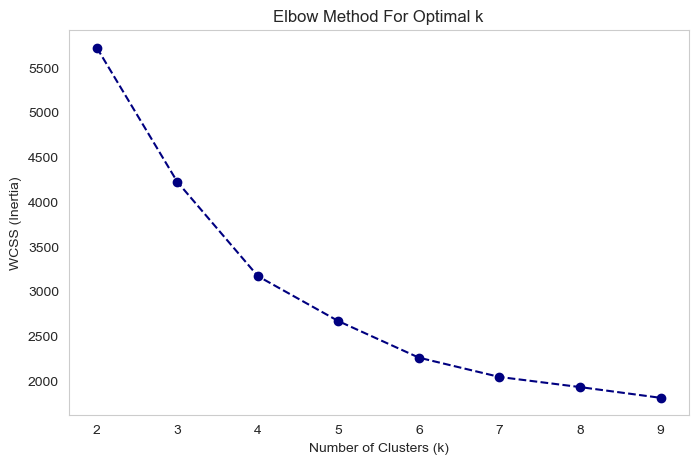

In [106]:
# Elbow method to find the optimal number of clusters
wcss = []        # Within-cluster sum of squares

# Test K from 2 to 9
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='--', color='navy')

# Set titles and labels
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(2, 10))
plt.grid(False)
plt.show()

> **Silhouette Score**  

- Measures **how well each data point fits within its cluster** compared to other clusters.
- Score ranges from **-1 to 1**:
  - **+1** → well-clustered
  - **0** → on the boundary
  - **-1** → probably in the wrong cluster
- Higher average silhouette score indicates better-defined and more meaningful clusters.
>> Helps evaluate the **optimal number of clusters**.

In [107]:
# Use Silhouette Score to evaluate the quality of clustering
# List to store results
kmeans_score = []

# Algorithms supported by KMeans
algorithms = ['lloyd', 'elkan']

# Loop through different numbers of clusters and algorithms
for i in range(2, 10):  # Testing cluster numbers from 2 to 9
    for algo in algorithms:
        # Initialize and fit KMeans
        kmeans = KMeans(n_clusters=i, algorithm=algo, random_state=42)
        labels = kmeans.fit_predict(rfm_scaled)

        # Calculate silhouette score
        score = silhouette_score(rfm_scaled, labels)

        # Append the result to the list
        kmeans_score.append([i, algo, score])

# Convert results to DataFrame for better visualization
kmeans_score = pd.DataFrame(kmeans_score, columns=['n_clusters', 'algorithm', 'silhouette_score'])

# Sort the results by silhouette score in descending order
kmeans_score = kmeans_score.sort_values(by='silhouette_score', ascending=False)

# Display the sorted scores
display(kmeans_score)

n_clusters algorithm  silhouette_score
0            2     lloyd          0.471328
1            2     elkan          0.471328
4            4     lloyd          0.411074
5            4     elkan          0.411074
2            3     lloyd          0.407835
3            3     elkan          0.407835
8            6     lloyd          0.388233
9            6     elkan          0.388233
6            5     lloyd          0.384788
7            5     elkan          0.384788
13           8     elkan          0.381668
12           8     lloyd          0.376297
10           7     lloyd          0.374943
11           7     elkan          0.374943
15           9     elkan          0.371788
14           9     lloyd          0.362977

<div id="model_building"> 
    <h2>Model Building</h2>    
</div>

In [108]:
# Best parameters from silhouette score table
best_n = kmeans_score.iloc[0]['n_clusters']
best_algo = kmeans_score.iloc[0]['algorithm']

# Fit final KMeans model with optimal parameters
kmeans_final = KMeans(n_clusters=int(best_n), algorithm=best_algo, random_state=42)
rfm_scaled['cluster'] = kmeans_final.fit_predict(rfm_scaled)

# Add cluster label to original RFM data
rfm_data['cluster'] = rfm_scaled['cluster']

# Print the number of clusters
print(f'\nNumber of clusters: {int(best_n)}\n')

# Display RfM table with cluster labels
display(rfm_data.head())


Number of clusters: 2



CustomerID  Recency  Frequency  Monetary  recency_rank recency_score  \
0    12347.0      2.0          7   4310.00      0.959288             5   
1    12348.0     75.0          5   3150.16      0.378672             2   
2    12349.0     19.0          1   1457.55      0.726116             4   
3    12350.0    310.0          1    334.40      0.052047             1   
4    12352.0     36.0          8   3244.95      0.575758             3   

   frequency_rank frequency_score  monetary_rank monetary_score rfm_score  \
0        0.818644               5       0.895906              5       555   
1        0.718714               4       0.849410              5       245   
2        0.000231               1       0.689799              4       414   
3        0.000231               1       0.285219              2       112   
4        0.853805               5       0.853343              5       355   

              Segment  cluster  
0           Champions        1  
1             At Risk        1  
2           Promising        0  
3      About To Sleep        0  
4  Potential Loyalist        1

<div id="analysis_visualization"> 
    <h2>Cluster Analysis & Visualization</h2>    
</div>

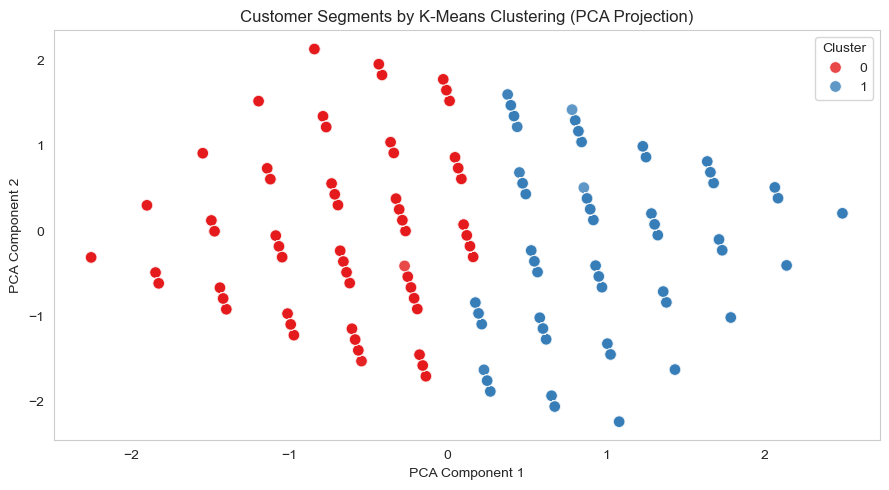

In [109]:
# Plot the clusters using PCA
# Run PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(rfm_scaled.drop('cluster', axis=1))

# Convert to DataFrame for easier plotting
pca_df = pd.DataFrame(components, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = rfm_scaled['cluster']

# Plot the clusters
plt.figure(figsize=(9, 5))
sns.scatterplot(
    data=pca_df, x='PCA1', y='PCA2',
    hue='cluster', palette='Set1', s=70, alpha=0.8
)

# Set titles and labels  
plt.title('Customer Segments by K-Means Clustering (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(False)
plt.tight_layout()
plt.show()

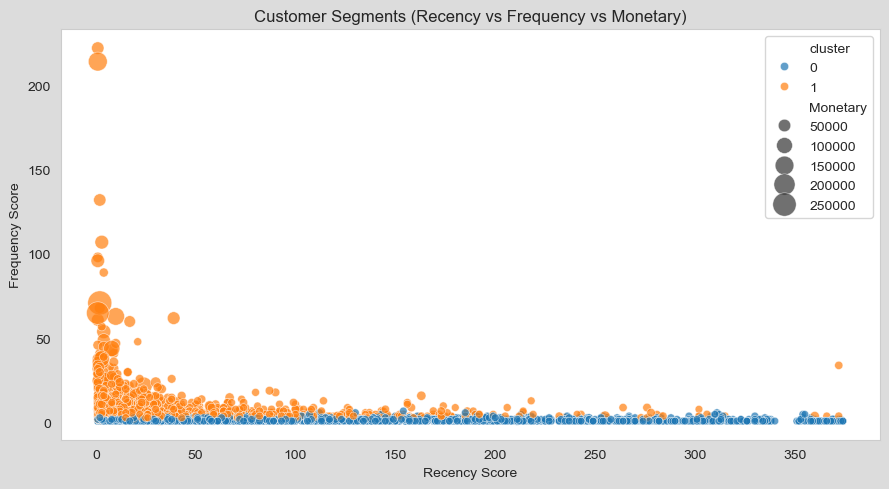

In [110]:
# Plot a scatterplot to show customer segments
# Plot the scatterplot
plt.figure(figsize=(9, 5), facecolor='gainsboro')
scatter = sns.scatterplot(
    data=rfm_data,
    x='Recency',
    y='Frequency',
    hue='cluster',
    size='Monetary',
    sizes=(30, 300),
    palette='tab10',
    alpha=0.7,
    edgecolor='w'
)

# Set titles and labels
plt.title('Customer Segments (Recency vs Frequency vs Monetary)')
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.grid(False)
plt.tight_layout()
plt.show()

In [111]:
# Create a table to show customer clustering 
# Group the data by cluster and calculate the average of RFM features
cluster_summary = rfm_data.groupby('cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# Count the number of customers in each cluster
customer_counts = rfm_data['cluster'].value_counts().sort_index().reset_index()
customer_counts.columns = ['cluster', 'customer_count']

# Calculate the total monetary value per cluster
cluster_monetary = rfm_data.groupby('cluster')['Monetary'].sum().reset_index()
cluster_monetary.columns = ['cluster', 'total_monetary']

# Calculate total number of customers and total monetary for percentages
total_customers = rfm_data.shape[0]
total_monetary_all = cluster_monetary['total_monetary'].sum()

# Add percentage columns
customer_counts['customer_percent'] = round((customer_counts['customer_count'] / total_customers) * 100, 2)
cluster_monetary['monetary_percent'] = round((cluster_monetary['total_monetary'] / total_monetary_all) * 100, 2)

# Merge all into a single summary table
final_cluster_summary = cluster_summary.merge(customer_counts, on='cluster')
final_cluster_summary = final_cluster_summary.merge(cluster_monetary, on='cluster')

# Reorder and rename columns for readability
final_cluster_summary = final_cluster_summary[['cluster', 'Recency', 'Frequency', 'Monetary',
                                               'customer_count', 'customer_percent',
                                               'total_monetary', 'monetary_percent']]

final_cluster_summary.columns = ['Cluster', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary',
                                 'Customer_Count', 'Customer_%',
                                 'Total_Monetary', 'Monetary_%']

# Display the final cluster summary table
display(final_cluster_summary)

Cluster  Avg_Recency  Avg_Frequency  Avg_Monetary  Customer_Count  \
0        0   136.848548       1.541494    451.463706            2410   
1        1    36.728698       8.387350   4421.867806            1913   

   Customer_%  Total_Monetary  Monetary_%  
0       55.75     1088027.532        11.4  
1       44.25     8459033.112        88.6

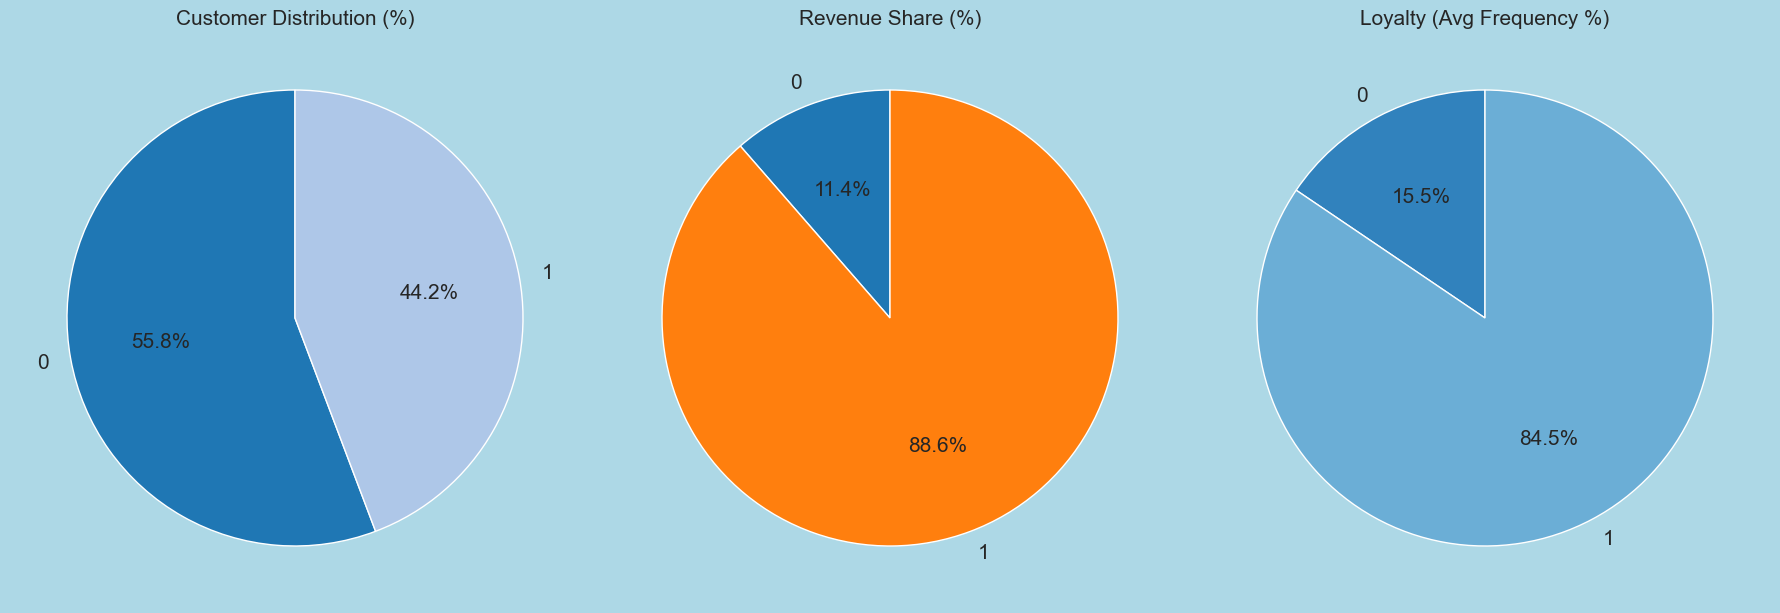

In [112]:
# Plot three pie chart to compare clusters in terms of number, profit, and loyalty
# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), facecolor='lightblue')

# Pie chart 1: Customer distribution
axes[0].pie(final_cluster_summary['Customer_%'],
            labels=final_cluster_summary['Cluster'],
            autopct='%1.1f%%',
            colors=plt.cm.tab20.colors, 
            startangle=90,
            textprops={'fontsize': 15})
axes[0].set_title('Customer Distribution (%)', size=15)

# Pie chart 2: Revenue share
axes[1].pie(final_cluster_summary['Monetary_%'],
            labels=final_cluster_summary['Cluster'],
            autopct='%1.1f%%',
            colors=plt.cm.tab10.colors, 
            startangle=90,
            textprops={'fontsize': 15})
axes[1].set_title('Revenue Share (%)', size=15)

# Pie chart 3: Loyalty by Avg Frequency
# Normalize frequency to percentage for fair comparison
frequency_total = final_cluster_summary['Avg_Frequency'].sum()
loyalty_percent = round((final_cluster_summary['Avg_Frequency'] / frequency_total) * 100, 2)

axes[2].pie(loyalty_percent,
            labels=final_cluster_summary['Cluster'],
            autopct='%1.1f%%',
            colors=plt.cm.tab20c.colors, 
            startangle=90,
            textprops={'fontsize': 15})
axes[2].set_title('Loyalty (Avg Frequency %)', size=15)

plt.tight_layout()
plt.show()

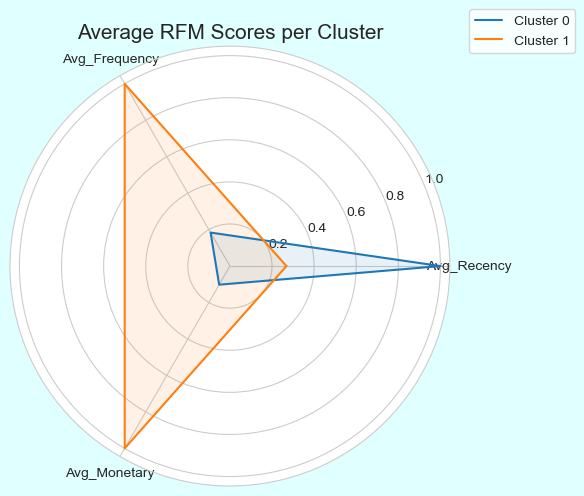

In [113]:
# Plot a rader chart to compare the average RFM between clusters
# Extract relevant columns from the final summary table
cluster_profile = final_cluster_summary[['Cluster', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary']]
cluster_profile.set_index('Cluster', inplace=True)

# Normalize RFM values by dividing by column max
cluster_normalized = cluster_profile / cluster_profile.max()

# Setup Radar chart 
labels = cluster_normalized.columns.tolist()
num_vars = len(labels)

# Compute angles for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]        # complete the loop

# Plot each cluster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True), facecolor='lightcyan')
for idx, row in cluster_normalized.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {idx}')
    ax.fill(angles, values, alpha=0.1)

# Set titles and labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Average RFM Scores per Cluster', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

<hr>
<div id="ml"> 
    <h2>Machine Learning Models</h2>    
</div>
<div>
    <ol>
        <li><a href="#lr">Linear Regression Model</a></li>                     
    </ol>
</div>
<br>

<hr>
<div id="lr"> 
    <h2>Linear Regression Model</h2>    
</div>
<div>
    <ol>
        <li><a href="#regression_assumption_checks">Regression Assumption Checks</a></li>
        <li><a href="#data_preparation">Data Preparation for Linear Regression Modeling</a></li>
        <li><a href="#model">Building and Evaluating the Linear Regression Model</a></li>
        <li><a href="#feature_importance">Feature Importance via Coefficients</a></li>
        <li><a href="#mac">Model Adequacy Checks</a></li>                   
    </ol>
</div>
<br>

<hr>
<div id="regression_assumption_checks"> 
    <h2>Regression Assumption Checks</h2>    
</div>
<div>
    <ol>
        <li><a href="#normality">Normality Test</a></li>
        <li><a href="#multicollinearity_check">Multicollinearity Check</a></li> 
        <li><a href="#feature_relationship">Feature Relationship</a></li>                          
    </ol>
</div>
<br>

<div id="normality"> 
    <h2>Normality Test</h2>    
</div>

 > Anderson-Darling Test:
- Purpose: To test the null hypothesis that a given dataset follows a specified distribution (e.g., normal distribution).
- How: Compare the A statistic to the critical values.
- Interpretation:
    - p-value < 0.05 → Not normal
    - p-value ≥ 0.05 → Normal

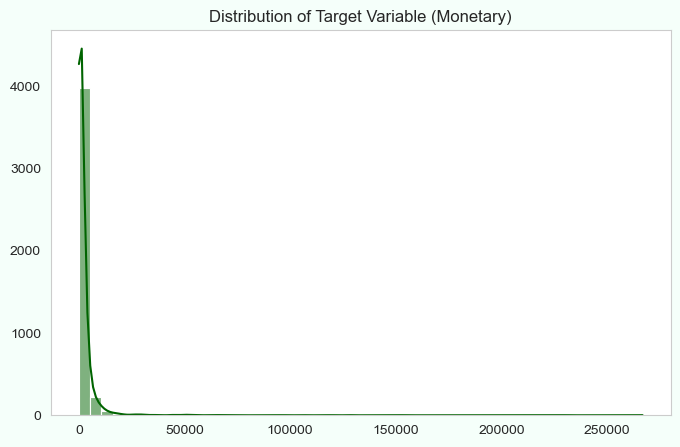

Anderson-Darling Test Statistic: 995.0430

At 15.0% significance level: Critical Value = 0.5750
At 10.0% significance level: Critical Value = 0.6550
At 5.0% significance level: Critical Value = 0.7860
At 2.5% significance level: Critical Value = 0.9170
At 1.0% significance level: Critical Value = 1.0910

The distribution is likely NOT normal (reject H0).



In [114]:
# Normality test for target (Monetary) using Anderson-Darling
# Plot histogram and KDE for the target variable
plt.figure(figsize=(8, 5), facecolor='mintcream')
sns.histplot(rfm_data['Monetary'], kde=True, bins=50, color='darkgreen')

# Set titles and labels
plt.title('Distribution of Target Variable (Monetary)')
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
plt.show()

# Perform Anderson-Darling test
result = anderson(rfm_data['Monetary'], dist='norm')

# Print test statistic and critical values
print(f"Anderson-Darling Test Statistic: {result.statistic:.4f}\n")
for sig_level, crit_val in zip(result.significance_level, result.critical_values):
    print(f"At {sig_level}% significance level: Critical Value = {crit_val:.4f}")

# Interpretation help
if result.statistic > result.critical_values[2]:      # 5% significance level
    print("\nThe distribution is likely NOT normal (reject H0).\n")
else:
    print("\nThe distribution is likely normal (fail to reject H0).\n")

<div id="multicollinearity_check"> 
    <h2>Multicollinearity Check</h2>  
</div>

Multicollinearity occurs when two or more independent variables (predictors) in a regression model are **highly correlated**, which can lead to unreliable and unstable estimates of regression coefficients.

- **Purpose:** Features shouldn’t be highly correlated.	
- **Interpretation:** Use VIF (Variance Inflation Factor).

The **Variance Inflation Factor (VIF)** is a measure used to quantify the extent of **multicollinearity** in a regression analysis. 

- > VIF:

    - Purpose: Detect multicollinearity among independent variables in regression analysis.
    - Calculation: VIF quantifies how much the **variance** of a regression coefficient is **inflated** due to multicollinearity.
        - For a predictor Xᵢ , the formula is:

                VIFᵢ = 1 / (1 - R²ᵢ)

            Where:
            - **R²ᵢ** is the coefficient of determination when Xᵢ is regressed against all other predictors.

    - Interpretation:
        - VIF = 1: No correlation among the independent variables (no multicollinearity).
        - 1 < VIF < 5: Moderate correlation; might not be a significant problem.
        - VIF ≥ 5: High correlation; indicates potential multicollinearity issues that could affect the model.
        - VIF ≥ 10: Often a threshold for serious multicollinearity concerns, signaling the need for further investigation.    

    - Why It Matters:
        - High VIF can inflate standard errors.
        - Makes **t-tests** for coefficients less reliable.
        - Can distort the **signs and magnitudes** of coefficients. 

In [115]:
# Checking multicollinearity between features using VIF (Variance Inflation Factor)
# Select features 
X = rfm_data[['Recency', 'Frequency', 'cluster']].copy()
# Ensure 'cluster' is numeric
X['cluster'] = X['cluster'].astype(int)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Show the results
print("\nVariance Inflation Factors (VIF):\n")
print(vif_data)


Variance Inflation Factors (VIF):

     Feature       VIF
0    Recency  1.038655
1  Frequency  1.549362
2    cluster  1.558057


<div id="feature_relationship"> 
    <h2>Feature Relationship</h2>  
</div>

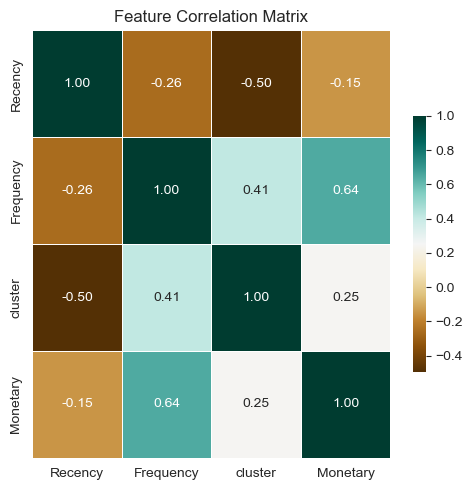

In [116]:
# Plot a heatmaps to identify correlations between variables
# Select features 
X = rfm_data[['Recency', 'Frequency', 'cluster', 'Monetary']].copy()

# Calculate the correlation matrix
corr_matrix = X.corr()

# plot the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, 
            annot=True,                # Show correlation coefficients
            fmt='.2f',                 # Format to 2 decimal places
            cmap='BrBG',               # Color map for better visualization
            linewidths=0.5,            # Line between cells
            cbar_kws={"shrink": 0.6})  # Color bar size

# Set titles and labels
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

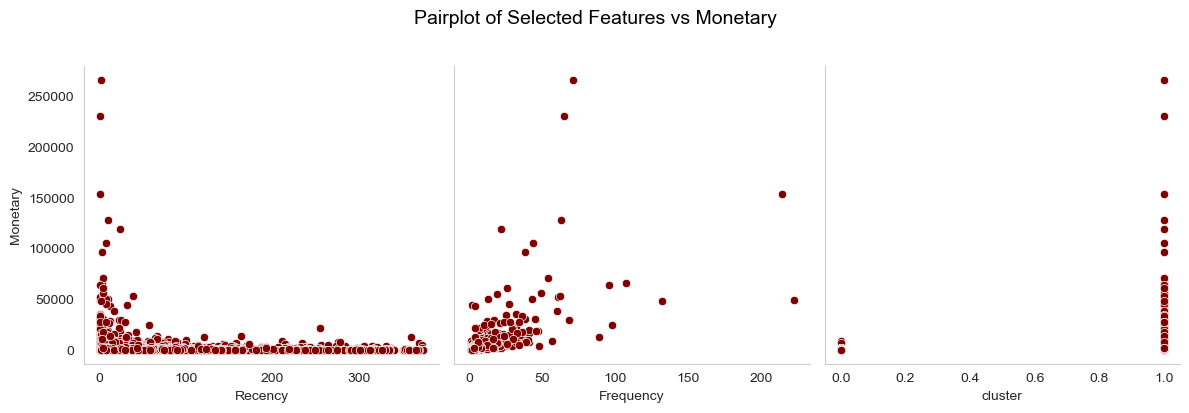

In [117]:
# Plot a pairplot to visualize relationships between selected features and the target variable  
# Set up the figure 
pair_plot = sns.pairplot(  
                        data=rfm_data,                                   
                        x_vars=['Recency', 'Frequency', 'cluster'],    # Features to be plotted on the x-axis  
                        y_vars='Monetary',                             # Target variable to be plotted on the y-axis  
                        kind='scatter',                                # Specify the type of plot as a scatter plot
                        plot_kws={'color': 'maroon'},                  # Color for scatter plot points
                        height=4
) 

# Remove grid lines from all subplots
for ax in pair_plot.axes.flat:  
    ax.grid(False)
    
# Set titles and labels
plt.suptitle('Pairplot of Selected Features vs Monetary', fontsize=14, color='black', y=1.02)
plt.tight_layout()
plt.show() 

<hr>
<div id="data_preparation"> 
    <h2>Data Preparation for Linear Regression Modeling</h2>    
</div>
<div>
    <ol>
        <li><a href="#transformation">Box-Cox Transformation</a></li>
        <li><a href="#outlier_detection">Outlier Detection</a></li>
        <li><a href="#onehot_encode">One-Hot Encode</a></li>
        <li><a href="#final_dataset">Final Dataset Construction</a></li>
        <li><a href="#split_dataset">Split the Dataset</a></li>                           
    </ol>
</div>
<br>

<div id="transformation"> 
    <h2>Box-Cox Transformation</h2>    
</div>

> Box-Cox Transformation

- The **Box-Cox transformation** is used to **stabilize variance** and **make data more normally distributed**.
- It's especially helpful when residuals in a regression model are **not normally distributed**.

    - How It Works:
    It transforms a variable `Y` using the formula:

        $Y(\lambda) = \begin{cases}
        \frac{Y^\lambda - 1}{\lambda} & \text{if } \lambda \ne 0 \\
        \log(Y) & \text{if } \lambda = 0
        \end{cases}$

        - The best value of λ (lambda) is usually **estimated from the data**.
        - The transformation is only applicable to **positive values**.

    - Interpretation:
        - If λ ≈ 1 → No transformation needed.
        - If λ ≈ 0 → Log transformation is suitable.
>> The goal is to **approximate normality** for better model assumptions.

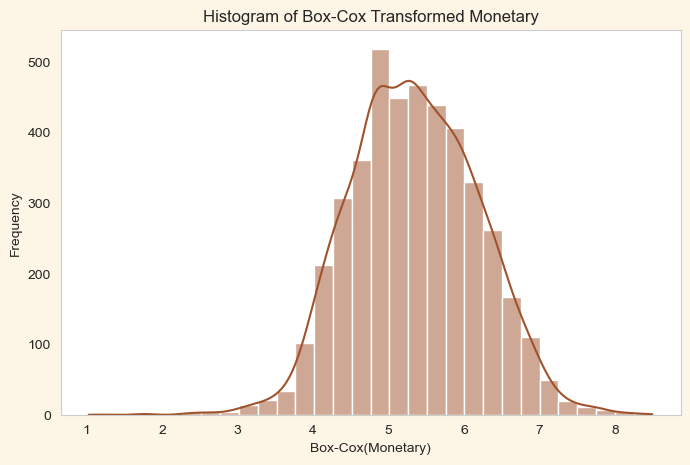


Optimal lambda for Box-Cox transformation: -0.0664



In [118]:
# Use Box-Cox method for normalizing continuous variables
# Apply Box-Cox transformation for 'Monetary'
monetary_boxcox, fitted_lambda = boxcox(rfm_data['Monetary'])

# Plot the histogram of the transformed variable
plt.figure(figsize=(8, 5), facecolor='oldlace')
sns.histplot(monetary_boxcox, bins=30, kde=True, color='sienna')

# Set titles and labels
plt.title('Histogram of Box-Cox Transformed Monetary')
plt.xlabel('Box-Cox(Monetary)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Print the lambda value used
print(f"\nOptimal lambda for Box-Cox transformation: {fitted_lambda:.4f}\n")

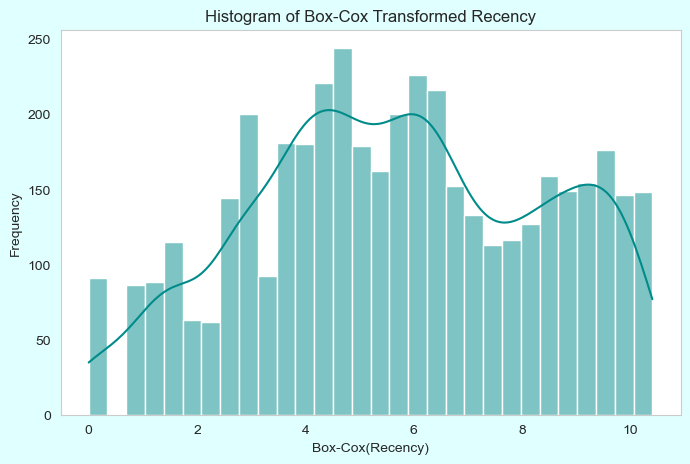

Optimal lambda for Box-Cox transformation - Recency: 0.1752



In [119]:
# Apply Box-Cox transformation for 'Recency'
recency_boxcox, lambda_recency = boxcox(rfm_data['Recency'])

# Plot the histogram of the transformed variable
plt.figure(figsize=(8, 5), facecolor='lightcyan')
sns.histplot(recency_boxcox, bins=30, kde=True, color='darkcyan')

# Set titles and labels
plt.title('Histogram of Box-Cox Transformed Recency')
plt.xlabel('Box-Cox(Recency)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Print the lambda value used
print(f"Optimal lambda for Box-Cox transformation - Recency: {lambda_recency:.4f}\n")

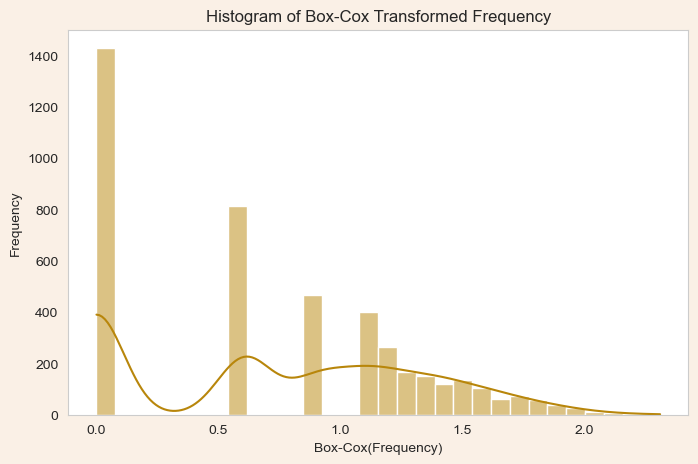

Optimal lambda for Box-Cox transformation - Frequency: -0.3758



In [120]:
# Apply Box-Cox transformation for 'Frequency'
frequency_boxcox, lambda_frequency = boxcox(rfm_data['Frequency'])

# Plot the histogram of the transformed variable
plt.figure(figsize=(8, 5), facecolor='linen')
sns.histplot(frequency_boxcox, bins=30, kde=True, color='darkgoldenrod')

# Set titles and labels
plt.title('Histogram of Box-Cox Transformed Frequency')
plt.xlabel('Box-Cox(Frequency)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Print the lambda value used
print(f"Optimal lambda for Box-Cox transformation - Frequency: {lambda_frequency:.4f}\n")

<div id="outlier_detection"> 
    <h2>Outlier Detection</h2>    
</div>

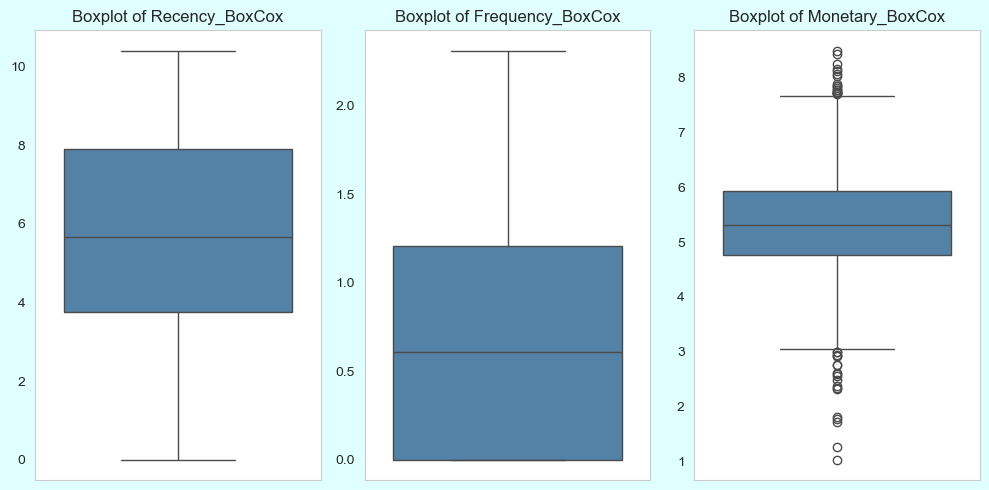

In [121]:
# Visualize outliers using boxplot for all numerical features
# Transformed features
boxcox_transformed = {
    'Recency_BoxCox': recency_boxcox,
    'Frequency_BoxCox': frequency_boxcox,
    'Monetary_BoxCox': monetary_boxcox
}

# Boxplot for each feature
plt.figure(figsize=(10, 5), facecolor='lightcyan')
for i, (feature_name, values) in enumerate(boxcox_transformed.items()):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=values, color='steelblue')
    plt.title(f'Boxplot of {feature_name}')
    plt.grid(False)

plt.tight_layout()
plt.show()

In [122]:
# IQR method for outlier detection and removal
# Create a temporary DataFrame for transformed features
transformed_df = pd.DataFrame({
    'Recency_BoxCox': recency_boxcox,
    'Frequency_BoxCox': frequency_boxcox,
    'Monetary_BoxCox': monetary_boxcox
}, index=rfm_data.index)

# Combine with original data for filtering
rfm_temp = pd.concat([rfm_data, transformed_df], axis=1)

# Create a copy to apply outlier removal
rfm_cleaned = rfm_temp.copy()

for feature in ['Recency_BoxCox', 'Frequency_BoxCox', 'Monetary_BoxCox']:
    Q1 = rfm_cleaned[feature].quantile(0.25)
    Q3 = rfm_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    rfm_cleaned = rfm_cleaned[(rfm_cleaned[feature] >= lower_bound) & (rfm_cleaned[feature] <= upper_bound)]

# Show the shape before and after
print(f"Original shape: {rfm_data.shape}")
print(f"Final dataset shape after outlier removal: {rfm_cleaned.shape}")

Original shape: (4323, 13)
Final dataset shape after outlier removal: (4285, 16)


<div id="onehot_encode"> 
    <h2>One-Hot Encode</h2>    
</div>

In [123]:
# Encode categorical features into numerical formats using One-Hot Encoder
# One-hot encode the 'cluster' column to avoid treating it as ordinal
encoder = OneHotEncoder(drop='first', sparse_output=False)            # Drop first to avoid dummy variable trap
cluster_encoded = encoder.fit_transform(rfm_cleaned[['cluster']])
encoded_df = pd.DataFrame(cluster_encoded, columns=encoder.get_feature_names_out(['cluster']))

<div id="final_dataset"> 
    <h2>Final Dataset Construction</h2>    
</div>

In [124]:
# Construct the final regression dataset
# Combine transformed 'Monetary', 'Recency', 'Frequency', and encoded cluster columns
rfm_model_final = pd.concat([
    rfm_cleaned[['Recency_BoxCox', 'Frequency_BoxCox', 'Monetary_BoxCox']].reset_index(drop=True),
    encoded_df.reset_index(drop=True) 
], axis=1)

# Display the final data
display(rfm_model_final)

Recency_BoxCox  Frequency_BoxCox  Monetary_BoxCox  cluster_1
0           0.737001          1.380293         6.421343        1.0
1           6.453993          1.207659         6.239564        1.0
2           3.853458          0.000000         5.776251        0.0
3           9.887215          0.000000         4.822585        0.0
4           4.986335          1.442978         6.256917        1.0
...              ...               ...              ...        ...
4280        9.592320          1.303907         6.746549        1.0
4281        8.484068          0.000000         3.810007        0.0
4282        2.508842          0.610228         4.384938        0.0
4283        1.569184          1.722317         5.982907        1.0
4284        5.324508          0.900075         5.917936        1.0

[4285 rows x 4 columns]

<div id="split_dataset"> 
    <h2>Split the Dataset</h2>    
</div>

In [125]:
# Split the Dataset to validate the model
# Separate features and target variable
X = rfm_model_final.drop(columns=['Monetary_BoxCox'])        # Features
y = rfm_model_final['Monetary_BoxCox']                       # Target variable

# Split the dataset into training and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preview the shape of train/test sets
print(f"\nThe shape of the X_train dataset: {X_train.shape}, and X_test: {X_test.shape}")
print(f"\nThe shape of the y_train dataset: {y_train.shape}, and y_test: {y_test.shape}")


The shape of the X_train dataset: (3428, 3), and X_test: (857, 3)

The shape of the y_train dataset: (3428,), and y_test: (857,)


<hr>
<div id="model"> 
    <h2>Building and Evaluating the Linear Regression Model</h2>    
</div>

> **Linear Regression**

- A **supervised learning algorithm** used for predicting a **continuous** target variable based on input features.
- Assumes a **linear relationship** between the independent variables (X) and the dependent variable (Y).

    - **How it Works:**

      - Fits the best straight line:  
        \[
        Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε
        \]
        Where:
        - \( β₀ \) is the intercept  
        - \( β₁...βₙ \) are the coefficients  
        - \( ε \) is the error term

      - The model learns coefficients by **minimizing the residual sum of squares (RSS)** between observed and predicted values.


    - **Interpretation:**

      - Coefficients indicate the **direction and strength** of the impact of each feature.
      - Key assumptions:  
        - Linearity  
        - Independence of residuals  
        - Homoscedasticity (constant variance of errors)  
        - Normality of residuals  
        - No multicollinearity

In [126]:
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

- **Regression Evaluation Metrics:**

  > **R-squared ($R^2$)**
  - **What it does:** Measures the proportion of variance in the target variable explained by the model.
  - **Range:** 0 to 1 (or even negative if model performs poorly)
  - **Interpretation:**  
    - $R^2 = 1$: Perfect fit  
    - $R^2 = 0$: Model explains none of the variance  
    - Higher is better.

  > **Mean Absolute Error (MAE)**
  - **Formula:**  
    $$
    MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
    $$
    
    Where:  
    - *yᵢ* = actual value  
    - *ŷᵢ* = predicted value by the model

  - **Interpretation:**  
    - Average absolute difference between actual and predicted values.  
    - **The smaller, the better:** Indicates predictions are close to actual values on average.  

  > **Mean Squared Error (MSE)**
  - **Formula:**  
    $$
    MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
    $$
  - **Interpretation:**  
    - Penalizes larger errors more than MAE (because of squaring).  
    - **The smaller, the better:** Indicates that your data points are dispersed closely around its central moment (mean).
    - More sensitive to outliers than MAE.

  > **Max Error**
  - **Formula:**  
    $$
    \max \left| y_i - \hat{y}_i \right|
    $$
  - **Interpretation:**  
    - Captures the worst-case prediction error.  
    - Helps identify the largest deviation between prediction and reality.

In [127]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)                      # Calculate R-squared value
mae = mean_absolute_error(y_test, y_pred)          # Calculate Mean Absolute Error
mse = mean_squared_error(y_test, y_pred )          # Calculate Mean Squared Error
max_err = max_error(y_test, y_pred)                # Calculate Maximum Error

# Print results
print("Linear Regression Model Evaluation:\n")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Max Error: {max_err:.2f}")

Linear Regression Model Evaluation:

R-squared (R²): 0.6757
Mean Absolute Error (MAE): 0.36
Mean Squared Error (MSE): 0.22
Max Error: 1.84


In [128]:
# Get the coefficients of the linear regression model
print("\nCoefficients for each feature in the model:", lr_model.coef_)

# Get the intercept (constant term) of the linear regression model
print("\nIntercept of the linear regression equation:", lr_model.intercept_)


Coefficients for each feature in the model: [0.00182658 0.7866927  0.45998601]

Intercept of the linear regression equation: 4.561681823023033


In [129]:
# Create and display the final equation of the linear regression model
# Get the feature names from the training dataset
features = X_train.columns

# Get the coefficients and intercept from the trained linear regression model
coefs = lr_model.coef_
intercept = lr_model.intercept_

# Start building the regression equation string
equation = f"y = {intercept:.4f}"

# Loop through each feature and its corresponding coefficient
for feature, coef in zip(features, coefs):
    sign = "+" if coef >= 0 else "-"
    equation += f" {sign} {abs(coef):.4f}*{feature}"

# Display the final linear regression equation
print("\nFinal Linear Regression Equation:\n")
print(equation)


Final Linear Regression Equation:

y = 4.5617 + 0.0018*Recency_BoxCox + 0.7867*Frequency_BoxCox + 0.4600*cluster_1


<hr>
<div id="feature_importance"> 
    <h2>Feature Importance via Coefficients</h2>    
</div>

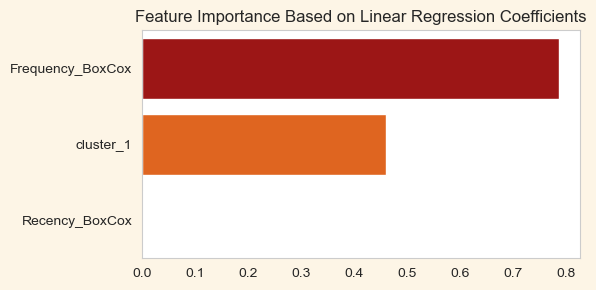

Feature  Coefficient
0  Frequency_BoxCox     0.786693
1         cluster_1     0.459986
2    Recency_BoxCox     0.001827

In [153]:
# Create a DataFrame for feature importance
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})

# Sort by absolute value of coefficients (importance)
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(6, 3), facecolor='oldlace')
sns.barplot(x='Coefficient', y='Feature', data=coef_df_sorted, palette='hot')

# Set titles and labels
plt.title("Feature Importance Based on Linear Regression Coefficients")
plt.xlabel("")
plt.ylabel("")
plt.grid(False)
plt.tight_layout()
plt.show()

# Display top features
coef_df_sorted.drop('AbsCoefficient', axis=1).reset_index(drop=True)

<hr>
<div id="mac"> 
    <h2>Model Adequacy Checks</h2>    
</div>
<div>
    <ol>
        <li><a href="#normality_of_residuals">Normality of Residuals</a></li>
        <li><a href="#linearity_check">Linearity Check</a></li>
        <li><a href="#homoscedasticity">Homoscedasticity</a></li>  
        <li><a href="#independence_of_residuals">Independence of Residuals</a></li>
        <li><a href="#over_under">Model Generalization Check (Overfitting / Underfitting)</a></li>         
        <li><a href="#overall_model_significance">Overall Model Significance</a></li>                                                        
    </ol>
</div>
<br>

<div id="normality_of_residuals"> 
    <h2>Normality of Residuals</h2>    
</div>

- **Purpose:** Residuals should be normally distributed.	
- **Interpretation:** Use Anderson-Darling Test & Q-Q plot.

    - > Anderson-Darling Test:
        - Goal: Test if residuals follow a normal distribution.
        - How: Compares distribution of residuals with normal distribution.
        - Interpretation:
            - p-value < 0.05 → Not normal
            - p-value ≥ 0.05 → Normal

<Figure size 600x600 with 0 Axes>

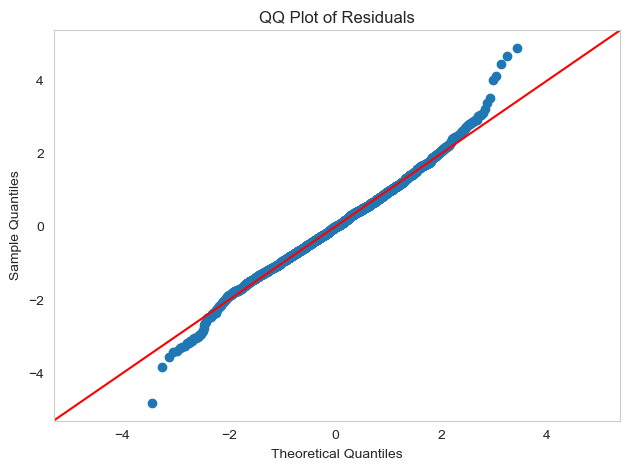

Anderson-Darling Test Statistic: 2.237962249680095

At 15.0% significance level, critical value = 0.575
Residuals are not normal at 15.0% level.


At 10.0% significance level, critical value = 0.655
Residuals are not normal at 10.0% level.


At 5.0% significance level, critical value = 0.786
Residuals are not normal at 5.0% level.


At 2.5% significance level, critical value = 0.917
Residuals are not normal at 2.5% level.


At 1.0% significance level, critical value = 1.091
Residuals are not normal at 1.0% level.



In [131]:
# Visualize QQ plot to check the normality of residuals
# Predict on training data
y_train_pred = lr_model.predict(X_train)

# Calculate residuals from training data
residuals_train  = y_train - y_train_pred

# Apply Anderson-Darling test for normality
result = anderson(residuals_train )

# Plot QQ plot
plt.figure(figsize=(6, 6))
sm.qqplot(residuals_train , line='45', fit=True)

# Set titles and labels
plt.title("QQ Plot of Residuals")
plt.grid(False)
plt.tight_layout()
plt.show()

print("Anderson-Darling Test Statistic:", result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    print(f"\nAt {sl}% significance level, critical value = {cv}")
    if result.statistic < cv:
        print(f"Residuals seem normal at {sl}% level.\n")
    else:
        print(f"Residuals are not normal at {sl}% level.\n")

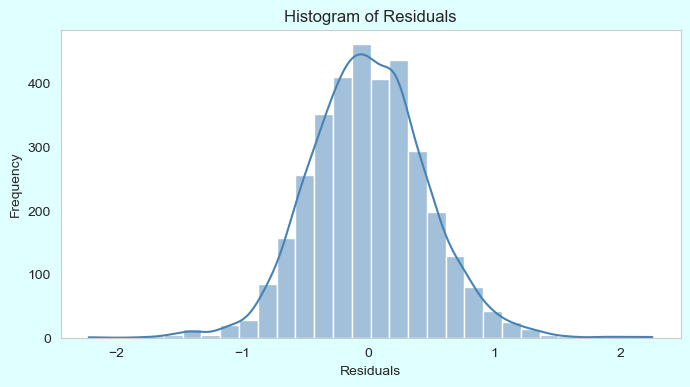

In [132]:
# Plot histogram of residuals
plt.figure(figsize=(8, 4), facecolor='lightcyan')
sns.histplot(residuals_train , kde=True, color='steelblue', bins=30)

# Set titles and labels
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

<div id="linearity_check"> 
    <h2>Linearity Check</h2>    
</div>

- **Purpose:** Confirm linear relationship.	
- **Interpretation:** Residuals should not show patterns.

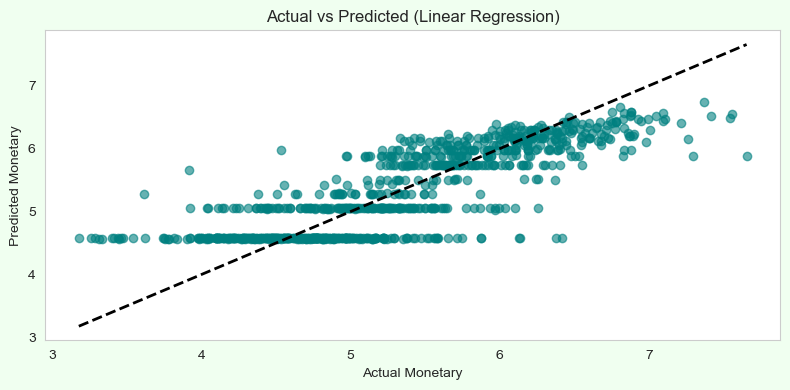

In [133]:
# Examine the linear relationship between features and response variable
# Plot a scatterplot to compare actual vs predicted 
plt.figure(figsize=(8, 4), facecolor='honeydew')
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2, linestyle='--')

# Set titles and labels
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual Monetary')
plt.ylabel('Predicted Monetary')
plt.grid(False)
plt.tight_layout()
plt.show()

<div id="homoscedasticity"> 
    <h2>Homoscedasticity</h2>    
</div>

- **Purpose:** Constant variance of residuals.		
- **Interpretation:** Residuals vs Fitted should show no cone or pattern (constant spread).

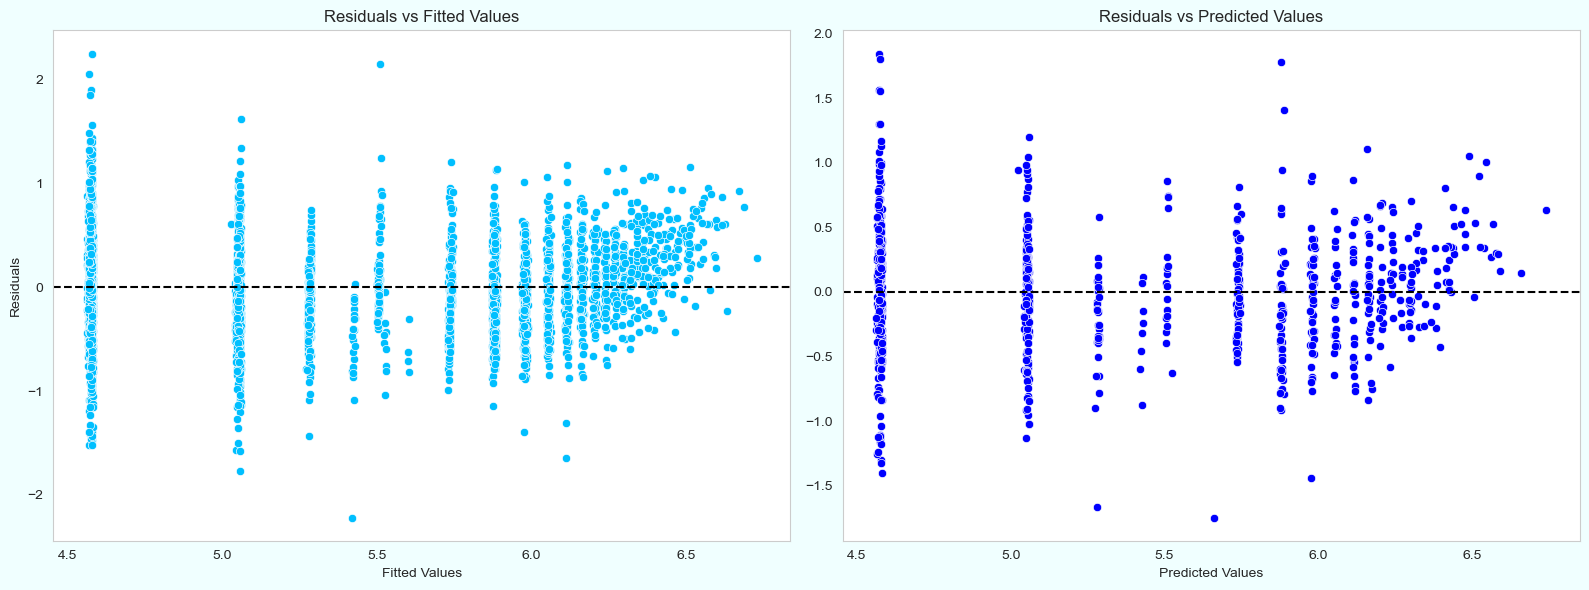

In [134]:
# Create subplots for side-by-side comparison to check the stability of residual variance
plt.figure(figsize=(16, 6), facecolor='azure')

# First plot: Residuals vs. Fitted values to check homoscedasticity
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred, y=residuals_train , color='deepskyblue')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

# Second plot: Residuals vs Predicted values to check homoscedasticity
residuals_test  = y_test - y_pred        # Calculate residuals from testing data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals_test , color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("")

# Remove grid lines from all subplots
for ax in plt.gcf().axes:  
   ax.grid(False)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

<div id="independence_of_residuals"> 
    <h2>Independence of Residuals</h2>    
</div>

- **Goal:**
    - To ensure that residuals (errors) are independent and not correlated over time or observation order.

- **Why it matters:**  
    - If residuals follow a pattern (e.g., increasing/decreasing trend or cycles), it suggests the model has missed a systematic structure in the data.

>> Independent residuals should appear randomly scattered without visible trends or cycles.
---

> **Durbin-Watson Test**

- **Purpose:**  
To detect the presence of autocorrelation (serial correlation) in the residuals of a regression model.

- **How it works:**  
It measures the correlation between each residual and the one immediately before it. The test statistic ranges from 0 to 4.

- **Interpretation:**  
    - **≈ 2** → No autocorrelation (Residuals are independent).  
    - **< 2** → Positive autocorrelation.   
    - **> 2** → Negative autocorrelation. 

>> Values between **1.5 and 2.5** are generally considered acceptable (Confidence Range).

In [135]:
# Check independence of residuals using Durbin-Watson test
# Durbin-Watson test (check for autocorrelation in residuals)
dw_stat = durbin_watson(residuals_train)
print(f"\nDurbin-Watson statistic: {dw_stat:.4f}\n")

# Interpretation guide
if dw_stat < 1.5:
    print("=> Possible positive autocorrelation\n")
elif 1.5 <= dw_stat <= 2.5:
    print("=> Residuals appear to be independent (no significant autocorrelation)\n")
else:
    print("=> Possible negative autocorrelation\n")


Durbin-Watson statistic: 2.0262

=> Residuals appear to be independent (no significant autocorrelation)



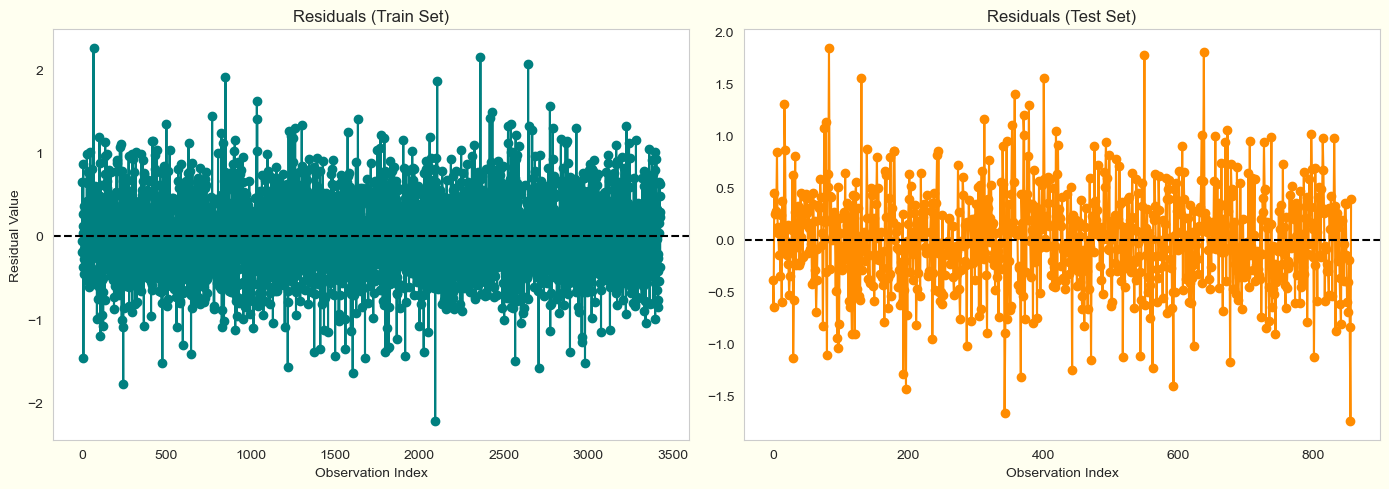

In [136]:
# Visualize residuals over the sequence of observations to check patterns
# Side-by-side plot: residuals on train and test
fig, axes = plt.subplots(1, 2, figsize=(14, 5), facecolor='ivory')

# Residuals from training data
axes[0].plot(residuals_train.values, marker='o', linestyle='-', color='teal')
axes[0].axhline(0, color='black', linestyle='--')
axes[0].set_title("Residuals (Train Set)")
axes[0].set_xlabel("Observation Index")
axes[0].set_ylabel("Residual Value")

# Residuals from test data
axes[1].plot(residuals_test.values, marker='o', linestyle='-', color='darkorange')
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_title("Residuals (Test Set)")
axes[1].set_xlabel("Observation Index")
axes[1].set_ylabel("")

# Remove grid lines from all subplots
for ax in plt.gcf().axes:  
   ax.grid(False)

plt.tight_layout()
plt.show()

> **Autocorrelation Function (ACF) Plot**

- **Purpose:**
    - The **Autocorrelation Function (ACF)** plot helps detect patterns or autocorrelation in residuals. In fact, this plot is used to visually inspect if residuals are correlated with their own past values (lags).
- **How to interpret:**
    - A **95% confidence interval** is typically shown as horizontal blue bands.
    - Any spike (autocorrelation) **outside the ±1.96/√n bounds** suggests significant autocorrelation at that lag.
    - Where `n` is the number of residuals.
        - If all bars stay within the bands → residuals are likely independent (no pattern).
        - If one or more bars cross the bands → residuals may not be independent → potential violation of model assumptions.
>> A good regression model should have residuals with **no significant autocorrelation**.

<Figure size 800x500 with 0 Axes>

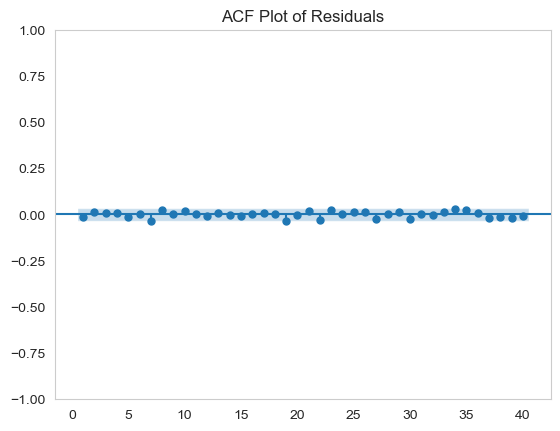

In [137]:
# Plot Autocorrelation Function (ACF) for residuals (for train set)
plt.figure(figsize=(8, 5))
plot_acf(residuals_train, lags=40, alpha=0.05, zero=False)

# Set titles and labels
plt.title("ACF Plot of Residuals")
plt.grid(False)
plt.show()

<div id="over_under"> 
    <h2>Model Generalization Check (Overfitting / Underfitting)</h2>    
</div>

- **Purpose:** Model generalization performance	.	
- **Interpretation:** Compare train/test performance and errors.

    - > Overfitting / Underfitting Detection:
        - Compare: R², MAE and MSE for Train vs Test.
        - Interpretation: 
            - Overfitting → High Train R², Low Test R²
            - Underfitting → Low R² for both
            - Good Fit → R² values are close

In [154]:
# Check if the model generalizes well or suffers from overfitting/underfitting
# Make predictions on both training and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Calculate evaluation metrics for both sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print metrics for comparison
print(f"\nR² on Training Set: {r2_train:.4f}")
print(f"R² on Test Set:     {r2_test:.4f}")
print(f"\nMAE on Training Set: {mae_train:.4f}")
print(f"MAE on Test Set:     {mae_test:.4f}")
print(f"\nMSE on Training Set: {mse_train:.4f}")
print(f"MSE on Test Set:     {mse_test:.4f}")


R² on Training Set: 0.6747
R² on Test Set:     0.6757

MAE on Training Set: 0.3602
MAE on Test Set:     0.3613

MSE on Training Set: 0.2126
MSE on Test Set:     0.2210


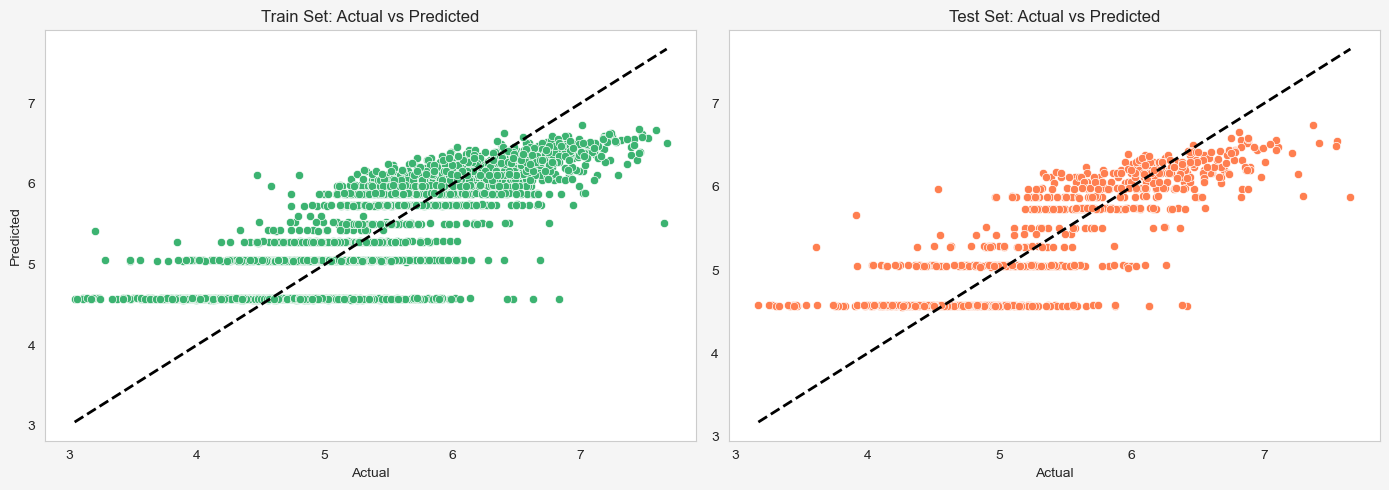

In [139]:
# Plot predicted vs actual for both sets
plt.figure(figsize=(14, 5), facecolor='whitesmoke')

# Training
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, color='mediumseagreen')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Train Set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Testing
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, color='coral')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('')

# Remove grid lines from all subplots
for ax in plt.gcf().axes:  
   ax.grid(False)

plt.tight_layout()
plt.show()

<div id="overall_model_significance"> 
    <h2>Overall Model Significance</h2>    
</div>

- **Overall Model Significance**:
    - This concept indicates whether the regression model is statistically significant as a whole.
    - It assesses whether there is a statistically significant relationship between the independent variables (X features) and the target variable (Y).

- **F-Test in Regression**:
    - The F-Test is used to evaluate the null hypothesis that all regression coefficients (excluding the intercept) are equal to zero.
    - If the null hypothesis is rejected, the model is considered statistically significant, implying that the predictors (X features) collectively have a meaningful impact on the target variable (Y).

- **Interpreting the Results**:
    - If **p-value < 0.05** → The model is statistically significant. The predictors contribute meaningfully to predicting the target variable.
    - If **p-value ≥ 0.05** → The model may not be statistically significant. The predictors might not be useful in explaining the target variable.

---

> Ordinary Least Squares (OLS)

- **OLS** is a method used to estimate the parameters of a linear regression model by minimizing the **sum of squared residuals**.  
It aims to find the line of best fit by reducing the overall error between observed and predicted values.

- **Objective:**  
    Minimize the **Sum of Squared Errors (SSE)**:  
    
    &nbsp;&nbsp;&nbsp;&nbsp;**SSE = Σ (yᵢ − ŷᵢ)²**  

    Where:  
    - *yᵢ* = actual value  
    - *ŷᵢ* = predicted value by the model  

In [140]:
# Apply Overall Model Significance to get ANOVA-style summary using F-test
# Add a constant (intercept) to the features
X_train_sm = sm.add_constant(X_train)

# Fit the model using OLS (Ordinary Least Squares)
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Show the full summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Monetary_BoxCox   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     2367.
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:43:07   Log-Likelihood:                -2209.9
No. Observations:                3428   AIC:                             4428.
Df Residuals:                    3424   BIC:                             4452.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.5617      0.029  